In [1]:
from astropy.io import fits
hdul1 = fits.open('QSObased_Trimmed_SDSS_DR7_107.fits')
print(hdul1[1].columns)
Ra1 = hdul1[1].data['RA']
DEC1 = hdul1[1].data['DEC']
Plate1 = hdul1[1].data['PLATE']
Fiber1 = hdul1[1].data['FIBER']
MJD1 = hdul1[1].data['MJD']
Zabs = hdul1[1].data['ZABS']
Nabs = hdul1[1].data['NABS']
Zqso1 = hdul1[1].data['ZQSO']
Rew_2796 = hdul1[1].data['REW_MGII_2796']
err_Rew_2796 = hdul1[1].data['ERR_REW_MGII_2796']
Rew_2803 = hdul1[1].data['REW_MGII_2803']
err_Rew_2803 = hdul1[1].data['ERR_REW_MGII_2803']
sig_2803 = hdul1[1].data['SIGNAL_MGII_2803']
print(len(MJD1))
from astropy.io import fits
hdul2 = fits.open('./Searched_Quasars_SDSS_DR7_107.fits')
#print(hdul2[1].columns)
Ra2 = hdul2[1].data['RA']
DEC2 = hdul2[1].data['DEC']
Plate2 = hdul2[1].data['PLATE']
Fiber2 = hdul2[1].data['FIBER']
MJD2 = hdul2[1].data['MJD']
Zqso2 = hdul2[1].data['ZQSO']
#print(len(MJD2))

ColDefs(
    name = 'RA'; format = 'D'
    name = 'DEC'; format = 'D'
    name = 'PLATE'; format = 'J'
    name = 'FIBER'; format = 'J'
    name = 'MJD'; format = 'J'
    name = 'ZQSO'; format = 'E'
    name = 'ERR_ZQSO'; format = 'E'
    name = 'INDEX_QSO'; format = 'J'
    name = 'SPEC_SNR_MEDIAN'; format = 'E'
    name = 'MED_SDEVIATION_RED'; format = 'E'
    name = 'MED_SDEVIATION_BLUE'; format = 'E'
    name = 'NABS'; format = 'J'
    name = 'ZABS'; format = '10E'
    name = 'ERR_ZABS'; format = '10E'
    name = 'VDISP'; format = '10E'
    name = 'ERR_VDISP'; format = '10E'
    name = 'CRITERION_MGII'; format = '10B'
    name = 'CRITERION_MGII_FEII'; format = '10B'
    name = 'CRITERION_FEII'; format = '10B'
    name = 'SIGNAL_MGII_2803'; format = '10E'
    name = 'SIGNAL_MGII_2796'; format = '10E'
    name = 'SNR_MGII_2803'; format = '10E'
    name = 'SNR_MGII_2796'; format = '10E'
    name = 'REW_MGI_2853'; format = '10E'
    name = 'ERR_REW_MGI_2853'; format = '10E'
    name = 

In [2]:
Nabs[:100]

array([2, 1, 2, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 2, 1, 1, 1, 1, 1, 3, 1,
       3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 2, 2, 2, 3, 1, 1, 1, 3, 1, 1, 2, 2, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 3, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2,
       1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1])

In [2]:
k = 0
Plate1 = list(Plate1)
Fiber1 = list(Fiber1)
for i in range(len(MJD1)):
    if len(str(Plate1[i]))==3:
        Plate1[i] = '0'+str(Plate1[i])
    if len(str(Fiber1[i]))==3:
        Fiber1[i] = '0'+str(Fiber1[i])

In [3]:
k = 0
Plate2 = list(Plate2)
Fiber2 = list(Fiber2)
for i in range(len(MJD2)):
    if len(str(Plate2[i]))==3:
        Plate2[i] = '0'+str(Plate2[i])
    if len(str(Fiber2[i]))==3:
        Fiber2[i] = '0'+str(Fiber2[i])

In [4]:
k = 0
for i in range(len(MJD2)):
    if len(str(Plate2[i]))==3 or len(str(Fiber2[i]))==3:
        k=k+1
print(k)

0


In [5]:
k = 0
for i in range(len(MJD1)):
    if len(str(Plate1[i]))==3 or len(str(Fiber1[i]))==3:
        k=k+1
        
print(k)

0


# Removing narrow abosorbtion lines using criteria $ EW> 3*\sigma_{EW}$  #

In [6]:
from tqdm.auto import tqdm
path = []
discard = []
for i in tqdm(range(len(MJD1))):
    path.append('spec-'+str(Plate1[i])+ '-' +str(MJD1[i])+ '-'+str(Fiber1[i])+'.fits')
    for j in range(len(Rew_2796[i])):
        if Rew_2796[i][j] < 3*err_Rew_2796[i][j] and Rew_2803[i][j] < 3*err_Rew_2803[i][j]:
                   name = 'spec-'+str(Plate1[i])+ '-' +str(MJD1[i])+ '-'+str(Fiber1[i])+'.fits'
                   discard.append(name)

print(len(path))
print(len(discard))
ew_checked = list(set(path) - set(discard))
print(len(ew_checked))

  0%|          | 0/26761 [00:00<?, ?it/s]

26761
1780
25010


In [7]:
import os
fits_files = []
list_dir = os.listdir('run2/mg2/')
for i in tqdm(ew_checked):
    for j in list_dir:
        if i == j:
            fits_files.append(j)
           
print(len(fits_files))

  0%|          | 0/25010 [00:00<?, ?it/s]

8194


In [8]:
import glob
files_non = os.listdir('run2/JHU-2/')
print(len(files_non))
fits_files2 = list(set(files_non)-set(list_dir))
print(len(fits_files2))
fits_files2 = fits_files2[:len(fits_files)]
print(len(fits_files2))

21947
15235
8194


In [9]:
list_Z_emi1 = []

for i in tqdm(range(len(MJD1))):
    for j in fits_files:
        if 'spec-'+str(Plate1[i])+ '-' +str(MJD1[i])+ '-'+str(Fiber1[i])+'.fits' == j :
            list_Z_emi1.append(Zqso1[i])
print(len(list_Z_emi1))

  0%|          | 0/26761 [00:00<?, ?it/s]

8194


In [10]:
list_Z_emi2 = []
list_Z = []
for i in tqdm(range(len(MJD2))):
    for j in fits_files2:
        if 'spec-'+str(Plate2[i])+ '-' +str(MJD2[i])+ '-'+str(Fiber2[i])+'.fits' == j :
            list_Z_emi2.append(Zqso2[i])    
            list_Z.append(j)
print(len(list_Z_emi2))

  0%|          | 0/84533 [00:00<?, ?it/s]

6986


In [11]:
fits_files = fits_files[:len(list_Z)]
list_Z_emi1 = list_Z_emi1[:len(fits_files)]
fits_files2 = list_Z

In [12]:
from astropy.io import fits
import numpy as np
specs = []
waves = []

unchanged = 0

for f in tqdm(range(len(fits_files))):
    spectra = fits.open('run2/mg2/'+ fits_files[f] )
    wave = 10**spectra[1].data['loglam']
    flux = spectra[1].data['flux']
    model = spectra[1].data['model']
    if list_Z_emi1[f] <=1:
        X,Y,Z = [],[],[]
        for i in range(wave.shape[0]):
            if wave[i] > 4250 :
                X.append(flux[i])
                Y.append(model[i])
                Z.append(wave[i])
        specs.append(np.array(X)/np.array(Y))
        waves.append(Z)
    
    elif 1< list_Z_emi1[f] <= 1.8:
        X,Y,Z = [],[],[]
        for i in range(wave.shape[0]):
            if wave[i] > 3100 :
                X.append(flux[i])
                Y.append(model[i])
                Z.append(wave[i])
        specs.append(np.array(X)/np.array(Y))
        waves.append(Z)
        
    elif 1.8< list_Z_emi1[f] <= 2.8:
        X,Y,Z = [],[],[]
        for i in range(wave.shape[0]):
            if wave[i] > 2250 :
                X.append(flux[i])
                Y.append(model[i])
                Z.append(wave[i])
        specs.append(np.array(X)/np.array(Y))
        waves.append(Z)
        
    elif 2.8< list_Z_emi1[f] <= 4.8:
        X,Y,Z = [],[],[]
        for i in range(wave.shape[0]):
            if wave[i] > 1500 :
                X.append(flux[i])
                Y.append(model[i])
                Z.append(wave[i])
        specs.append(np.array(X)/np.array(Y))
        waves.append(Z)
        
    else:
        unchanged = unchanged + 1
        specs.append(flux/model)
        waves.append(wave)
    
print(len(specs), len(waves), unchanged)

  0%|          | 0/6986 [00:00<?, ?it/s]

C:\Users\adars\AppData\Local\Temp\ipykernel_7688\3816170317.py:40: RuntimeWarning: divide by zero encountered in true_divide
  specs.append(np.array(X)/np.array(Y))


6986 6986 0


In [13]:
from astropy.io import fits
specs2 = []
waves2 = []

unchanged2 = 0

for f in tqdm(range(len(fits_files2))):
    spectra = fits.open('run2/JHU-2/'+ fits_files2[f] )
    wave = 10**spectra[1].data['loglam']
    flux = spectra[1].data['flux']
    model = spectra[1].data['model']
    if list_Z_emi1[f] <=1:
        X,Y,Z = [],[],[]
        for i in range(wave.shape[0]):
            if wave[i] > 4250 :
                X.append(flux[i])
                Y.append(model[i])
                Z.append(wave[i])
        specs2.append(np.array(X)/np.array(Y))
        waves2.append(Z)
    
    elif 1< list_Z_emi1[f] <= 1.8:
        X,Y,Z = [],[],[]
        for i in range(wave.shape[0]):
            if wave[i] > 3100 :
                X.append(flux[i])
                Y.append(model[i])
                Z.append(wave[i])
        specs2.append(np.array(X)/np.array(Y))
        waves2.append(Z)
        
    elif 1.8< list_Z_emi1[f] <= 2.8:
        X,Y,Z = [],[],[]
        for i in range(wave.shape[0]):
            if wave[i] > 2250 :
                X.append(flux[i])
                Y.append(model[i])
                Z.append(wave[i])
        specs2.append(np.array(X)/np.array(Y))
        waves2.append(Z)
        
    elif 2.8< list_Z_emi1[f] <= 4.8:
        X,Y,Z = [],[],[]
        for i in range(wave.shape[0]):
            if wave[i] > 1500 :
                X.append(flux[i])
                Y.append(model[i])
                Z.append(wave[i])
        specs2.append(np.array(X)/np.array(Y))
        waves2.append(Z)
        
    else:
        unchanged2 = unchanged2 + 1
        specs2.append(flux/model)
        waves2.append(wave)
    
print(len(specs2), len(waves2), unchanged2)

  0%|          | 0/6986 [00:00<?, ?it/s]

6986 6986 0


In [45]:
from astropy.io import fits
import numpy as np
specs = []
waves = []


unchanged = 0

for f in tqdm(range(len(fits_files))):
    spectra = fits.open('run2/mg2/'+ fits_files[f] )
    wave = 10**spectra[1].data['loglam']
    flux = spectra[1].data['flux']
    model = spectra[1].data['model']
    if list_Z_emi1[f] <=1:
        X,Y,Z = [],[],[]
        for i in range(wave.shape[0]):
            if wave[i] > 4250 and wave[i]> list_Z_emi1[f]*1216 and wave[i] < list_Z_emi1[f]*2803 :
                X.append(flux[i])
                Y.append(model[i])
                Z.append(wave[i])
        specs.append(np.array(X)/np.array(Y))
        waves.append(Z)
    
    elif 1< list_Z_emi1[f] <= 1.8:
        X,Y,Z = [],[],[]
        for i in range(wave.shape[0]):
            if wave[i] > 3100 and wave[i]> list_Z_emi1[f]*1216 and wave[i] < list_Z_emi1[f]*2803 :
                X.append(flux[i])
                Y.append(model[i])
                Z.append(wave[i])
        specs.append(np.array(X)/np.array(Y))
        waves.append(Z)
        
    elif 1.8< list_Z_emi1[f] <= 2.8:
        X,Y,Z = [],[],[]
        for i in range(wave.shape[0]):
            if wave[i] > 2250 and wave[i]> list_Z_emi1[f]*1216 and wave[i] < list_Z_emi1[f]*2803:
                X.append(flux[i])
                Y.append(model[i])
                Z.append(wave[i])
        specs.append(np.array(X)/np.array(Y))
        waves.append(Z)
        
    elif 2.8< list_Z_emi1[f] <= 4.8:
        X,Y,Z = [],[],[]
        for i in range(wave.shape[0]):
            if wave[i] > 1500 and wave[i]> list_Z_emi1[f]*1216 and wave[i] < list_Z_emi1[f]*2803:
                X.append(flux[i])
                Y.append(model[i])
                Z.append(wave[i])
        specs.append(np.array(X)/np.array(Y))
        waves.append(Z)
        
    else:
        unchanged = unchanged + 1
        specs.append(flux/model)
        waves.append(wave)
    
print(len(specs), len(waves), unchanged)

  0%|          | 0/6975 [00:00<?, ?it/s]

6975 6975 0


In [46]:
from astropy.io import fits
specs2 = []
waves2 = []

unchanged2 = 0

for f in tqdm(range(len(fits_files2))):
    spectra = fits.open('run2/JHU-2/'+ fits_files2[f] )
    wave = 10**spectra[1].data['loglam']
    flux = spectra[1].data['flux']
    model = spectra[1].data['model']
    if list_Z_emi1[f] <=1:
        X,Y,Z = [],[],[]
        for i in range(wave.shape[0]):
            if wave[i] > 4250 and wave[i]> list_Z_emi1[f]*1216 and wave[i] < list_Z_emi1[f]*2803:
                X.append(flux[i])
                Y.append(model[i])
                Z.append(wave[i])
        specs2.append(np.array(X)/np.array(Y))
        waves2.append(Z)
    
    elif 1< list_Z_emi1[f] <= 1.8:
        X,Y,Z = [],[],[]
        for i in range(wave.shape[0]):
            if wave[i] > 3100 and wave[i]> list_Z_emi1[f]*1216 and wave[i] < list_Z_emi1[f]*2803:
                X.append(flux[i])
                Y.append(model[i])
                Z.append(wave[i])
        specs2.append(np.array(X)/np.array(Y))
        waves2.append(Z)
        
    elif 1.8< list_Z_emi1[f] <= 2.8:
        X,Y,Z = [],[],[]
        for i in range(wave.shape[0]):
            if wave[i] > 2250 and wave[i]> list_Z_emi1[f]*1216 and wave[i] < list_Z_emi1[f]*2803:
                X.append(flux[i])
                Y.append(model[i])
                Z.append(wave[i])
        specs2.append(np.array(X)/np.array(Y))
        waves2.append(Z)
        
    elif 2.8< list_Z_emi1[f] <= 4.8:
        X,Y,Z = [],[],[]
        for i in range(wave.shape[0]):
            if wave[i] > 1500 and wave[i]> list_Z_emi1[f]*1216 and wave[i] < list_Z_emi1[f]*2803:
                X.append(flux[i])
                Y.append(model[i])
                Z.append(wave[i])
        specs2.append(np.array(X)/np.array(Y))
        waves2.append(Z)
        
    else:
        unchanged2 = unchanged2 + 1
        specs2.append(flux/model)
        waves2.append(wave)
    
print(len(specs2), len(waves2), unchanged2)

  0%|          | 0/6975 [00:00<?, ?it/s]

6975 6975 0


In [22]:
fits_files = []
list_Z_emi1 = []
fits_files2 = []
list_Z = []
waves = []
waves2 = []

In [48]:
X = specs+specs2
Y = waves + waves2
print(len(specs),len(waves))

6975 6975


<IPython.core.display.Javascript object>


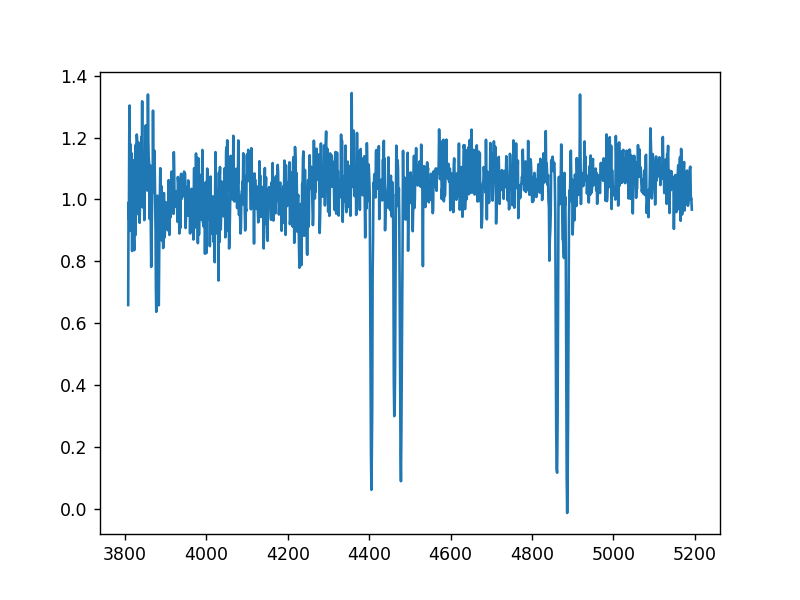

In [32]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.plot(waves[0], specs[0])

In [27]:
print(len(waves[2]), len(specs[2]))

0 0


In [35]:
specs = [i for i in specs if (i != 0).all]

In [49]:
from tqdm.auto import tqdm
k =0
X_temp = X
for i in tqdm(X):
    if len(i)==0:
        X.remove(i)
            
        

C:\Users\91766\AppData\Local\Temp\ipykernel_17416\1761564204.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  X.remove(i)
C:\Users\91766\AppData\Local\Temp\ipykernel_17416\1761564204.py:5: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  X.remove(i)


In [53]:
for i in X_new:
    print(len(i))

1967
2873
2884
2337
2229
3554
3130
2776
3365
2512
2570
3267
2635
2381
1678
1822
2601
1584
1585
3627
2028
2112
2029
2006
1505
3214
3627
1832
1853
2549
3585
1732
1532
1689
2729
1999
2652
1968
2205
2461
1829
1509
2898
1730
1892
2370
2286
1912
1521
1543
2172
3626
1786
2127
2882
3332
2220
3158
1794
1755
1958
1698
2940
2392
1868
2177
1875
2421
2767
1760
3381
1899
1671
3365
1694
2054
2706
1858
1874
3265
2716
3525
1505
1814
3567
1571
2350
1960
3201
1802
2158
1663
1586
1647
3551
2613
1778
2281
2275
2131
3244
3185
3244
2405
2702
1771
1905
1570
1718
2317
1540
1771
1768
2149
2225
2076
1546
1585
2239
2350
1821
2658
2155
2640
2059
2005
2898
1768
3058
2019
2680
1506
1599
1829
2052
1994
1870
2046
1625
2646
2282
2709
1609
2059
3590
1600
1772
1760
1974
2730
3565
2224
2806
2388
1665
2514
2381
1981
2086
2168
2093
2947
2668
2679
1682
1693
1569
1580
1697
1625
2693
2642
1663
2093
2089
2848
2527
3103
1785
2743
1733
2311
2731
2268
1813
3032
2045
2969
3234
2074
1762
1629
2261
2557
2923
2138
2876
1948
2659
2644


1840
1705
2170
1970
1721
1667
2225
3627
2528
2342
2318
1543
2704
2346
2395
2528
1943
1719
2022
1702
3332
1740
2093
1690
1891
1595
3448
1884
2227
3164
1861
1958
3314
3627
3204
3378
2522
3091
3073
2518
2466
1754
3166
2409
3326
2974
2185
3031
2060
1718
2318
2095
3471
3476
2811
2422
3627
1871
1884
1870
1731
2501
2081
2663
1976
3225
1794
2152
1904
3426
2032
1665
1518
1504
2994
2114
2382
1883
2857
3420
1658
3134
2383
1849
2292
1688
2196
1850
2951
2623
3258
1532
3087
1986
1659
2636
1585
1573
2709
2161
2060
2821
1662
2514
1556
1878
2193
2689
3212
2049
3093
3626
1534
1535
3110
2097
1766
3548
2285
3295
2610
1568
2315
1776
3412
1626
1852
3215
2099
1520
1757
1725
1505
1514
2027
1973
3118
3627
1803
1580
1593
1671
2867
1952
2026
1647
2005
3627
1576
2530
2893
1902
1688
3241
2221
2474
1774
1695
2479
1663
1777
2688
1523
1701
1930
1814
2084
1867
2706
2078
2280
1666
2073
1847
1582
1652
1654
2692
1995
2190
2158
1524
2282
2302
2046
2444
3627
1525
2223
2534
2500
3252
1843
3362
2059
2358
1575
1830
1619
2490


In [51]:
X_new = []
for i in X:
    if len(i)>1500:
        X_new.append(i)
print(len(X_new))

4772


In [32]:
specs = specs +specs2
waves = waves+waves2

In [82]:
combined =  np.empty(shape=(3821, 2),dtype='object')
combined.shape

(3821, 2)

In [109]:
specs = np.array(specs)
waves = np.array(waves)

combined =  []
for i in range(specs.shape[0]):
    x = np.vstack((waves[i],specs[i])).T
    #x = np.transpose((waves[i],specs[i]))
    combined.append(x)
    


    

In [110]:
len(combined)

13876

In [113]:
x.shape

(3832, 2)

In [90]:
combined[:3]

[array([[3.8141689e+03, 5.8308787e+00],
        [3.8150483e+03, 5.9771714e+00],
        [3.8159260e+03, 6.0892062e+00],
        ...,
        [9.1875576e+03, 3.7142074e+00],
        [9.1896719e+03, 3.7322397e+00],
        [9.1917852e+03, 3.7677941e+00]], dtype=float32),
 array([[3.8141689e+03, 7.2288718e+00],
        [3.8150483e+03, 7.0888686e+00],
        [3.8159260e+03, 7.1300449e+00],
        ...,
        [9.2150977e+03, 3.5925965e+00],
        [9.2172227e+03, 3.5983169e+00],
        [9.2193428e+03, 3.5601919e+00]], dtype=float32),
 array([[3802.77    ,   18.463863],
        [3803.6448  ,   18.5413  ],
        [3804.522   ,   18.727428],
        ...,
        [9210.8545  ,   10.70419 ],
        [9212.979   ,   10.705066],
        [9215.098   ,   10.669283]], dtype=float32)]

In [116]:
x= np.array([])
for i in combined:
    x = np.append(x,i)
    

In [122]:
del x

In [111]:
y = np.asarray(combined)

C:\Users\91766\AppData\Local\Temp\ipykernel_12560\3740881773.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y = np.asarray(combined)


In [112]:
y.shape

(13876,)

In [55]:
from scipy.ndimage import interpolation
import numpy as np
specs_inter = []
temp = specs + specs2
temp_new = []
for i in temp:
    if len(i)>1500:
        temp_new.append(i)
#specs, specs2 = [], []
for i in tqdm(temp_new):
    x = np.array(i)
    i = 3841
    z = i / len(x)
    x_int = interpolation.zoom(x,z)
    np.expand_dims(x_int, axis=0)
    specs_inter.append(x_int)
specs_inter = np.array(specs_inter)
specs_inter = np.expand_dims(specs_inter, axis=2)
print(specs_inter.shape)

  0%|          | 0/4772 [00:00<?, ?it/s]

(4772, 3841, 1)


In [14]:
from scipy.ndimage import interpolation
import numpy as np
specs_inter = []
temp = specs + specs2

for i in tqdm(temp):
    x = np.array(i)
    i = 3841
    z = i / len(x)
    x_int = interpolation.zoom(x,z)
    np.expand_dims(x_int, axis=0)
    specs_inter.append(x_int)
specs_inter = np.array(specs_inter)
specs_inter = np.expand_dims(specs_inter, axis=2)
print(specs_inter.shape)

  0%|          | 0/13972 [00:00<?, ?it/s]

(13972, 3841, 1)


In [16]:
label = list_Z_emi1 + list_Z_emi2

In [26]:
a.shape

(2, 6938)

In [17]:
from scipy.ndimage import interpolation
import numpy as np
waves_inter = []
temp = waves+ waves2
#waves, waves2 = [], []
for i in tqdm(temp):
    x = np.array(i)
    i = 3841
    z = i / len(x)
    x_int = interpolation.zoom(x,z)
    #np.expand_dims(x_int, axis=0)
    waves_inter.append(x_int)
#waves_inter = np.array(waves_inter)
#specs_inter = np.expand_dims(specs_inter, axis=2)
#print(waves_inter.shape)

  0%|          | 0/13876 [00:00<?, ?it/s]

(13876, 3841)


In [18]:
stack = np.hstack(waves_inter, specs_inter)

TypeError: _vhstack_dispatcher() takes 1 positional argument but 2 were given

In [43]:
y1 = np.array(list(np.ones(6951))+list(np.zeros(6951)))
y2 = np.array(list(np.zeros(6951))+list(np.ones(6951)))
y = np.dstack((y1,y2))[0].tolist()
print(len(y))

13902


In [58]:
import pandas as pd
import numpy as np
import csv
import tqdm
lab_head = ['mg2','non']
with open('D:\\GalMer\\labels.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(lab_head)

p=0
with open('./labels.csv', 'a', newline='') as file:
    for i in range(6952):
        label = np.zeros(len(lab_head))
        label[0], label[1] = 1 , 0 
        writer = csv.writer(file)
        writer.writerow(label)
    for i in range(6951):
        label = np.zeros(len(lab_head))
        label[0], label[1] = 0, 1
        writer = csv.writer(file)
        writer.writerow(label)

label = pd.read_csv('labels.csv')
print(label.head())
label = np.array(label)
print(label.shape)

   1.0  0.0
0  1.0  0.0
1  1.0  0.0
2  1.0  0.0
3  1.0  0.0
4  1.0  0.0
(13902, 2)


In [97]:
len(combined)/2

6938.0

In [15]:
label = np.array(list(np.ones(6986))+list(np.zeros(6986)))
print(label.shape)

(13972,)


In [16]:
label = np.array(label)

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(specs_inter, label, random_state=0, train_size = .8)
print('training data:', len(X_train), len(y_train))
print('testing data:', len(X_test), len(y_test))

training data: 11177 11177
testing data: 2795 2795


In [26]:
specs_inter.shape

(13900, 3841, 1)

In [101]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(combined, label, random_state=0, train_size = .8)
print('training data:', len(X_train), len(y_train))
print('testing data:', len(X_test), len(y_test))

training data: 11100 11100
testing data: 2776 2776


In [18]:
specs_inter = []

In [19]:
del model

In [21]:
!pip install tensorflow

  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4848 sha256=0aa0336bf64e7f7eac9067d3a52a14f23251d2cd5f40cbeeee016616a47802d2
  Stored in directory: c:\users\adars\appdata\local\pip\cache\wheels\b6\0d\90\0d1bbd99855f99cb2f6c2e5ff96f8023fad8ec367695f7d72d
Successfully built termcolor


In [22]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dropout, Dense, Flatten
from tensorflow.keras import Sequential

model = Sequential()
model.add(Conv1D(filters=96, kernel_size=15, activation='relu', input_shape=(3841,1)))
model.add(MaxPooling1D(pool_size=3))
model.add(Conv1D(filters=256, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=3))
model.add(Dropout(0.5))
model.add(Conv1D(filters=384, kernel_size=3, activation='relu'))
model.add(Conv1D(filters=384, kernel_size=3, activation='relu'))
model.add(Conv1D(filters=256, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=3))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
print(model.summary())
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 3827, 96)          1536      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 1275, 96)         0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 1271, 256)         123136    
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 423, 256)         0         
 1D)                                                             
                                                                 
 dropout (Dropout)           (None, 423, 256)          0         
                                                                 
 conv1d_2 (Conv1D)           (None, 421, 384)          2

In [28]:
model.fit(X_train, y_train, epochs=5, batch_size=20, verbose=2)

Epoch 1/5
559/559 - 264s - loss: 0.0451 - accuracy: 0.9845 - 264s/epoch - 473ms/step
Epoch 2/5
559/559 - 270s - loss: 0.0551 - accuracy: 0.9814 - 270s/epoch - 483ms/step
Epoch 3/5
559/559 - 257s - loss: 0.0445 - accuracy: 0.9838 - 257s/epoch - 459ms/step
Epoch 4/5
559/559 - 261s - loss: 0.0358 - accuracy: 0.9871 - 261s/epoch - 467ms/step
Epoch 5/5
559/559 - 272s - loss: 0.0484 - accuracy: 0.9836 - 272s/epoch - 487ms/step


In [69]:
data = [51,54,56,59,64,58,74,78,80,83, 85,87,89,90,91.75,93.43,94.62,95.87,96.37,96.90, 97.27,97.07,97.49,97.28, 97.79, 98.45,
       98.14,98.38,98.71, 98.36]
y = np.arange(len(data))

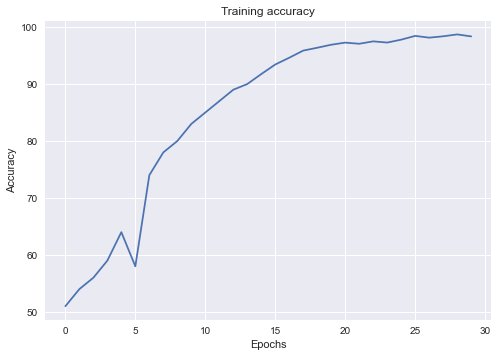

In [70]:
from matplotlib import pyplot as plt
plt.plot(y,data)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training accuracy')
plt.savefig('accuracy.png', dpi=1000, bbox_inches='tight' )

In [58]:
from sklearn.metrics import confusion_matrix



cm = confusion_matrix(x, y_pred, labels=[0, 1])


In [59]:
cm

array([[1244,  188],
       [ 256, 1106]], dtype=int64)

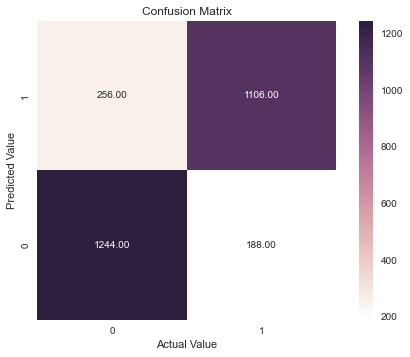

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd

import seaborn as sns
import math

from mpl_toolkits.axes_grid1 import make_axes_locatable

import matplotlib as mpl

mpl.style.use('seaborn')

df_cm = pd.DataFrame(cm, 
    index = [i for i in range(cm.shape[0])],
    columns = [i for i in range(cm.shape[1])])

fig = plt.figure()

plt.clf()

ax = fig.add_subplot(111)
ax.set_aspect(1)

cmap = sns.cubehelix_palette(light=1, as_cmap=True)

res = sn.heatmap(df_cm, annot=True, fmt='.2f', cmap=cmap)

res.invert_yaxis()

#plt.yticks([0.5,1.5,2.5], [ '0', '1', '2'],va='center')

plt.title('Confusion Matrix')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')

plt.savefig('confusion_matrix_1.png', dpi=1000, bbox_inches='tight' )

plt.show()

In [61]:
pwd

'D:\\IUCAA\\mg2'

In [34]:
pred = model.predict(X_test)

88/88 [==============================] - 17s 155ms/step


In [50]:
y_pred=[]
for i in range(len(pred)):
    if pred[i]<0.5:
        y_pred.append(0)
    elif pred[i]>= 0.5:
        y_pred.append(1)
    else:
        print(i)

2577


In [55]:
x = list(y_test)

In [56]:
del x[2577]

2794

In [29]:
model.evaluate(X_test,y_test, verbose=2)

88/88 - 14s - loss: nan - accuracy: 0.8408 - 14s/epoch - 159ms/step


[nan, 0.8407871127128601]

In [36]:
for i in range(len(y_test)):
    print(y_test[i],pred[i])

0.0 [0.00044581]
1.0 [0.998478]
0.0 [0.01571688]
0.0 [8.142346e-05]
1.0 [0.24305384]
0.0 [0.02215316]
1.0 [3.6117366e-05]
0.0 [6.432623e-05]
0.0 [0.10428217]
1.0 [1.]
1.0 [1.]
0.0 [3.2772373e-06]
1.0 [1.]
0.0 [1.1652538e-05]
1.0 [0.9999999]
0.0 [0.29513305]
1.0 [0.3022333]
0.0 [0.0018295]
1.0 [1.]
1.0 [1.]
0.0 [7.3106414e-05]
1.0 [1.]
1.0 [1.]
0.0 [0.04915718]
0.0 [1.]
0.0 [8.39849e-06]
1.0 [1.]
1.0 [0.98486835]
1.0 [1.]
0.0 [0.00587118]
1.0 [1.]
0.0 [6.088726e-05]
0.0 [3.2772637e-05]
0.0 [0.00030922]
1.0 [0.952787]
1.0 [1.]
0.0 [0.00714278]
1.0 [1.]
1.0 [0.9748644]
0.0 [4.654489e-06]
0.0 [0.001059]
1.0 [1.]
0.0 [1.3857135e-06]
0.0 [0.91425806]
1.0 [1.]
0.0 [8.427203e-06]
0.0 [5.7657476e-06]
1.0 [1.]
1.0 [0.99901694]
0.0 [0.9995724]
1.0 [1.]
1.0 [1.]
0.0 [0.9341851]
0.0 [0.00052875]
0.0 [0.00066052]
1.0 [0.9939281]
0.0 [2.1418622e-05]
1.0 [0.8002697]
0.0 [0.00023009]
0.0 [0.07264572]
1.0 [0.9985556]
0.0 [0.01748648]
1.0 [0.9899625]
1.0 [0.7599398]
0.0 [0.01075829]
0.0 [0.41585034]
1.0 

0.0 [4.6988847e-05]
1.0 [1.]
1.0 [0.84784424]
1.0 [0.99999213]
1.0 [0.9944789]
1.0 [6.323412e-07]
1.0 [1.]
0.0 [0.00749837]
1.0 [0.999999]
0.0 [0.9999618]
1.0 [0.99999934]
0.0 [0.00032848]
1.0 [0.99999744]
0.0 [8.020517e-05]
1.0 [1.]
0.0 [9.1676004e-05]
1.0 [1.]
1.0 [0.999942]
1.0 [0.9521928]
0.0 [1.]
1.0 [1.]
1.0 [0.10848165]
0.0 [0.00135]
0.0 [0.7954386]
0.0 [0.00159357]
0.0 [5.7798075e-05]
1.0 [1.]
0.0 [0.00270233]
1.0 [0.99910045]
1.0 [0.9999998]
0.0 [0.999782]
1.0 [1.]
0.0 [9.70689e-09]
0.0 [0.7667283]
0.0 [6.475556e-06]
1.0 [1.]
1.0 [1.]
1.0 [1.]
0.0 [0.09191365]
0.0 [0.19151762]
0.0 [0.00017355]
1.0 [0.4193005]
1.0 [1.]
1.0 [1.]
0.0 [0.16042086]
1.0 [1.]
1.0 [0.1992944]
0.0 [0.0025061]
1.0 [1.]
0.0 [3.2126212e-05]
1.0 [1.]
1.0 [1.]
1.0 [1.]
0.0 [1.5101529e-05]
0.0 [1.]
1.0 [0.0072236]
1.0 [1.]
1.0 [1.]
1.0 [0.9999984]
0.0 [7.6213524e-05]
0.0 [0.00022474]
1.0 [1.]
0.0 [1.6684806e-11]
1.0 [0.99390143]
0.0 [0.999999]
0.0 [0.83783203]
1.0 [0.00050772]
0.0 [0.01633117]
1.0 [0.9999994

0.0 [0.01640447]
0.0 [0.00014574]
0.0 [0.00041662]
0.0 [0.9609402]
1.0 [0.99957186]
1.0 [1.]
0.0 [7.3172564e-06]
1.0 [0.7733528]
1.0 [0.9755544]
1.0 [1.]
0.0 [6.579812e-08]
0.0 [2.1492038e-05]
0.0 [0.02637313]
0.0 [0.09571425]
0.0 [0.00483224]
0.0 [1.1224251e-08]
0.0 [0.00388606]
1.0 [0.8509004]
0.0 [0.00127894]
1.0 [1.]
1.0 [0.9974345]
0.0 [4.2734475e-05]
0.0 [2.8440212e-05]
0.0 [0.99722433]
1.0 [1.]
0.0 [0.6844305]
0.0 [0.99999994]
1.0 [0.9999976]
1.0 [0.10950411]
1.0 [0.99999]
0.0 [0.51064366]
1.0 [1.]
1.0 [1.]
0.0 [0.00015298]
0.0 [0.78589886]
0.0 [0.00011382]
0.0 [0.99994195]
1.0 [0.99999845]
1.0 [1.]
1.0 [0.99998045]
1.0 [0.34494537]
1.0 [0.00029043]
0.0 [0.00063158]
1.0 [0.9999997]
1.0 [0.998044]
1.0 [0.97063214]
0.0 [1.0910679e-06]
1.0 [0.03509756]
0.0 [0.00426203]
1.0 [0.50433195]
0.0 [0.99947876]
0.0 [6.2194034e-05]
0.0 [0.09441692]
1.0 [1.]
1.0 [0.9992512]
0.0 [1.5939867e-07]
0.0 [1.]
0.0 [0.47216937]
1.0 [0.03313076]
0.0 [0.00555813]
0.0 [0.11490413]
1.0 [0.00147334]
1.0 [1

0.0 [0.00017735]
0.0 [0.00398788]
1.0 [0.94137454]
1.0 [0.9997867]
0.0 [0.00014966]
1.0 [1.]
0.0 [0.00206611]
0.0 [0.30241907]
0.0 [0.89710003]
1.0 [0.5349993]
1.0 [1.]
1.0 [0.00354572]
0.0 [0.00070583]
1.0 [0.9998229]
0.0 [0.01684123]
0.0 [0.09392215]
1.0 [1.]
0.0 [0.63839597]
0.0 [0.00024772]
1.0 [0.16537812]
1.0 [1.]
1.0 [0.8776457]
0.0 [0.00838708]
0.0 [1.891021e-05]
1.0 [0.6758765]
1.0 [0.9999433]
0.0 [0.03111381]
0.0 [0.00014504]
0.0 [1.9305378e-06]
1.0 [0.99978775]
1.0 [1.]
0.0 [0.00017448]
1.0 [1.]
1.0 [0.99856347]
0.0 [1.0589308e-09]
1.0 [0.6866273]
1.0 [0.964057]
0.0 [0.00068004]
1.0 [1.]
1.0 [1.]
0.0 [0.01935547]
0.0 [0.00028857]
0.0 [2.1101996e-05]
1.0 [0.9950535]
1.0 [0.452653]
0.0 [7.5886164e-06]
0.0 [0.00353825]
0.0 [4.279049e-09]
1.0 [0.999573]
0.0 [0.00558353]
0.0 [0.01034109]
1.0 [0.63422257]
0.0 [0.00159993]
0.0 [1.7790764e-05]
1.0 [0.27279457]
1.0 [0.9994628]
1.0 [1.]
1.0 [0.05270845]
1.0 [0.99857956]
1.0 [0.14924385]
1.0 [0.9999869]
1.0 [0.00075345]
1.0 [0.14759165

In [31]:
!mkdir -p saved_model
model.save('saved_model/my_model')

INFO:tensorflow:Assets written to: saved_model/my_model\assets


INFO:tensorflow:Assets written to: saved_model/my_model\assets


In [1]:
import tensorflow as tf
new_model = tf.keras.models.load_model('saved_model90%/my_model')

# Check its architecture
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 3827, 96)          1536      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 1275, 96)         0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 1271, 256)         123136    
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 423, 256)         0         
 1D)                                                             
                                                                 
 dropout (Dropout)           (None, 423, 256)          0         
                                                                 
 conv1d_2 (Conv1D)           (None, 421, 384)          2

In [56]:
del model

In [34]:
new_model.evaluate(X_test,y_test, verbose=2)

88/88 - 2s - loss: 0.4767 - accuracy: 0.8667 - 2s/epoch - 23ms/step


[0.4766676425933838, 0.8667381405830383]

In [2]:
from astropy.io import fits
hdul1 = fits.open('../SDSS_DR16_QSO_based_MgII_Absorber_Catalog.fits')
print(hdul1[1].columns)

Plate1 = hdul1[1].data['PLATE']
Fiber1 = hdul1[1].data['FIBER_ID']
MJD1 = hdul1[1].data['MJD']
Zabs = hdul1[1].data['Z_ABS']
Nabs = hdul1[1].data['CORRECTED_NABS_WITH_ALL_QSO']
Zqso1 = hdul1[1].data['Z_QSO']
Rew_2796 = hdul1[1].data['REST_EW_MGII_2796']
err_Rew_2796 = hdul1[1].data['ERR_REST_EW_MGII_2796']
Rew_2803 = hdul1[1].data['REST_EW_MGII_2803']
err_Rew_2803 = hdul1[1].data['ERR_REST_EW_MGII_2803']
print(len(MJD1))

ColDefs(
    name = 'CORRECTED_NABS_WITH_ALL_QSO'; format = 'D'
    name = 'CORRECTED_NABS_WITH_QSO_SN_GR_1'; format = 'D'
    name = 'CORRECTED_NABS_WITH_QSO_SN_GR_2'; format = 'D'
    name = 'DEC_QSO'; format = 'D'; unit = 'DEG'
    name = 'DELTA_V_MGII_2796'; format = 'D'; unit = 'km/s'
    name = 'DELTA_V_MGII_2803'; format = 'D'; unit = 'km/s'
    name = 'EIGENSPEC_INDEX'; format = 'K'
    name = 'ERR_DELTA_V_MGII_2796'; format = 'D'; unit = 'km/s'
    name = 'ERR_DELTA_V_MGII_2803'; format = 'D'; unit = 'km/s'
    name = 'ERR_FWHM_VDISP_MGII_2796'; format = 'D'; unit = 'km/s'
    name = 'ERR_FWHM_VDISP_MGII_2803'; format = 'D'; unit = 'km/s'
    name = 'ERR_REST_EW_MGII_2796'; format = 'D'; unit = 'Angstrom'
    name = 'ERR_REST_EW_MGII_2803'; format = 'D'; unit = 'Angstrom'
    name = 'FIBER_ID'; format = 'K'
    name = 'FWHM_VDISP_MGII_2796'; format = 'D'; unit = 'km/s'
    name = 'FWHM_VDISP_MGII_2803'; format = 'D'; unit = 'km/s'
    name = 'MJD'; format = 'K'
    name = 'PAR

In [5]:
k = 0
Plate1 = list(Plate1)
Fiber1 = list(Fiber1)
for i in range(len(MJD1)):
    if len(str(Plate1[i]))==3:
        Plate1[i] = '0'+str(Plate1[i])
    if len(str(Fiber1[i]))==3:
        Fiber1[i] = '0'+str(Fiber1[i])
    if len(str(Plate1[i]))==2:
        Plate1[i] = '00'+str(Plate1[i])
    if len(str(Fiber1[i]))==2:
        Fiber1[i] = '00'+str(Fiber1[i])
    if len(str(Plate1[i]))==1:
        Plate1[i] = '000'+str(Plate1[i])
    if len(str(Fiber1[i]))==1:
        Fiber1[i] = '000'+str(Fiber1[i])


In [30]:
cd D:\\IUCAA\\mg2

D:\IUCAA\mg2


In [31]:
import glob,os
files = os.listdir('../CNN-DR16/Data/non/')
print(len(files))

159524


In [32]:
cd ../CNN-Dr16/Data/non

D:\IUCAA\CNN-Dr16\Data\non


In [33]:
from astropy.io import fits
spectra = fits.open(files[1])
print(spectra[1].columns)

ColDefs(
    name = 'flux'; format = 'E'
    name = 'loglam'; format = 'E'
    name = 'ivar'; format = 'E'
    name = 'and_mask'; format = 'J'
    name = 'or_mask'; format = 'J'
    name = 'wdisp'; format = 'E'
    name = 'sky'; format = 'E'
    name = 'model'; format = 'E'
)


In [34]:
import numpy as np
ivar = spectra[1].data['ivar']
error = 1.0/np.sqrt(ivar)
model = spectra[1].data['model']
flux = spectra[1].data['FLUX']
wave = 10**spectra[1].data['loglam']

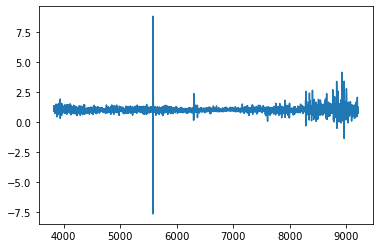

In [35]:
import matplotlib.pyplot as plt
plt.plot(wave,flux/model)

In [36]:
files= files[:1000]

In [37]:
from tqdm.auto import tqdm

discard = []
for i in tqdm(range(len(MJD1))):
    for j in range(len(files)):
        if 'spec-'+str(Plate1[i])+ '-' +str(MJD1[i])+ '-'+str(Fiber1[i])+'.fits' == files[j]:
            if Rew_2796[i] < 3*err_Rew_2796[i] and Rew_2803[i] < 3*err_Rew_2803[i]:
                name = files[j]
                discard.append(name)

print(len(files))
print(len(discard))
ew_checked = list(set(files) - set(discard))
print(len(ew_checked))

  0%|          | 0/159524 [00:00<?, ?it/s]

1000
4
996


In [25]:
ew_checked = list(set(files) - set(discard))
print(len(ew_checked))

99


In [39]:
fits_files = ew_checked

In [41]:
list_Z_emi1 = []
temp = []
for i in tqdm(range(len(MJD1))):
    for j in fits_files:
        if 'spec-'+str(Plate1[i])+ '-' +str(MJD1[i])+ '-'+str(Fiber1[i])+'.fits' == j :
            list_Z_emi1.append(Zqso1[i])
            temp.append(j)
print(len(list_Z_emi1))

  0%|          | 0/159524 [00:00<?, ?it/s]

48


In [45]:
list_z = list_Z_emi1
list_z = np.array(list_z)
print(list_z.shape)
np.save('list_Z_emi_60k', list_z)

(60067,)


In [19]:
temp = fits_files[:100]
list_Z_emi = list_Z_emi1[:100]

In [43]:
list_Z_emi = list_Z_emi1[:100]

In [44]:
from astropy.io import fits
import numpy as np
specs = []
waves = []

unchanged = 0

for f in tqdm(range(len(temp))):
    #spectra = fits.open('../CNN-DR16/Data/non/'+ temp[f] )
    spectra = fits.open( temp[f] )
    wave = 10**spectra[1].data['loglam']
    flux = spectra[1].data['flux']
    model = spectra[1].data['model']
    if list_Z_emi[f] <=1:
        X,Y,Z = [],[],[]
        for i in range(wave.shape[0]):
            if wave[i] > 4250 :
                X.append(flux[i])
                Y.append(model[i])
                Z.append(wave[i])
        specs.append(np.array(X)/np.array(Y))
        waves.append(Z)
    
    elif 1< list_Z_emi[f] <= 1.8:
        X,Y,Z = [],[],[]
        for i in range(wave.shape[0]):
            if wave[i] > 3100 :
                X.append(flux[i])
                Y.append(model[i])
                Z.append(wave[i])
        specs.append(np.array(X)/np.array(Y))
        waves.append(Z)
        
    elif 1.8< list_Z_emi[f] <= 2.8:
        X,Y,Z = [],[],[]
        for i in range(wave.shape[0]):
            if wave[i] > 2250 :
                X.append(flux[i])
                Y.append(model[i])
                Z.append(wave[i])
        specs.append(np.array(X)/np.array(Y))
        waves.append(Z)
        
    elif 2.8< list_Z_emi[f] <= 4.8:
        X,Y,Z = [],[],[]
        for i in range(wave.shape[0]):
            if wave[i] > 1500 :
                X.append(flux[i])
                Y.append(model[i])
                Z.append(wave[i])
        specs.append(np.array(X)/np.array(Y))
        waves.append(Z)
        
    else:
        unchanged = unchanged + 1
        specs.append(flux/model)
        waves.append(wave)
    
print(len(specs), len(waves), unchanged)

  0%|          | 0/48 [00:00<?, ?it/s]

48 48 0


In [45]:
from scipy.ndimage import interpolation
import numpy as np
specs_inter = []
temp = specs
#specs, specs2 = [], []
for i in tqdm(temp):
    x = np.array(i)
    i = 3841
    z = i / len(x)
    x_int = interpolation.zoom(x,z)
    np.expand_dims(x_int, axis=0)
    specs_inter.append(x_int)
specs_inter = np.array(specs_inter)
specs_inter = np.expand_dims(specs_inter, axis=2)
print(specs_inter.shape)

  0%|          | 0/48 [00:00<?, ?it/s]

(48, 3841, 1)


In [46]:
pred = new_model.predict(specs_inter)

2/2 [==============================] - 1s 94ms/step


In [47]:
for i in pred:
    print(i)

[0.9999801]
[0.98356307]
[0.98356307]
[0.9984862]
[0.99885464]
[0.99999994]
[0.00966564]
[1.]
[1.]
[1.]
[1.]
[1.]
[0.46712413]
[0.9354524]
[0.5293124]
[0.94103277]
[0.68607014]
[0.9998493]
[0.9998493]
[0.9985929]
[0.9857469]
[0.08675727]
[0.99985343]
[0.907784]
[1.]
[1.]
[0.10977903]
[0.9991618]
[0.9999999]
[1.]
[1.]
[1.]
[0.99711025]
[0.9999953]
[1.]
[0.92699677]
[0.9986575]
[0.99999994]
[0.99999994]
[0.99999994]
[0.995929]
[0.9994431]
[0.00082082]
[0.9989848]
[0.9989848]
[0.9996668]
[0.93509203]
[0.9993213]


In [50]:
new_model.evaluate(specs_inter,np.zeros(48), verbose=2)

2/2 - 0s - loss: 9.6783 - accuracy: 0.1042 - 267ms/epoch - 133ms/step


[9.67830753326416, 0.1041666641831398]

In [41]:
reshaped = []
for i in X_train:
    i = i.reshape(23,167)
    i = np.expand_dims(i, axis=-1)
    reshaped.append(i)
reshaped = np.array(reshaped)


In [42]:
reshaped.shape

(11097, 23, 167, 1)

In [ ]:
import autokeras as ak
clf = ak.ImageClassifier(overwrite=True, max_trials=2)
clf.fit(
    reshaped,
    y_train,
    # Split the training data and use the last 15% as validation data.
    validation_split=0.15,
    epochs=10,
)

Trial 1 Complete [00h 00m 31s]
val_loss: 0.6629297733306885

Best val_loss So Far: 0.6629297733306885
Total elapsed time: 00h 00m 31s

Search: Running Trial #2

Value             |Best Value So Far |Hyperparameter
resnet            |vanilla           |image_block_1/block_type
True              |True              |image_block_1/normalize
True              |False             |image_block_1/augment
True              |None              |image_block_1/image_augmentation_1/horizontal_flip
True              |None              |image_block_1/image_augmentation_1/vertical_flip
0                 |None              |image_block_1/image_augmentation_1/contrast_factor
0                 |None              |image_block_1/image_augmentation_1/rotation_factor
0.1               |None              |image_block_1/image_augmentation_1/translation_factor
0                 |None              |image_block_1/image_augmentation_1/zoom_factor
False             |None              |image_block_1/res_net_block_1/pr

Epoch 1/10


295/295 [==============================] - 165s 510ms/step - loss: 0.7185 - accuracy: 0.6084 - val_loss: 71.0114 - val_accuracy: 0.5063
Epoch 2/10
270/295 [==========================>...] - ETA: 12s - loss: 0.5672 - accuracy: 0.7160Not enough memory, reduce batch size to 16.
Epoch 1/10
590/590 [==============================] - 155s 260ms/step - loss: 0.5504 - accuracy: 0.7302 - val_loss: 0.7996 - val_accuracy: 0.4912
Epoch 2/10
590/590 [==============================] - 158s 267ms/step - loss: 0.4919 - accuracy: 0.7768 - val_loss: 0.7104 - val_accuracy: 0.5088
Epoch 3/10
590/590 [==============================] - 157s 266ms/step - loss: 0.4623 - accuracy: 0.7897 - val_loss: 1.0853 - val_accuracy: 0.5069
Epoch 4/10
590/590 [==============================] - 160s 272ms/step - loss: 0.4462 - accuracy: 0.8012 - val_loss: 0.7322 - val_accuracy: 0.4906
Epoch 5/10
590/590 [==============================] - 164s 279ms/step - loss: 0.4388 - accuracy: 0.8020 - val_loss: 0.6978 - val_accuracy: 0

In [40]:
reshaped = []
for i in X_test:
    i = i.reshape(23,167)
    i = np.expand_dims(i, axis=-1)
    reshaped.append(i)
reshaped = np.array(reshaped)


In [43]:

# Predict with the best model.
predicted_y = clf.predict(reshaped)



# Evaluate the best model with testing data.
print(clf.evaluate(reshaped, y_test))


88/88 [==============================] - 0s 3ms/step
[[1.]
 [0.]
 [0.]
 ...
 [1.]
 [1.]
 [1.]]
88/88 [==============================] - 1s 5ms/step - loss: 0.5944 - accuracy: 0.6758
[0.5944477319717407, 0.6758202314376831]


In [44]:
for i in range(len(y_test)):
    print(predicted_y[i],  y_test[i])

[1.] 1.0
[0.] 0.0
[0.] 1.0
[0.] 1.0
[0.] 1.0
[0.] 0.0
[1.] 1.0
[0.] 0.0
[0.] 1.0
[0.] 1.0
[0.] 0.0
[0.] 0.0
[1.] 1.0
[1.] 1.0
[0.] 0.0
[1.] 1.0
[1.] 1.0
[1.] 1.0
[0.] 1.0
[0.] 0.0
[1.] 1.0
[1.] 0.0
[1.] 1.0
[1.] 1.0
[0.] 1.0
[1.] 1.0
[1.] 1.0
[0.] 0.0
[0.] 0.0
[0.] 0.0
[1.] 0.0
[0.] 0.0
[0.] 0.0
[1.] 0.0
[1.] 1.0
[1.] 1.0
[1.] 0.0
[0.] 1.0
[0.] 1.0
[0.] 0.0
[1.] 1.0
[1.] 0.0
[1.] 0.0
[1.] 1.0
[0.] 0.0
[0.] 0.0
[1.] 1.0
[1.] 1.0
[1.] 0.0
[0.] 0.0
[1.] 0.0
[1.] 0.0
[1.] 1.0
[0.] 0.0
[1.] 1.0
[0.] 1.0
[0.] 1.0
[0.] 0.0
[1.] 0.0
[0.] 1.0
[0.] 0.0
[0.] 0.0
[0.] 0.0
[1.] 0.0
[1.] 1.0
[1.] 1.0
[1.] 1.0
[1.] 1.0
[1.] 0.0
[1.] 1.0
[1.] 1.0
[1.] 1.0
[1.] 0.0
[0.] 0.0
[1.] 1.0
[1.] 1.0
[0.] 1.0
[0.] 0.0
[1.] 1.0
[0.] 0.0
[1.] 1.0
[0.] 0.0
[1.] 1.0
[0.] 1.0
[0.] 1.0
[1.] 0.0
[1.] 1.0
[0.] 0.0
[0.] 0.0
[0.] 0.0
[0.] 0.0
[1.] 1.0
[0.] 1.0
[1.] 1.0
[0.] 0.0
[1.] 1.0
[1.] 1.0
[1.] 1.0
[0.] 0.0
[1.] 0.0
[0.] 0.0
[1.] 0.0
[1.] 1.0
[0.] 1.0
[0.] 1.0
[0.] 0.0
[1.] 1.0
[1.] 1.0
[1.] 1.0
[1.] 1.0
[1.] 0.0
[

[1.] 0.0
[0.] 0.0
[1.] 1.0
[1.] 1.0
[1.] 0.0
[1.] 1.0
[0.] 0.0
[1.] 1.0
[1.] 1.0
[1.] 1.0
[1.] 1.0
[1.] 0.0
[1.] 1.0
[0.] 0.0
[1.] 1.0
[1.] 0.0
[1.] 1.0
[1.] 0.0
[1.] 1.0
[0.] 1.0
[0.] 0.0
[0.] 0.0
[0.] 0.0
[0.] 0.0
[1.] 0.0
[1.] 1.0
[1.] 0.0
[0.] 1.0
[1.] 1.0
[1.] 0.0
[0.] 0.0
[1.] 1.0
[1.] 1.0
[1.] 1.0
[0.] 0.0
[1.] 0.0
[1.] 0.0
[1.] 1.0
[1.] 0.0
[1.] 1.0
[0.] 0.0
[0.] 0.0
[1.] 0.0
[1.] 1.0
[1.] 1.0
[0.] 0.0
[1.] 1.0
[0.] 0.0
[1.] 1.0
[1.] 1.0
[1.] 1.0
[1.] 1.0
[1.] 1.0
[0.] 0.0
[1.] 0.0
[1.] 1.0
[0.] 0.0
[1.] 1.0
[1.] 0.0
[1.] 1.0
[0.] 1.0
[0.] 1.0
[1.] 1.0
[0.] 0.0
[0.] 1.0
[0.] 1.0
[1.] 1.0
[0.] 0.0
[1.] 1.0
[1.] 1.0
[0.] 0.0
[0.] 0.0
[1.] 1.0
[1.] 1.0
[1.] 0.0
[1.] 0.0
[1.] 1.0
[1.] 1.0
[0.] 0.0
[1.] 1.0
[0.] 0.0
[0.] 0.0
[1.] 1.0
[1.] 1.0
[1.] 1.0
[0.] 0.0
[0.] 1.0
[0.] 0.0
[1.] 1.0
[0.] 0.0
[1.] 0.0
[1.] 1.0
[1.] 1.0
[1.] 1.0
[1.] 0.0
[0.] 0.0
[1.] 0.0
[1.] 0.0
[1.] 1.0
[0.] 0.0
[1.] 0.0
[1.] 0.0
[0.] 1.0
[1.] 1.0
[0.] 0.0
[1.] 0.0
[1.] 1.0
[1.] 1.0
[0.] 0.0
[1.] 0.0
[1.] 1.0
[

[0.] 0.0
[0.] 0.0
[0.] 0.0
[0.] 0.0
[1.] 0.0
[1.] 1.0
[0.] 0.0
[1.] 1.0
[0.] 0.0
[0.] 0.0
[0.] 1.0
[0.] 0.0
[1.] 1.0
[1.] 1.0
[1.] 1.0
[1.] 0.0
[1.] 0.0
[0.] 1.0
[1.] 1.0
[1.] 1.0
[0.] 0.0
[0.] 1.0
[0.] 0.0
[1.] 1.0
[0.] 1.0
[1.] 1.0
[1.] 1.0
[0.] 0.0
[1.] 1.0
[0.] 0.0
[1.] 0.0
[0.] 0.0
[1.] 1.0
[0.] 0.0
[0.] 0.0
[1.] 0.0
[1.] 1.0
[0.] 1.0
[1.] 0.0
[0.] 0.0
[1.] 1.0
[0.] 1.0
[1.] 1.0
[0.] 0.0
[1.] 0.0
[0.] 1.0
[0.] 0.0
[1.] 1.0
[0.] 0.0
[0.] 1.0
[1.] 1.0
[1.] 0.0
[1.] 1.0
[0.] 0.0
[1.] 1.0
[1.] 1.0
[1.] 1.0
[1.] 1.0
[1.] 0.0
[1.] 1.0
[0.] 0.0
[1.] 1.0
[0.] 0.0
[1.] 0.0
[0.] 0.0
[1.] 1.0
[0.] 0.0
[0.] 1.0
[0.] 0.0
[0.] 0.0
[1.] 1.0
[1.] 1.0
[0.] 1.0
[1.] 1.0
[0.] 0.0
[1.] 1.0
[1.] 1.0
[0.] 0.0
[1.] 1.0
[1.] 1.0
[0.] 0.0
[1.] 1.0
[0.] 0.0
[1.] 0.0
[1.] 1.0
[1.] 1.0
[1.] 1.0
[1.] 0.0
[1.] 1.0
[1.] 1.0
[1.] 1.0
[0.] 0.0
[1.] 0.0
[1.] 1.0
[0.] 0.0
[0.] 0.0
[0.] 0.0
[1.] 1.0
[1.] 1.0
[0.] 0.0
[0.] 0.0
[1.] 0.0
[0.] 1.0
[0.] 0.0
[0.] 0.0
[0.] 0.0
[1.] 0.0
[0.] 0.0
[1.] 1.0
[0.] 1.0
[1.] 0.0
[

In [53]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, predicted_y, normalize=True))

0.6758202567760342


# Personal Model

In [ ]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dropout, Dense, Flatten
from tensorflow.keras import Sequential

model = Sequential()
model.add(Conv1D(filters=96, kernel_size=15, activation='relu', input_shape=(3841,1)))
model.add(MaxPooling1D(pool_size=3))
model.add(Conv1D(filters=256, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=3))
model.add(Dropout(0.5))
model.add(Conv1D(filters=384, kernel_size=3, activation='relu'))
model.add(Conv1D(filters=384, kernel_size=3, activation='relu'))
model.add(Conv1D(filters=256, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=3))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(2, activation='softmax'))
print(model.summary())
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [54]:
from scipy.ndimage import interpolation
import numpy as np
specs_inter = []
#temp = #specs + specs2
#specs, specs2 = [], []
for i in (temp):
    x = np.array(i)
    i = 3842
    z = i / len(x)
    x_int = interpolation.zoom(x,z)
    np.expand_dims(x_int, axis=0)
    specs_inter.append(x_int)
specs_inter = np.array(specs_inter)
specs_inter = np.expand_dims(specs_inter, axis=2)
print(specs_inter.shape)

(14020, 3842, 1)


In [20]:
reshaped = []
for i in specs_inter:
    i = i.reshape(1921,2)
    #i = np.expand_dims(i, axis=-1)
    reshaped.append(i)
reshaped = np.array(reshaped)
print(reshaped.shape)

ValueError: cannot reshape array of size 3841 into shape (1921,2)

(13902, 1921, 2, 1)

In [102]:
from classification_models_1D.tfkeras import Classifiers

ResNet18, preprocess_input = Classifiers.get('resnet18')
#model = ResNet18(input_shape=(1921, 2), weights='imagenet',include_top = False)

In [104]:
from tensorflow.keras import Sequential
resnet_model = Sequential()

pretrained_model= ResNet18(input_shape=(1921, 2), weights='imagenet',include_top = False)
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)

In [106]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dropout, Dense, Flatten
resnet_model.add(Flatten())
resnet_model.add(Dense(1024, activation='relu'))
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(1, activation='softmax'))
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model (Functional)          (None, 2, 512)            11183752  
                                                                 
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 1024)              1049600   
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 1)                 513       
                                                                 
Total params: 12,758,665
Trainable params: 1,574,913
Non-trainable params: 11,183,752
_________________________________________________________________


In [107]:

resnet_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(reshaped, label, random_state=42, train_size = .8)
print('training data:', len(X_train), len(y_train))
print('testing data:', len(X_test), len(y_test))

training data: 11216 11216
testing data: 2804 2804


In [114]:
resnet_model.fit(X_train, y_train, epochs=20, batch_size=1, verbose=2)

ValueError: Data cardinality is ambiguous:
  x sizes: 3831, 3830, 3823, 3829, 3835, 3844, 3826, 3182, 3815, 3833, 3840, 3825, 3816, 3827, 3822, 3818, 3836, 3845, 3840, 3818, 3832, 3362, 3358, 3844, 3821, 3812, 3824, 3806, 3850, 3837, 3828, 3842, 3834, 3840, 3836, 3831, 3844, 3815, 3843, 3840, 3839, 3843, 3840, 3842, 3854, 3843, 3813, 3845, 3838, 3843, 3833, 3360, 3827, 3838, 3843, 3834, 3838, 3818, 3826, 3819, 3835, 3832, 3852, 3838, 3849, 3840, 3839, 3843, 3833, 3843, 3831, 3839, 3836, 3826, 3836, 3836, 3844, 3836, 3816, 3816, 3821, 3840, 3837, 3845, 3845, 3828, 3848, 3839, 3834, 3843, 3839, 3831, 3833, 3836, 3834, 3825, 3829, 3840, 3844, 3837, 3362, 3822, 3840, 3826, 3830, 3830, 3811, 3802, 3846, 3811, 3827, 3852, 3353, 3840, 3825, 3847, 3838, 3836, 3824, 3840, 3829, 3850, 3826, 3839, 3821, 3846, 3836, 3840, 3350, 3835, 3843, 3837, 3840, 3823, 3828, 3843, 3821, 3844, 3841, 3826, 3828, 3838, 3840, 3360, 3845, 3838, 3824, 3817, 3840, 3362, 3820, 3832, 3842, 3805, 3835, 3841, 3825, 3810, 3827, 3836, 3841, 3815, 3814, 3826, 3838, 3844, 3836, 3825, 3846, 3809, 3809, 3839, 3815, 3835, 3840, 3833, 3839, 3842, 3842, 3843, 3843, 3831, 3362, 3835, 3800, 3836, 3362, 3822, 3840, 3348, 3836, 3825, 3840, 3808, 3822, 3843, 3827, 3841, 3835, 3836, 3808, 3843, 3848, 3834, 3840, 3824, 3802, 3839, 3840, 3355, 3832, 3838, 3832, 3840, 3836, 3834, 3838, 3845, 3828, 3844, 3827, 3818, 3360, 3849, 3832, 3838, 3362, 3837, 3825, 3840, 3815, 3825, 3844, 3840, 3827, 3843, 3840, 3834, 3822, 3842, 3844, 3842, 3838, 3837, 3841, 3825, 3846, 3832, 3831, 3834, 3851, 3816, 3834, 3836, 3838, 3836, 3837, 3839, 3359, 3834, 3836, 3819, 3835, 3842, 3833, 3846, 3359, 3828, 3828, 3846, 3850, 3848, 3844, 3839, 3850, 3838, 3839, 3782, 3842, 3816, 3832, 3841, 3828, 3829, 3815, 3843, 3833, 3816, 3831, 3842, 3839, 3837, 3362, 3843, 3838, 3844, 3841, 3826, 3838, 3829, 3833, 3842, 3836, 3828, 3833, 3834, 3844, 3846, 3810, 3820, 3848, 3839, 3844, 3833, 3844, 3845, 3835, 3838, 3828, 3833, 3846, 3360, 3844, 3838, 3809, 3823, 3816, 3825, 3828, 3349, 3357, 3841, 3057, 3825, 3830, 3840, 3817, 3356, 3846, 3817, 3820, 3849, 3831, 3837, 3844, 3842, 3839, 3842, 3840, 3846, 3846, 3843, 3834, 3835, 3360, 3844, 3814, 3839, 3837, 3832, 3360, 3833, 3836, 3817, 3830, 3823, 3837, 3828, 3833, 3840, 3838, 3840, 3359, 3362, 3847, 3830, 3353, 3829, 3833, 3843, 3823, 3829, 3350, 3841, 3845, 3838, 3839, 3831, 3820, 3819, 3827, 3360, 3844, 3836, 3831, 3839, 3815, 3808, 3845, 3854, 3821, 3825, 3814, 3836, 3363, 3845, 3812, 3826, 3359, 3812, 3842, 3830, 3352, 3838, 3353, 3843, 3813, 3821, 3356, 3833, 3833, 3836, 3835, 3820, 3817, 3836, 3838, 3351, 3843, 3843, 3836, 3842, 3810, 3847, 3839, 3815, 3840, 3361, 3012, 3828, 3834, 3841, 3353, 3807, 3841, 3823, 3815, 3842, 3834, 3843, 3836, 3836, 3832, 3823, 3846, 3839, 3831, 3836, 3840, 3837, 3840, 3817, 3750, 3829, 3841, 3815, 3828, 3843, 3354, 3843, 3830, 3834, 3825, 3814, 3823, 3842, 3841, 3825, 3842, 3835, 3826, 3356, 3842, 3843, 3838, 3840, 3844, 3836, 3812, 3834, 3832, 3829, 3817, 3820, 3840, 3840, 3850, 3812, 3347, 3843, 3829, 3843, 3794, 3354, 3838, 3843, 3841, 3852, 3847, 3838, 3837, 3836, 3821, 3836, 3833, 3828, 3847, 3845, 3848, 3826, 3828, 3812, 3811, 3825, 3847, 3807, 3811, 3829, 3829, 3841, 3836, 3815, 3354, 3846, 3822, 3837, 3837, 3844, 3836, 3831, 3844, 3826, 3837, 3839, 3842, 3835, 3822, 3834, 3825, 3850, 3837, 3835, 3843, 3830, 3842, 3364, 3821, 3839, 3844, 3820, 3840, 3809, 3845, 3842, 3846, 3827, 3828, 3835, 3807, 3828, 3827, 3844, 3823, 3811, 3834, 3827, 3836, 3844, 3838, 3846, 3817, 3837, 3823, 3847, 3804, 3834, 3838, 3836, 3805, 3844, 3833, 3352, 3830, 3843, 3838, 3841, 3842, 3830, 3828, 3845, 3832, 3806, 3843, 3835, 3841, 3835, 3834, 3836, 3842, 3830, 3827, 3835, 3810, 3815, 3827, 3813, 3829, 3836, 3812, 3819, 3848, 3827, 3824, 3809, 3850, 3836, 3825, 3844, 3847, 3838, 3843, 3825, 3840, 3834, 3832, 3831, 3817, 3844, 3355, 3362, 3356, 3828, 3832, 3831, 3830, 3843, 3843, 3849, 3840, 3848, 3841, 3802, 3823, 3830, 3836, 3809, 3817, 3835, 3823, 3833, 3357, 3847, 3821, 3832, 3836, 3842, 3830, 3845, 3808, 3834, 3848, 3836, 3846, 3842, 3827, 3828, 3840, 3836, 3839, 3827, 3840, 3844, 3843, 3815, 3842, 3836, 3827, 3821, 3827, 3838, 3838, 3846, 3841, 3840, 3846, 3351, 3844, 3853, 3827, 3834, 3837, 3832, 3821, 3838, 3352, 3843, 3846, 3836, 3841, 3838, 3831, 3812, 3824, 3827, 3827, 3850, 3846, 3680, 3851, 3350, 3836, 3803, 3802, 3831, 3844, 3838, 3829, 3812, 3832, 3817, 3832, 3843, 3820, 3841, 3834, 3838, 3825, 3842, 3835, 3846, 3826, 3822, 3832, 3822, 3362, 3845, 3841, 3830, 3836, 3842, 3842, 3842, 3840, 3822, 3845, 3819, 3840, 3824, 3813, 3839, 3843, 3830, 3838, 3839, 3808, 3843, 3837, 3817, 3841, 3842, 3841, 3842, 3839, 3838, 3840, 3828, 3823, 3821, 3830, 3844, 3842, 3843, 3833, 3811, 3842, 3357, 3839, 3839, 3838, 3837, 3848, 3835, 3823, 3838, 3844, 3824, 3802, 3826, 3803, 3839, 3831, 3843, 3844, 3820, 3834, 3810, 3812, 3839, 3844, 3836, 3838, 3843, 3836, 3350, 3833, 3834, 3356, 3821, 3847, 3843, 3830, 3845, 3810, 3829, 3804, 3842, 3841, 3831, 3833, 3825, 3814, 3843, 3836, 3838, 3827, 3828, 3836, 3830, 3842, 3852, 3834, 3841, 3835, 3842, 3832, 3834, 3851, 3839, 3816, 3362, 3834, 3826, 3812, 3810, 3829, 3842, 3835, 3840, 3842, 3841, 3356, 3813, 3362, 3836, 3822, 3842, 3823, 3835, 3839, 3827, 3820, 3834, 3826, 3350, 3826, 3841, 3836, 3825, 3838, 3842, 3838, 3844, 3808, 3843, 3833, 3843, 3843, 3842, 3813, 3355, 3833, 3844, 3829, 3832, 3846, 3841, 3828, 3848, 3809, 3845, 3841, 3824, 3840, 3833, 3838, 3815, 3828, 3832, 3832, 3841, 3838, 3816, 3839, 3833, 3806, 3840, 3818, 3358, 3822, 3841, 3348, 3796, 3836, 3833, 3842, 3842, 3830, 3785, 3806, 3807, 3840, 3844, 3827, 3810, 3816, 3850, 3822, 3828, 3841, 3350, 3837, 3832, 3844, 3830, 3850, 3358, 3845, 3832, 3835, 3838, 3827, 3842, 3362, 3842, 3813, 3829, 3837, 3820, 3828, 3832, 3835, 3839, 3828, 3842, 3844, 3812, 3837, 3822, 3822, 3848, 3843, 3841, 3838, 3364, 3841, 3842, 3814, 3815, 3843, 3835, 3840, 3841, 3842, 3832, 3846, 3827, 3845, 3838, 3834, 3839, 3838, 3361, 3835, 3822, 3833, 3847, 3843, 3830, 3832, 3828, 3814, 3362, 3362, 3817, 3844, 3842, 3840, 3832, 3806, 3353, 3841, 3836, 3840, 3841, 3818, 3848, 3841, 3811, 3835, 3835, 3836, 3356, 3808, 3832, 3833, 3844, 3812, 3840, 3354, 3841, 3825, 3835, 3847, 3850, 3835, 3837, 3844, 3842, 3835, 3814, 3839, 3827, 3816, 3350, 3845, 3844, 3838, 3842, 3817, 3362, 3836, 3833, 3829, 3844, 3844, 3824, 3809, 3841, 3811, 3834, 3846, 3362, 3817, 3849, 3816, 3807, 3825, 3842, 3838, 3832, 3836, 3358, 3840, 3348, 3840, 3822, 3815, 3815, 3827, 3839, 3831, 3851, 3843, 3845, 3833, 3838, 3839, 3817, 3836, 3841, 3836, 3839, 3833, 3831, 3359, 3845, 3845, 3842, 3844, 3832, 3346, 3835, 3820, 3838, 3846, 3823, 3831, 3812, 3839, 3842, 3844, 3819, 3832, 3810, 3818, 3823, 3827, 3810, 3826, 3842, 3843, 3839, 3819, 3832, 3831, 3345, 3842, 3832, 3827, 3843, 3831, 3827, 3832, 3822, 3834, 3834, 3838, 3840, 3822, 3831, 3843, 3839, 3844, 3844, 3833, 3845, 3823, 3835, 3848, 3837, 3845, 3839, 3824, 3842, 3365, 3825, 3820, 3843, 3805, 3817, 3833, 3826, 3353, 3835, 3809, 3839, 3828, 3830, 3834, 3843, 3835, 3805, 3842, 3823, 3839, 3828, 3836, 3824, 3849, 3839, 3819, 3841, 3828, 3840, 3817, 3839, 3844, 3840, 3844, 3362, 3826, 3816, 3821, 3811, 3839, 3815, 3353, 3830, 3840, 3842, 3825, 3837, 3829, 3818, 3843, 3842, 3818, 3808, 3831, 3834, 3829, 3801, 3848, 3845, 3350, 3829, 3355, 3844, 3841, 3830, 3837, 3850, 3839, 3820, 3842, 3844, 3835, 3813, 3843, 3841, 3828, 3824, 3843, 3829, 3362, 3839, 3835, 3828, 3822, 3808, 3842, 3833, 3831, 3832, 3818, 3832, 3845, 3818, 3841, 3839, 3835, 3843, 3826, 3831, 3838, 3840, 3350, 3844, 3802, 3832, 3832, 3847, 3354, 3355, 3831, 3819, 3837, 3840, 3848, 3815, 3847, 3840, 3812, 3828, 3835, 3842, 3843, 3824, 3836, 3839, 3818, 3839, 3828, 3844, 3506, 3842, 3834, 3828, 3839, 3833, 3842, 3845, 3835, 3848, 3847, 3841, 3847, 3840, 3834, 3808, 3822, 3833, 3354, 3803, 3823, 3830, 3820, 3825, 3827, 3838, 3843, 3842, 3838, 3827, 3833, 3843, 3359, 3840, 3840, 3839, 3821, 3833, 3833, 3838, 3818, 3833, 3817, 3845, 3819, 3841, 3820, 3825, 3842, 3477, 3838, 3838, 3842, 3841, 3349, 3837, 3827, 3815, 3847, 3843, 3843, 3823, 3845, 3825, 3844, 3841, 3824, 3839, 3841, 3825, 3839, 3834, 3838, 3831, 3843, 3840, 3843, 3851, 3358, 3827, 3845, 3830, 3842, 3842, 3841, 3806, 3819, 3834, 3841, 3827, 3844, 3835, 3826, 3829, 3844, 3835, 3823, 3814, 3830, 3836, 3835, 3362, 3837, 3822, 3351, 3840, 3836, 3844, 3843, 3358, 3843, 3845, 3844, 3827, 3824, 3815, 3840, 3826, 3848, 3840, 3817, 3842, 3850, 3845, 3845, 3823, 3814, 3362, 3364, 3841, 3835, 3842, 3820, 3826, 3804, 3821, 3818, 3820, 3824, 3833, 3359, 3833, 3833, 3841, 3839, 3816, 3829, 3834, 3831, 3819, 3842, 3847, 3840, 3836, 3809, 3837, 3829, 3833, 3838, 3840, 3486, 3802, 3362, 3844, 3835, 3840, 3840, 3839, 3835, 3814, 3827, 3852, 3829, 3830, 3837, 3844, 3829, 3820, 3838, 3822, 3837, 3841, 3840, 3820, 3809, 3839, 3836, 3844, 3833, 3843, 3806, 3853, 3839, 3840, 3841, 3855, 3838, 3837, 3845, 3827, 3831, 3832, 3838, 3841, 3839, 3823, 3835, 3831, 3832, 3812, 3842, 3839, 3814, 3841, 3828, 3841, 3839, 3818, 3841, 3839, 3837, 3837, 3842, 3774, 3818, 3841, 3843, 3362, 3839, 3813, 3836, 3837, 3831, 3846, 3802, 3841, 3843, 3818, 3842, 3817, 3835, 3842, 3819, 3836, 3841, 3814, 3826, 3833, 3840, 3832, 3817, 3823, 3840, 3848, 3830, 3828, 3842, 3824, 3833, 3833, 3832, 3819, 3836, 3805, 3803, 3844, 3815, 3846, 3846, 3837, 3085, 3822, 3830, 3840, 3823, 3844, 3833, 3827, 3821, 3351, 3841, 3847, 3832, 3836, 3837, 3063, 3833, 3830, 3848, 3827, 3808, 3833, 3825, 3842, 3833, 3840, 3846, 3833, 3362, 3804, 3845, 3836, 3846, 3841, 3831, 3840, 3837, 3823, 3839, 3826, 3821, 3812, 3836, 3830, 3834, 3833, 3804, 3836, 3355, 3838, 3846, 3833, 3841, 3836, 3831, 3837, 3821, 3377, 3820, 3836, 3825, 3839, 3836, 3831, 3825, 3813, 3843, 3844, 3813, 3834, 3838, 3834, 3823, 3353, 3840, 3835, 3829, 3843, 3827, 3827, 3829, 3841, 3819, 3843, 3845, 3827, 3810, 3846, 3840, 3806, 3828, 3819, 3362, 3836, 3840, 3815, 3828, 3837, 3835, 3809, 3829, 3853, 3819, 3830, 3831, 3831, 3511, 3839, 3844, 3840, 3835, 3831, 3843, 3831, 3351, 3819, 3840, 3844, 3845, 3846, 3826, 3828, 3840, 3845, 3834, 3847, 3812, 3832, 3848, 3818, 3352, 3820, 3824, 3843, 3824, 3838, 3842, 3362, 3840, 3355, 3842, 3838, 3845, 3827, 3834, 3839, 3839, 3842, 3844, 3836, 3814, 3845, 3819, 3826, 3840, 3807, 3361, 3837, 3842, 3840, 3841, 3832, 3824, 3818, 3840, 3848, 3813, 3838, 3851, 3842, 3362, 3837, 3838, 3840, 3837, 3842, 3840, 3841, 3839, 3837, 3847, 3832, 3843, 3837, 3835, 3818, 3817, 3843, 3828, 3833, 3828, 3838, 3846, 3834, 3839, 3841, 3833, 3839, 3830, 3822, 3826, 3835, 3838, 3838, 3823, 3840, 3837, 3359, 3810, 3362, 3834, 3828, 3847, 3804, 3838, 3840, 3826, 3820, 3829, 3806, 3841, 3843, 3843, 3819, 3809, 3842, 3829, 3845, 3817, 3815, 3837, 3844, 3842, 3824, 3838, 3843, 3842, 3841, 3824, 3843, 3842, 3826, 3835, 3755, 3840, 3846, 3846, 3837, 3822, 3837, 3831, 3826, 3816, 3819, 3825, 3364, 3833, 3840, 3810, 3814, 3827, 3846, 3819, 3804, 3833, 3841, 3826, 3364, 3839, 3838, 3828, 3839, 3851, 3838, 3830, 3825, 3833, 3843, 3829, 3829, 3811, 3829, 3810, 3353, 3832, 3839, 3839, 3819, 3806, 3831, 3822, 3827, 3831, 3839, 3817, 3845, 3847, 3830, 3831, 3807, 3836, 3835, 3840, 3825, 3831, 3357, 3846, 3826, 3841, 3832, 3830, 3841, 3841, 3849, 3831, 3841, 3820, 3836, 3843, 3841, 3817, 3830, 3839, 3830, 3843, 3815, 3804, 3839, 3841, 3837, 3842, 3827, 3842, 3351, 3844, 3818, 3833, 3837, 3838, 3844, 3838, 3827, 3819, 3833, 3816, 3824, 3841, 3831, 3832, 3821, 3833, 3835, 3811, 3845, 3831, 3825, 3838, 3573, 3830, 3828, 3843, 3834, 3842, 3827, 3839, 3845, 3839, 3845, 3828, 3839, 3839, 3844, 3838, 3822, 3842, 3821, 3839, 3838, 3840, 3841, 3840, 3839, 3837, 3352, 3833, 3842, 3839, 3820, 3843, 3841, 3821, 3841, 3838, 3837, 3834, 3839, 3844, 3824, 3836, 3841, 3807, 3841, 3360, 3800, 3813, 3838, 3835, 3825, 3847, 3830, 3812, 3836, 3839, 3849, 3837, 3844, 3817, 3833, 3842, 3847, 3849, 3820, 3832, 3362, 3845, 3844, 3362, 3829, 3824, 3847, 3837, 3832, 3839, 3834, 3850, 3843, 3843, 3819, 3816, 3833, 3835, 3833, 3838, 3835, 3843, 3829, 3840, 3837, 3829, 3838, 3843, 3837, 3824, 3840, 3844, 3837, 3840, 3810, 3841, 3846, 3831, 3844, 3838, 3820, 3829, 3843, 3825, 3821, 3845, 3819, 3837, 3825, 3837, 3844, 3847, 3840, 3803, 3842, 3836, 3831, 3824, 3828, 3809, 3831, 3839, 3823, 3841, 3847, 3837, 3844, 3836, 3841, 3821, 3842, 3837, 3827, 3842, 3811, 3351, 3820, 3836, 3825, 3814, 3840, 3836, 3841, 3813, 3817, 3827, 3805, 3840, 3842, 3844, 3846, 3844, 3847, 3836, 3850, 3837, 3846, 3843, 3839, 3833, 3842, 3845, 3812, 3827, 3834, 3839, 3824, 3840, 3357, 3824, 3837, 3821, 3830, 3831, 3825, 3823, 3841, 3834, 3845, 3838, 3843, 3837, 3357, 3826, 3815, 3828, 3843, 3840, 3837, 3841, 3847, 3829, 3834, 3830, 3847, 3838, 3803, 3837, 3846, 3841, 3844, 3836, 3843, 3845, 3835, 3826, 3844, 3821, 3841, 3822, 3841, 3819, 3823, 3810, 3843, 3837, 3821, 3830, 3820, 3834, 3816, 3844, 3840, 3834, 3816, 3819, 3836, 3838, 3834, 3836, 3829, 3825, 3812, 3830, 3842, 3835, 3835, 3362, 3804, 3842, 3834, 3841, 3804, 3798, 3842, 3835, 3837, 3845, 3817, 3818, 3844, 3831, 3841, 3839, 3840, 3846, 3807, 3837, 3841, 3841, 3807, 3360, 3845, 3825, 3356, 3835, 3843, 3833, 3842, 3826, 3838, 3836, 3826, 3816, 3832, 3850, 3823, 3838, 3356, 3827, 3361, 3810, 3847, 3842, 3817, 3834, 3840, 3837, 3832, 3803, 3378, 3838, 3837, 3816, 3844, 3839, 3805, 3355, 3844, 3835, 3837, 3835, 3834, 3841, 3348, 3843, 3806, 3814, 3840, 3845, 3835, 3349, 3841, 3820, 3831, 3832, 3804, 3831, 3824, 3833, 3832, 3831, 3843, 3831, 3836, 3842, 3809, 3836, 3838, 3839, 3833, 3124, 3832, 3349, 3824, 3839, 3842, 3814, 3814, 3840, 3827, 3829, 3834, 3841, 3840, 3851, 3845, 3828, 3842, 3834, 3846, 3362, 3840, 3821, 3817, 3828, 2544, 3839, 3842, 3836, 3844, 3851, 3845, 3845, 3837, 3808, 3839, 3836, 3821, 3841, 3815, 3848, 3825, 3840, 3842, 3843, 3838, 3833, 3362, 3843, 3352, 3842, 3834, 3839, 3840, 3805, 3358, 3832, 3835, 3843, 3833, 3845, 3830, 3839, 3825, 3844, 3826, 3831, 3842, 3837, 3351, 3827, 3823, 3841, 3811, 3840, 3841, 3845, 3844, 3830, 3841, 3811, 3841, 3839, 3822, 3836, 3351, 3811, 3349, 3844, 3831, 3841, 3836, 3806, 3841, 3826, 3814, 3827, 3830, 3812, 3845, 3843, 3829, 3813, 3840, 3846, 3834, 3844, 3834, 3833, 3829, 3845, 3802, 3836, 3846, 3831, 3835, 3849, 3827, 3842, 3823, 3842, 3831, 3828, 3827, 3816, 3833, 3841, 3842, 3841, 3836, 3826, 3824, 3359, 3812, 3819, 3835, 3834, 3848, 3846, 3824, 3837, 3842, 3849, 3842, 3847, 3362, 3846, 3842, 3841, 3827, 3824, 3839, 3841, 3853, 3355, 3845, 3835, 3834, 3838, 3838, 3362, 3827, 3823, 3815, 3842, 3836, 3823, 3841, 3839, 3824, 3842, 3832, 3835, 3824, 3833, 3370, 3821, 3818, 3811, 3828, 3839, 3839, 3834, 3806, 3840, 3819, 3840, 3829, 3831, 3820, 3820, 3829, 3350, 3831, 3840, 3841, 3818, 3844, 3846, 3824, 3846, 3847, 3837, 3821, 3833, 3838, 3809, 3834, 3842, 3829, 3840, 3844, 3844, 3816, 3841, 3839, 3844, 3845, 3842, 3804, 3837, 3842, 3827, 3357, 3820, 3845, 3820, 3827, 3818, 3833, 3837, 3835, 3844, 3813, 3841, 3802, 3844, 3844, 3844, 3839, 3835, 3839, 3836, 3827, 3846, 3831, 3836, 3835, 3825, 3825, 3835, 3829, 3806, 3827, 3825, 3844, 3841, 3850, 3839, 3828, 3831, 3350, 3835, 3841, 3756, 3837, 3817, 3837, 3837, 3844, 3830, 3837, 3828, 3842, 3839, 3827, 3818, 3840, 3815, 3812, 3842, 3817, 3838, 3834, 3358, 3838, 3840, 3362, 3833, 3824, 3831, 3821, 3825, 3828, 3825, 3366, 3839, 3841, 3841, 3834, 3844, 3846, 3362, 3833, 3843, 3820, 3841, 3844, 3834, 3836, 3808, 3827, 3841, 3833, 3818, 3840, 3820, 3839, 3839, 3356, 3841, 3840, 3838, 3838, 3844, 3842, 3833, 3840, 3841, 3831, 3839, 3352, 3825, 3818, 3830, 3838, 3840, 3845, 3816, 3839, 3835, 3813, 3837, 3839, 3822, 3835, 3810, 3846, 3821, 3841, 3843, 3834, 3848, 3816, 3832, 3829, 3836, 3819, 3833, 3832, 3812, 3825, 3810, 3841, 3812, 3354, 3826, 3824, 3840, 3831, 3823, 3834, 3847, 3833, 3838, 3844, 3829, 3838, 3816, 3838, 3839, 3824, 3834, 3824, 3806, 3835, 3828, 3812, 3838, 3829, 3811, 3250, 3816, 3832, 3839, 3837, 3837, 3828, 3821, 3832, 3347, 3840, 3813, 3805, 3836, 3832, 3351, 3835, 3803, 3817, 3842, 3833, 3364, 3841, 3830, 3834, 3841, 3820, 3830, 3839, 3813, 3351, 3831, 3843, 3841, 3831, 3836, 3818, 3836, 3829, 3822, 3832, 3840, 3840, 3839, 3827, 3813, 3837, 3841, 3819, 3838, 3837, 3846, 3835, 3836, 3828, 3831, 3835, 3815, 3828, 3731, 3832, 3354, 3822, 3834, 3843, 3811, 3837, 3351, 3364, 3833, 3835, 3844, 3838, 3840, 3841, 3836, 3818, 3811, 3838, 3841, 3350, 3847, 3846, 3839, 3843, 3362, 3817, 3825, 3828, 3829, 3826, 3846, 3843, 3829, 3841, 3838, 3820, 3820, 3821, 3842, 3839, 3838, 3841, 3834, 3824, 3816, 3815, 3842, 3821, 3835, 3834, 3833, 3355, 3827, 3354, 3828, 3832, 3842, 3837, 3829, 3827, 3835, 3835, 3837, 3356, 3845, 3835, 3829, 3824, 3801, 3842, 3850, 3840, 3843, 3819, 3362, 3848, 3843, 3836, 3842, 3823, 3829, 3832, 3832, 3846, 3807, 3839, 3838, 3833, 3824, 3838, 3836, 3837, 3845, 3357, 3347, 3828, 3821, 3844, 3814, 3833, 3840, 3845, 3835, 3838, 3843, 3840, 3848, 3838, 3836, 3853, 3847, 3853, 3815, 3843, 3833, 3838, 3365, 3810, 3835, 3826, 3820, 3831, 3841, 3837, 3840, 3838, 3835, 3832, 3842, 3837, 3832, 3817, 3840, 3845, 3843, 3362, 3841, 3841, 3832, 3838, 3841, 3844, 3356, 3841, 3841, 3839, 3356, 3834, 3808, 3837, 3817, 3818, 3827, 3830, 3833, 2597, 3813, 3801, 3829, 3807, 3831, 3824, 3829, 3842, 3807, 3833, 3841, 3831, 3821, 3806, 3361, 3833, 3840, 3833, 3842, 3847, 3793, 3827, 3821, 3842, 3832, 3841, 3827, 3817, 3829, 3838, 3841, 3846, 3843, 3840, 3833, 3846, 3837, 3836, 3840, 3832, 3807, 3843, 3834, 3830, 3838, 3817, 3843, 3840, 3839, 3846, 3830, 3835, 3836, 3806, 3835, 3357, 3831, 3843, 3840, 3832, 3362, 3840, 3835, 3357, 3820, 3846, 3839, 3841, 3847, 3838, 2918, 3841, 3843, 3832, 3840, 3836, 3848, 3826, 3360, 3816, 3841, 3837, 3844, 3822, 3815, 3835, 3809, 3823, 3815, 3807, 3843, 3818, 3839, 3811, 3842, 3833, 3839, 3828, 3842, 3817, 3843, 3841, 3812, 3841, 3823, 3839, 3837, 3844, 3823, 3845, 3359, 3818, 3832, 3819, 3810, 3844, 3844, 3837, 3843, 3819, 3814, 3843, 3829, 3843, 3819, 3828, 3832, 3812, 3835, 3840, 3842, 3841, 3831, 3823, 3822, 3843, 3356, 3841, 3839, 3841, 3840, 3826, 3840, 3838, 3839, 3840, 3821, 3836, 3838, 3838, 3831, 3839, 3837, 3830, 3835, 3835, 3845, 3821, 3829, 3840, 3841, 3841, 3843, 3812, 3842, 3825, 3847, 3823, 3843, 3807, 3841, 3838, 3362, 3355, 3835, 3815, 3837, 3843, 3819, 3838, 3842, 3810, 3362, 3837, 3840, 3852, 3362, 3824, 3839, 3841, 3831, 3839, 3836, 3850, 3842, 3837, 3831, 3823, 3828, 3843, 3838, 3349, 3825, 3813, 3823, 3827, 3830, 3816, 3843, 3816, 3836, 3839, 3832, 3839, 3850, 3806, 3347, 3350, 3826, 3834, 3837, 3845, 3839, 3838, 3838, 3833, 3837, 3829, 3822, 3359, 3842, 3851, 3836, 3841, 3818, 3831, 3833, 3354, 3835, 3362, 3842, 3348, 3835, 3844, 3830, 3842, 3821, 3833, 3835, 3846, 3815, 3839, 3825, 3845, 3828, 3355, 3841, 3842, 3833, 3840, 3828, 3843, 3831, 3835, 3833, 3828, 3840, 3829, 3845, 3844, 3828, 3827, 3827, 3821, 3840, 3822, 3815, 3841, 3829, 3846, 3845, 3833, 3826, 3841, 3352, 3847, 3362, 3839, 3351, 3848, 3360, 3840, 3825, 3829, 3823, 3823, 3844, 3849, 3827, 3362, 3828, 3842, 3834, 3844, 3357, 3840, 3826, 3825, 3850, 3832, 3845, 3807, 3846, 3836, 3837, 3843, 3843, 3824, 3835, 3836, 3815, 3844, 3844, 3813, 3813, 3824, 3823, 3357, 3355, 3839, 3840, 3846, 3812, 3843, 3808, 3844, 3814, 3845, 3841, 3839, 3843, 3840, 3849, 3807, 3828, 3830, 3362, 3828, 3813, 3843, 3843, 3836, 3845, 3834, 3840, 3838, 3828, 3834, 3812, 3848, 3853, 3835, 3845, 3354, 3818, 3843, 3843, 3836, 3843, 3843, 3355, 3810, 3836, 3837, 3349, 3829, 3837, 3824, 3835, 3818, 3832, 3840, 3830, 3809, 3826, 3362, 3833, 3840, 3847, 3845, 3843, 3839, 3831, 3838, 3819, 3362, 3835, 3835, 3820, 3815, 3833, 3834, 3812, 3808, 3354, 3351, 3832, 3850, 3830, 3827, 3853, 3350, 3844, 3840, 3364, 3827, 3835, 3831, 3844, 3853, 3842, 3828, 3833, 3814, 3846, 3834, 3843, 3818, 3838, 3815, 3813, 3827, 3828, 3826, 3822, 3836, 3842, 3846, 3361, 3811, 3819, 3811, 3830, 3808, 3841, 3348, 3815, 3826, 3835, 3347, 3845, 3836, 3844, 3843, 3851, 3361, 3811, 3362, 3847, 3838, 3820, 3825, 3842, 3818, 3843, 3834, 3828, 3823, 3839, 3350, 3843, 3826, 3847, 3832, 3804, 3827, 3829, 3834, 3825, 3818, 3833, 3841, 3844, 3822, 3831, 3834, 3843, 3813, 3841, 3805, 3847, 3834, 3845, 3839, 3848, 3843, 3836, 3816, 3842, 3844, 3842, 3352, 3834, 3822, 3842, 3827, 3843, 3830, 3835, 3834, 3839, 3811, 3354, 3817, 3825, 3351, 3825, 3817, 3827, 3846, 3841, 3830, 3831, 3815, 3811, 3837, 3814, 3839, 3846, 3805, 3835, 3842, 3807, 3844, 3845, 3846, 3821, 3817, 3841, 3840, 3828, 3816, 3847, 3820, 3356, 3830, 3842, 3839, 3834, 3850, 3826, 3836, 3817, 3848, 3835, 3843, 3844, 3819, 3812, 3829, 3803, 3833, 3832, 3843, 3824, 3832, 3829, 3833, 3827, 3839, 3818, 3832, 3830, 3826, 3837, 3842, 3835, 3804, 3826, 3839, 3839, 3829, 3838, 3836, 3839, 3846, 3839, 3842, 3831, 3843, 3846, 3845, 3828, 3834, 3811, 3844, 3837, 3841, 3845, 3834, 3825, 3836, 3805, 3824, 3361, 3809, 3841, 3840, 3362, 3845, 3844, 3836, 3840, 3844, 3841, 3836, 3845, 3835, 3822, 3823, 3844, 3833, 3844, 3844, 3824, 3818, 3839, 3819, 3843, 3841, 3834, 3815, 3853, 3362, 3829, 3826, 3844, 3844, 3839, 3828, 3844, 3836, 3837, 3841, 3832, 3822, 3843, 3836, 3826, 3846, 3820, 3842, 3837, 3845, 3838, 3830, 3805, 3836, 3844, 3826, 3820, 3839, 3816, 3837, 3348, 3822, 3826, 3807, 3828, 3842, 3827, 3818, 3844, 3843, 3832, 3829, 3838, 3834, 3844, 3842, 3835, 3836, 3847, 3828, 3837, 3838, 3845, 3840, 3835, 3825, 3819, 3829, 3846, 3828, 3841, 3822, 3823, 3845, 3842, 3834, 3843, 3811, 3843, 3839, 3830, 3845, 3843, 3832, 3805, 3845, 3846, 3844, 3820, 3843, 3828, 3839, 3827, 3842, 3828, 3361, 3850, 3830, 3813, 3812, 3845, 3822, 3831, 3837, 3842, 3357, 3820, 3817, 3834, 3836, 3817, 3836, 3828, 3809, 3843, 3847, 3840, 3828, 3845, 3835, 3362, 3842, 3836, 3801, 3830, 3813, 3825, 3828, 3842, 3367, 3845, 3837, 3812, 3801, 3834, 3821, 3824, 3845, 3842, 3840, 3830, 3830, 3817, 3844, 3829, 3818, 3839, 3843, 3837, 3842, 3842, 3841, 3842, 3836, 3829, 3841, 3841, 3840, 3835, 3820, 3845, 3835, 3843, 3845, 3845, 3825, 3840, 3844, 3840, 3844, 3843, 3362, 3836, 3833, 3842, 3350, 3836, 3828, 3835, 3816, 3841, 3859, 3837, 3841, 3821, 3821, 3834, 3840, 3838, 3828, 3826, 3838, 3345, 3844, 3845, 3825, 3848, 3353, 3843, 3563, 3839, 3813, 3840, 3846, 3840, 3816, 3831, 3812, 3818, 3844, 3806, 3834, 3842, 3843, 3804, 3828, 3840, 3837, 3842, 3829, 3811, 3829, 3836, 3820, 3843, 3828, 3825, 3808, 3846, 3361, 3834, 3835, 3362, 3835, 3845, 3839, 3839, 3803, 3829, 3842, 3811, 3810, 3842, 3810, 3837, 3841, 3827, 3351, 3826, 3359, 3837, 3848, 3824, 3833, 3819, 3810, 3839, 3831, 3841, 3833, 3823, 3844, 3835, 3836, 3840, 3833, 3804, 3764, 3840, 3806, 3842, 3827, 3805, 3828, 3843, 3846, 3829, 3843, 3349, 3846, 3817, 3833, 3831, 3827, 3842, 3818, 3830, 3839, 3833, 3835, 3838, 3845, 3840, 3851, 3835, 3835, 3827, 3832, 3852, 3801, 3828, 3845, 3840, 3835, 3823, 3792, 3836, 3816, 3816, 3361, 3821, 3826, 3841, 3844, 3825, 3844, 3832, 3819, 3837, 3833, 3820, 3815, 3834, 3819, 3362, 3838, 3844, 3823, 3822, 3836, 3843, 3844, 3840, 3819, 3834, 3836, 3837, 3840, 3836, 3839, 3840, 3818, 3364, 3835, 3822, 3362, 3837, 3821, 3816, 3846, 3818, 3352, 3813, 3831, 3831, 3807, 3828, 3823, 3815, 3811, 3824, 3830, 3841, 3843, 3844, 3828, 3827, 3842, 3842, 3830, 3351, 3841, 3842, 3824, 3839, 3812, 3841, 3836, 3842, 3840, 3837, 3840, 3826, 3840, 3824, 3840, 3812, 3830, 3827, 3841, 3834, 3844, 3828, 3836, 3848, 3847, 3845, 3844, 3832, 3362, 3827, 3834, 3833, 3842, 3844, 3827, 3841, 3827, 3835, 3841, 3804, 3825, 3821, 3835, 3832, 3830, 3836, 3809, 3829, 3841, 3845, 3834, 3823, 3831, 3845, 3842, 3832, 3835, 3824, 3836, 3849, 3838, 3843, 3841, 3823, 3840, 3848, 3841, 3819, 3842, 3821, 2955, 3834, 3830, 3356, 3840, 3829, 3854, 3362, 3353, 3834, 3846, 3835, 3842, 3851, 3844, 3842, 3352, 3838, 3833, 3841, 3831, 3834, 3843, 3831, 3821, 3840, 3844, 3852, 3352, 3359, 3840, 3818, 3843, 3839, 3835, 3829, 3356, 3837, 3814, 3362, 3807, 3842, 3821, 3842, 3823, 3837, 3841, 3841, 3827, 3829, 3351, 3846, 3842, 3850, 3838, 3845, 3348, 3348, 3817, 3844, 3832, 3825, 3845, 3816, 3837, 3835, 3832, 3821, 3826, 3828, 3817, 3839, 3847, 3840, 3841, 3831, 3830, 3845, 3835, 3813, 3813, 3835, 3832, 3834, 3833, 3839, 3351, 3847, 3835, 3839, 3831, 3574, 3844, 3835, 3815, 3834, 3829, 3808, 3354, 3838, 3848, 3836, 3831, 3831, 3844, 3841, 3817, 3349, 3803, 3842, 3835, 3829, 3827, 3835, 3838, 3362, 3832, 3829, 3835, 3843, 3837, 3843, 3816, 3843, 3841, 3815, 3847, 3822, 3349, 3840, 3841, 3847, 3846, 3814, 3842, 3801, 3362, 3848, 3845, 3834, 3357, 3827, 3840, 3836, 3821, 3828, 3838, 3850, 3832, 3838, 3845, 3823, 3833, 3837, 3846, 3844, 3808, 3831, 3838, 3831, 3831, 3838, 3853, 3833, 3823, 3841, 3830, 3842, 3820, 3829, 3822, 3839, 3842, 3843, 3806, 3837, 3834, 3802, 3820, 3839, 3814, 3845, 3845, 3813, 3841, 3840, 3838, 3839, 3833, 3839, 3843, 3833, 3835, 3847, 3820, 3838, 3843, 3841, 3805, 3836, 3841, 3832, 3831, 3830, 3349, 3802, 3846, 3842, 3351, 3823, 3804, 3815, 3843, 3827, 3824, 3843, 3820, 3810, 3813, 3829, 3823, 3822, 3832, 3843, 3835, 3825, 3816, 3809, 3828, 3826, 3841, 3853, 3827, 3814, 3839, 3834, 3811, 3838, 3840, 3840, 3361, 3838, 3814, 3810, 3830, 3852, 3355, 3839, 3828, 3841, 3845, 3362, 3842, 3819, 3846, 3842, 3840, 3853, 3827, 3831, 3839, 3830, 3840, 3844, 3833, 3841, 3842, 3805, 3831, 3830, 3840, 3812, 3845, 3833, 3848, 3842, 3831, 3833, 3854, 3839, 3844, 3830, 3827, 3837, 3831, 3362, 3811, 3843, 3833, 3845, 3817, 3840, 3834, 3819, 3842, 3838, 3837, 3814, 3824, 3827, 3835, 3836, 3845, 3821, 3843, 3827, 3853, 3826, 3832, 3838, 3832, 3840, 3842, 3839, 3349, 3826, 3833, 3833, 3843, 3358, 3833, 3831, 3827, 3840, 3802, 3841, 3839, 3832, 3836, 3815, 3847, 3847, 3843, 3813, 3840, 3842, 3841, 3849, 3833, 3814, 3840, 3836, 3820, 3842, 3832, 3838, 3836, 3836, 3828, 3813, 3855, 3181, 3839, 3844, 3826, 3829, 3836, 3820, 3839, 3834, 3811, 3831, 3846, 3838, 3837, 3812, 3835, 3837, 3358, 3844, 3825, 3853, 3841, 3831, 3843, 3826, 3834, 3835, 3842, 3354, 3845, 3811, 3829, 3840, 3820, 3827, 3830, 3837, 3837, 3835, 3840, 3834, 3804, 3839, 3841, 3356, 3843, 3844, 3843, 3844, 3819, 3843, 3838, 3842, 3826, 3845, 3844, 3852, 3836, 3813, 3838, 3840, 3816, 3832, 3835, 3829, 3834, 3845, 3834, 3824, 3839, 3362, 3840, 3829, 3847, 3840, 3841, 3360, 3842, 3819, 3843, 3360, 3841, 3362, 3837, 3843, 3845, 3832, 3828, 3844, 3828, 3841, 3819, 3829, 3836, 3833, 3836, 3818, 3355, 3828, 3845, 3838, 3847, 3843, 3849, 3841, 3841, 3831, 3827, 3835, 3837, 3833, 3823, 3812, 3847, 3842, 3821, 3844, 3845, 3841, 3822, 3840, 3845, 3804, 3832, 3812, 3826, 3356, 3804, 3849, 3825, 3821, 3839, 3825, 3843, 3826, 3836, 3361, 3834, 3812, 3841, 3841, 3809, 3824, 3826, 3828, 3835, 3844, 3842, 3844, 3362, 3827, 3826, 3833, 3808, 3825, 3834, 3843, 3838, 3830, 3842, 3830, 3823, 3835, 3837, 3835, 3816, 3841, 3835, 3842, 3837, 3816, 3836, 3828, 3841, 3836, 3840, 3836, 3820, 3837, 3842, 3828, 3843, 3841, 3835, 3851, 3817, 3823, 3354, 3833, 3843, 3362, 3835, 3828, 3839, 3844, 3843, 3824, 3835, 3833, 3843, 3837, 3842, 3847, 3837, 3829, 3838, 3827, 3827, 3831, 3846, 3820, 3846, 3829, 3847, 3834, 3841, 3833, 3813, 3805, 3831, 3843, 3833, 3839, 3817, 3841, 3838, 3845, 3842, 3846, 3838, 3819, 3832, 3847, 3359, 3838, 3818, 3812, 3832, 3845, 3832, 3828, 3811, 3837, 3844, 3811, 3842, 3834, 3827, 3844, 3833, 3841, 3836, 3840, 3844, 3844, 3828, 3810, 3825, 3848, 3838, 3802, 3818, 3829, 3843, 3844, 3349, 3843, 3820, 3823, 3818, 3707, 3362, 3835, 3838, 3814, 3817, 3840, 3844, 3843, 3349, 3822, 3844, 3838, 3845, 3820, 3820, 3839, 3841, 3826, 3821, 3848, 3830, 3840, 3843, 3845, 3840, 3841, 3833, 3838, 3839, 3842, 3841, 3831, 3843, 3809, 3842, 3818, 3840, 3820, 3833, 3819, 3850, 3838, 3805, 3834, 3822, 3809, 3839, 3841, 3843, 3835, 3359, 3807, 3822, 3840, 3829, 3831, 3830, 3844, 3804, 3810, 3840, 3827, 3845, 3845, 3847, 3839, 3362, 3820, 3843, 3822, 3840, 3831, 3841, 3830, 3837, 3842, 3819, 3843, 3352, 3840, 3836, 3842, 3838, 3813, 3850, 3835, 3838, 3850, 3362, 3811, 3350, 3835, 3842, 3841, 3825, 3838, 3824, 3822, 3830, 3830, 3839, 3840, 3820, 3838, 3825, 3820, 3841, 3842, 3836, 3842, 3834, 3826, 3840, 3833, 3832, 3842, 3842, 3836, 3846, 3834, 3830, 3830, 3819, 3828, 3836, 3825, 3839, 3837, 3838, 3848, 3830, 3840, 3844, 3838, 3815, 3845, 3831, 3838, 3821, 3830, 3830, 3844, 3837, 3839, 3844, 3841, 3347, 3839, 3845, 3852, 3842, 3820, 3847, 3838, 3839, 3810, 3841, 3837, 3820, 3818, 3838, 3840, 3815, 3834, 3843, 3811, 3824, 3848, 3840, 3841, 3832, 3843, 3353, 3823, 3841, 3842, 3805, 3828, 3807, 3826, 3820, 3359, 3832, 3820, 3835, 3828, 3837, 3359, 3811, 3833, 3814, 3822, 3833, 3841, 3354, 3830, 3839, 3827, 3840, 3356, 3850, 3820, 3361, 3832, 3833, 3826, 3844, 3846, 3832, 3835, 3841, 3836, 3353, 3834, 3838, 3842, 3835, 3828, 3803, 3832, 3801, 3826, 3831, 3837, 3844, 3845, 3838, 3822, 3843, 3850, 3843, 3837, 3847, 3847, 3834, 3842, 3842, 3825, 3362, 3842, 3843, 3839, 3842, 3823, 3840, 3834, 3839, 3836, 3838, 3840, 3846, 3842, 3844, 3821, 3842, 3848, 3838, 3821, 3353, 3835, 3841, 3845, 3840, 3839, 3844, 3855, 3841, 3821, 3841, 3851, 3843, 3844, 3845, 3353, 3839, 3804, 3831, 3839, 3803, 3351, 3836, 3839, 3837, 3824, 3826, 3832, 3842, 3820, 3846, 3815, 3843, 3347, 3828, 3825, 3837, 3829, 3834, 3837, 3838, 3814, 3834, 3845, 3807, 3842, 3831, 3845, 3832, 3824, 3843, 3838, 3842, 3828, 3840, 3835, 3841, 3851, 3843, 3832, 3838, 3847, 3822, 3821, 3831, 3833, 3836, 3837, 3832, 3831, 3355, 3842, 3821, 3834, 3355, 3837, 3818, 3843, 3818, 3849, 3842, 3850, 3815, 3841, 3356, 3842, 3847, 3845, 3825, 3839, 3354, 3812, 3842, 3807, 3812, 3349, 3818, 3835, 3837, 3832, 3841, 3829, 3838, 3821, 3353, 3841, 3841, 3826, 3844, 3839, 3837, 3835, 3841, 3840, 3837, 3838, 3837, 3840, 3840, 3349, 3832, 3835, 3841, 3830, 3830, 3843, 3838, 3092, 3812, 3842, 3828, 3818, 3838, 3846, 3844, 3821, 3850, 3818, 3356, 3836, 3822, 3819, 3836, 3844, 3843, 3360, 3844, 3846, 3836, 3839, 3840, 3843, 3840, 3811, 3815, 3834, 3832, 3830, 3839, 3826, 3851, 3827, 3815, 3826, 3848, 3844, 3831, 3817, 3361, 3834, 3843, 3838, 3836, 3846, 3838, 3809, 3827, 3842, 3830, 3843, 3846, 3834, 3812, 3832, 3848, 3839, 3361, 3833, 3815, 3838, 3825, 3843, 3829, 3836, 3815, 3839, 3826, 3846, 3847, 3840, 3836, 3840, 3841, 3824, 3844, 3844, 3820, 3843, 3823, 3827, 3351, 3836, 3852, 3815, 3842, 3810, 3829, 3838, 3845, 3813, 3842, 3358, 3837, 3852, 3844, 3847, 3843, 3833, 3828, 3848, 3841, 3353, 3837, 3846, 3838, 3832, 3834, 3851, 3803, 3841, 3834, 3828, 3832, 3826, 3825, 3846, 3817, 3354, 3830, 3839, 3843, 3816, 3829, 3842, 3847, 3825, 3845, 3825, 3845, 3836, 3827, 3533, 3824, 3844, 3834, 3840, 3817, 3815, 3828, 3832, 3844, 3837, 3828, 3828, 3820, 3819, 3803, 3840, 3843, 3839, 3826, 3826, 3845, 3807, 3845, 3842, 3844, 3840, 3839, 3840, 3837, 3832, 3814, 3827, 3359, 3829, 3827, 3833, 3354, 3836, 3840, 3842, 3804, 3820, 3842, 3831, 3836, 3820, 3832, 3838, 3840, 3840, 3837, 3826, 2886, 3841, 3357, 3827, 3822, 3834, 3846, 3843, 3839, 3847, 3842, 3841, 3838, 3848, 3837, 3350, 3828, 3830, 3835, 3809, 3844, 3824, 3376, 3845, 3840, 3827, 3834, 3851, 3839, 3803, 3820, 3828, 3845, 3362, 3820, 3841, 3821, 3844, 3813, 3826, 3851, 3844, 3809, 3817, 3821, 3840, 3839, 3835, 3811, 3817, 3841, 3826, 3844, 3823, 3819, 3816, 3840, 3836, 3814, 3843, 3844, 3837, 3837, 3819, 3817, 3830, 3827, 3841, 3839, 3829, 3836, 3847, 3828, 3851, 3828, 3847, 3827, 3836, 3840, 3845, 3839, 3835, 3804, 3838, 3815, 3832, 3819, 3820, 3831, 3847, 3807, 3849, 3821, 3830, 3845, 3820, 3847, 3827, 3831, 3834, 3818, 3838, 3842, 3836, 3837, 3819, 3842, 3355, 3822, 3816, 3362, 3840, 3834, 3843, 3827, 3817, 3840, 3847, 3364, 3831, 3840, 3830, 3836, 3841, 3806, 3842, 3823, 3834, 3831, 3816, 3827, 3841, 3848, 3842, 3803, 3843, 3848, 3841, 3359, 3836, 3828, 3840, 3840, 3834, 3824, 3836, 3830, 3846, 3809, 3839, 3840, 3850, 3845, 3831, 3815, 3818, 3810, 3840, 3362, 3842, 3840, 3845, 3821, 3825, 3844, 3837, 3830, 3843, 3832, 3839, 3839, 3823, 3349, 3838, 3842, 3842, 3821, 3822, 3813, 3837, 3831, 3831, 3834, 3840, 3838, 3835, 3834, 3348, 3840, 3832, 3842, 3818, 3362, 3841, 3822, 3840, 3832, 3821, 3843, 3832, 3845, 3807, 3832, 3847, 3838, 3825, 3842, 3845, 3823, 3830, 3844, 3821, 3842, 3823, 3821, 3845, 3814, 3840, 3840, 3840, 3825, 3833, 3832, 3841, 3814, 3362, 3811, 3840, 3833, 3841, 3814, 3841, 3843, 3844, 3840, 3832, 3833, 3840, 3846, 3840, 3823, 3357, 3840, 3842, 3829, 3833, 3844, 3826, 3845, 3845, 3825, 3818, 3841, 3837, 3838, 3835, 3355, 3842, 3825, 3362, 3843, 3835, 3822, 3836, 3836, 3837, 3837, 3846, 3846, 3843, 3834, 3841, 3829, 3841, 3835, 3842, 3810, 3828, 3838, 3824, 3836, 3838, 3354, 3844, 3824, 3834, 3842, 3353, 3830, 3844, 3806, 3837, 3839, 3838, 3839, 3828, 3839, 3824, 3832, 3821, 3837, 3810, 3849, 3825, 3828, 3837, 3351, 3833, 3809, 3820, 3844, 3834, 3758, 3362, 3844, 3830, 3834, 3845, 3834, 3822, 3829, 3830, 3825, 3821, 3829, 3361, 3842, 3835, 3829, 3822, 3842, 3845, 3827, 3836, 3838, 3834, 3362, 3813, 3837, 3838, 3844, 3838, 3838, 3358, 3840, 3844, 3840, 3846, 3838, 3837, 3838, 3827, 3824, 3840, 3850, 3836, 3812, 3823, 3820, 3852, 3845, 3841, 3839, 3834, 3813, 3830, 3833, 3829, 3842, 3844, 3351, 3836, 3817, 3360, 3836, 3842, 3819, 3812, 3818, 3839, 3844, 3840, 3829, 3808, 3815, 3853, 3829, 3845, 3835, 3743, 3834, 3813, 3821, 3849, 3357, 3842, 3845, 3848, 3843, 3841, 3816, 3827, 3851, 3828, 3837, 3095, 3831, 3845, 3837, 3843, 3804, 3837, 3803, 3809, 3838, 3816, 3843, 3833, 3805, 3833, 3803, 3845, 3832, 3842, 3830, 3843, 3845, 3840, 3842, 3831, 3845, 3850, 3843, 3841, 3821, 3811, 3841, 3818, 3356, 3825, 3835, 3841, 3834, 3829, 3834, 3836, 3820, 3834, 3817, 3840, 3819, 3834, 3829, 3824, 3820, 3839, 3840, 3842, 3845, 3838, 3839, 3846, 3811, 3833, 3355, 3846, 3843, 3842, 3835, 3839, 3832, 3823, 3845, 3362, 3835, 3846, 3842, 3844, 3810, 3810, 3838, 3814, 3847, 3840, 3356, 3819, 3820, 3808, 3841, 3830, 3826, 3824, 3839, 3808, 3820, 3841, 3823, 3834, 3818, 3351, 3811, 3820, 3833, 3821, 3805, 3839, 3835, 3837, 3818, 3841, 3843, 3819, 3827, 3834, 3832, 3838, 3834, 3833, 3838, 3362, 3830, 3844, 3844, 3844, 3359, 3839, 3840, 3850, 3813, 3831, 3824, 3818, 3825, 3839, 3827, 3821, 3831, 3804, 3349, 3837, 3803, 3845, 3815, 3806, 3836, 3840, 3830, 3837, 3360, 3813, 3813, 3840, 3362, 3825, 3820, 3844, 3839, 3358, 3811, 3812, 3839, 3839, 3843, 3822, 3828, 3842, 3842, 3835, 3825, 3839, 3830, 3803, 3842, 3816, 3830, 3841, 3820, 3824, 3830, 3826, 3838, 3361, 3816, 3838, 3848, 3829, 3838, 3832, 3845, 3834, 3838, 3353, 3830, 3844, 3845, 3845, 3841, 3845, 3804, 3819, 3835, 3827, 3813, 3840, 3836, 3844, 3823, 3847, 3826, 3841, 3810, 3828, 3829, 3843, 3845, 3830, 3844, 3846, 3837, 3835, 3810, 3841, 3841, 3839, 3809, 3842, 3853, 3839, 3356, 3841, 3841, 3839, 3850, 3589, 3833, 3824, 3841, 3844, 3815, 3829, 3839, 3834, 3830, 3823, 3823, 3844, 3831, 3843, 3826, 3349, 3348, 3820, 3827, 3815, 3833, 3837, 3827, 3832, 3822, 3829, 3842, 3834, 3838, 3808, 3352, 3818, 3845, 3833, 3834, 3847, 3844, 3839, 3823, 3834, 3846, 3819, 3839, 3826, 3843, 3843, 3817, 3844, 3845, 3824, 3827, 3827, 3836, 3807, 3840, 3845, 3842, 3823, 3815, 3835, 3842, 3841, 3841, 3849, 3846, 3838, 3837, 3831, 3838, 3835, 3843, 3838, 3827, 3819, 3836, 3821, 3817, 3828, 3815, 3828, 3821, 3826, 3842, 3832, 3817, 3822, 3832, 3838, 3803, 3839, 3831, 3824, 3354, 3726, 3827, 3842, 3834, 3832, 3821, 3822, 3846, 3843, 3348, 3836, 3814, 3842, 3842, 3838, 3807, 3824, 3841, 3824, 3829, 3828, 3837, 3839, 3842, 3831, 3846, 3843, 3841, 3820, 3843, 3842, 3808, 3841, 3834, 3817, 3836, 3835, 3846, 3829, 3832, 3837, 3850, 3815, 3362, 3842, 3807, 3362, 3820, 3820, 3821, 3844, 3843, 3827, 3835, 3810, 3820, 3816, 3819, 3843, 3838, 3835, 3829, 3845, 3830, 3844, 3813, 3826, 3806, 3808, 3817, 3806, 3826, 3840, 3848, 3822, 3845, 3837, 3812, 3841, 3818, 3815, 3837, 3836, 3827, 3806, 3843, 3840, 3819, 3358, 3804, 3816, 3356, 3834, 3839, 3843, 3833, 3816, 3832, 3805, 3835, 3823, 3833, 3355, 3359, 3811, 3841, 3835, 3847, 3349, 3362, 3350, 3821, 3846, 3837, 3824, 3817, 3853, 3838, 3841, 3842, 3806, 3364, 3826, 3837, 3847, 3839, 3357, 3834, 3801, 3830, 3842, 3831, 3818, 3845, 3836, 3837, 3819, 3839, 3844, 3854, 3845, 3843, 3833, 3810, 3820, 3842, 3831, 3824, 3846, 3834, 3479, 3845, 3817, 3839, 3816, 3805, 3835, 3841, 3848, 3821, 3821, 3810, 3827, 3843, 3847, 3835, 3846, 3348, 3836, 3839, 3828, 3829, 3834, 3846, 3819, 3839, 3817, 3832, 3809, 3838, 3827, 3812, 3834, 3837, 3843, 3811, 3837, 3841, 3836, 3351, 3838, 3834, 3363, 3838, 3812, 3843, 3813, 3831, 3823, 3814, 3822, 3827, 3844, 3829, 3841, 3844, 3818, 3835, 3821, 3819, 3842, 3840, 3832, 3845, 3830, 3817, 3811, 3819, 3840, 3840, 3842, 3825, 3843, 3804, 3827, 3841, 3832, 3827, 3354, 3840, 3834, 3834, 3825, 3837, 3837, 3834, 3811, 3829, 3825, 3820, 3823, 3827, 3814, 3847, 3843, 3835, 3818, 3825, 3825, 3353, 3841, 3830, 3349, 3832, 3836, 3840, 3847, 3814, 3836, 3837, 3807, 3804, 3814, 3824, 3361, 3801, 3838, 3853, 3827, 3818, 3839, 3838, 3840, 3814, 3821, 3842, 3846, 3831, 3839, 3821, 3828, 3842, 3846, 3843, 3831, 3831, 3825, 3801, 3820, 3836, 3830, 3842, 3823, 3844, 3825, 3832, 3843, 3849, 3833, 3830, 3843, 3843, 3816, 3821, 3843, 3845, 3838, 3825, 3838, 3833, 3351, 3840, 3820, 3833, 3843, 3814, 3817, 3833, 3819, 3813, 3421, 3841, 3822, 3813, 3354, 3830, 3830, 3840, 3842, 3829, 3830, 3835, 3835, 3819, 3834, 3811, 3818, 3848, 3828, 3819, 3835, 3812, 3840, 3847, 3844, 3816, 3846, 3843, 3351, 3818, 3840, 3821, 3837, 3841, 3820, 3842, 3833, 3838, 3843, 3350, 3845, 3832, 3837, 3830, 3362, 3831, 3841, 3842, 3843, 3800, 3839, 3847, 3832, 3843, 3818, 3354, 3838, 3842, 3810, 3833, 3826, 3842, 3834, 3806, 3837, 3835, 3846, 3835, 3832, 3838, 3820, 3823, 3837, 3841, 3839, 3841, 3359, 3827, 3836, 3827, 3834, 3837, 3819, 3837, 3835, 3813, 3825, 3831, 3838, 3846, 3823, 3837, 3843, 3827, 3814, 3841, 3826, 3802, 3839, 3825, 3828, 3853, 3812, 3358, 3829, 3839, 3843, 3833, 3824, 3357, 3804, 3822, 3833, 3838, 3819, 3814, 3843, 3804, 3839, 3845, 3836, 3828, 3818, 3837, 3843, 3808, 3824, 3811, 3842, 3838, 3837, 3839, 3818, 3818, 3831, 3821, 3827, 3831, 3827, 3842, 3844, 3830, 3825, 3820, 3802, 3844, 3812, 3827, 3843, 3830, 3823, 3845, 3835, 3841, 3818, 3847, 3826, 3817, 3844, 3835, 3810, 3844, 3842, 3838, 3850, 3467, 3843, 3835, 3829, 3839, 3833, 3826, 3362, 3835, 3819, 3848, 3826, 3830, 3841, 3836, 3830, 3823, 3824, 3356, 3843, 3843, 3827, 3839, 3830, 3834, 3838, 3348, 3847, 3824, 3827, 3834, 3842, 3830, 3845, 3841, 3815, 3848, 3817, 3833, 3823, 3820, 3844, 3840, 3833, 3353, 3833, 3833, 3815, 3842, 3843, 3826, 3838, 3840, 3093, 3834, 3805, 3829, 3813, 3839, 3843, 3834, 3829, 3357, 3836, 3826, 3837, 3841, 3844, 3838, 3820, 3847, 3833, 3836, 3844, 3803, 3837, 3815, 3836, 3831, 3836, 3835, 3809, 3832, 3357, 3813, 3831, 3840, 3816, 3840, 3833, 3826, 3813, 3833, 3353, 3843, 3844, 3813, 3832, 3847, 3815, 3844, 3822, 3826, 3836, 3812, 3824, 3844, 3846, 3847, 3840, 3832, 3830, 3834, 3835, 3844, 3842, 3839, 3844, 3847, 3841, 3829, 3839, 3842, 3844, 3834, 3361, 3828, 3834, 3846, 3832, 3831, 3822, 3839, 3355, 3832, 3839, 3847, 3825, 3808, 3834, 3841, 3826, 3813, 3830, 3828, 3822, 3844, 3845, 3824, 3838, 3842, 3829, 3826, 3834, 3832, 3832, 3353, 3821, 3837, 3354, 3837, 3846, 3844, 3821, 3842, 3839, 3839, 3844, 3844, 3844, 3825, 3841, 3842, 3836, 3828, 3830, 3825, 3845, 3835, 3825, 3846, 3843, 3834, 3842, 3817, 3839, 3844, 3835, 3843, 3839, 3361, 3835, 3810, 3826, 3828, 3842, 3810, 3840, 3839, 3834, 3824, 3843, 3838, 3838, 3819, 3843, 3819, 3841, 3841, 3825, 3811, 3828, 3842, 3842, 3846, 3842, 3834, 3838, 3850, 3837, 3362, 3816, 3840, 3841, 3817, 3355, 3840, 3843, 3352, 3839, 3814, 3820, 3849, 3844, 3843, 3844, 3830, 3847, 3847, 3844, 3835, 3853, 3841, 3819, 3845, 3835, 3825, 3844, 3829, 3183, 3843, 3835, 3835, 3823, 3840, 3844, 3833, 3837, 3806, 3840, 3818, 3834, 3352, 3824, 3840, 3808, 3851, 3829, 3843, 3849, 3827, 3838, 3823, 3841, 3835, 3842, 3832, 3807, 3844, 3842, 3842, 3830, 3819, 3827, 3814, 3366, 3823, 3843, 3829, 3840, 3829, 3841, 3357, 3813, 3827, 3833, 3840, 3840, 3361, 3842, 3841, 3826, 3833, 3843, 3844, 3831, 3839, 3844, 3844, 3840, 3818, 3350, 3845, 3839, 3827, 3835, 3825, 3815, 3840, 3833, 3812, 3844, 3843, 3831, 3843, 3840, 3812, 3823, 3843, 3834, 3846, 3841, 3362, 3815, 3830, 3824, 3834, 3823, 3836, 3839, 3845, 3824, 3825, 3844, 3838, 3837, 3834, 3820, 3703, 3829, 3363, 3842, 3843, 3839, 3818, 3831, 3349, 3803, 3840, 3843, 3356, 3832, 3825, 3831, 3822, 3832, 3831, 3845, 3840, 3846, 3814, 3848, 3810, 3843, 3839, 3843, 3829, 3842, 3839, 3845, 3840, 3844, 3840, 3835, 3805, 3837, 3809, 3833, 3845, 3351, 3841, 3352, 3842, 3804, 3841, 3824, 3846, 3840, 3816, 3845, 3351, 3834, 3813, 3825, 3827, 3833, 3836, 3837, 3361, 3816, 3839, 3354, 3822, 3842, 3842, 3831, 3807, 3827, 3359, 3847, 3837, 3825, 3360, 3815, 3361, 3826, 3841, 3842, 3844, 3843, 3821, 3812, 3359, 3841, 3817, 3824, 3813, 3833, 3833, 3821, 3832, 3832, 3843, 3808, 3830, 3844, 3836, 3820, 3837, 3835, 3824, 3822, 3840, 3844, 3847, 3817, 3813, 3809, 3356, 3838, 3827, 3840, 3832, 3357, 3813, 3839, 3829, 3826, 3837, 3844, 3826, 3822, 3839, 3803, 3831, 3841, 3350, 3822, 3839, 3838, 3812, 3836, 3830, 3842, 3829, 3827, 3837, 3821, 3825, 3820, 3832, 3822, 3835, 3839, 3839, 3850, 3839, 3838, 3825, 3835, 3359, 3817, 3827, 3840, 3838, 3847, 3837, 3843, 3828, 3833, 3831, 3835, 3837, 3832, 3352, 3846, 3807, 3847, 3842, 3842, 3818, 3836, 3830, 3845, 3811, 3837, 3813, 3847, 3842, 3840, 3835, 3841, 3844, 3349, 3835, 3842, 3841, 3843, 3845, 3826, 3838, 3820, 3822, 3835, 3839, 3836, 3837, 3828, 3830, 3835, 3356, 3832, 3821, 3840, 3830, 3832, 3840, 3839, 3356, 3838, 3842, 3826, 3825, 3849, 3351, 3834, 3815, 3846, 3831, 3362, 3353, 3832, 3844, 3350, 3837, 3843, 3353, 3833, 3814, 3840, 3843, 3833, 3355, 3826, 3833, 3838, 3830, 3842, 3833, 3832, 3842, 3842, 3832, 3354, 3842, 3842, 3817, 3362, 3832, 3828, 3819, 3835, 3836, 3820, 3819, 3818, 3848, 3824, 3819, 3841, 3833, 3829, 3812, 3824, 3846, 3833, 3849, 3843, 3842, 3829, 3843, 3837, 3820, 3838, 3837, 3827, 3843, 3832, 3827, 3830, 3837, 3825, 3837, 3836, 3843, 3843, 3832, 3839, 3809, 3855, 3841, 3820, 3842, 3836, 3843, 3844, 3823, 3843, 3836, 3802, 3826, 3836, 3841, 3831, 3828, 3815, 3839, 3839, 3359, 3846, 3828, 3844, 3832, 3813, 3840, 3842, 3822, 3843, 3818, 3818, 3353, 3843, 3835, 3820, 3817, 3842, 3819, 3848, 3841, 3844, 3842, 3831, 3838, 3812, 3824, 3830, 3830, 3827, 3837, 3804, 3362, 3837, 3814, 3844, 3832, 3822, 3344, 3823, 3826, 3809, 3847, 3350, 3831, 3837, 3841, 3837, 3819, 3838, 3842, 3842, 3833, 3841, 3827, 3839, 3846, 3838, 3837, 3838, 3349, 3832, 3833, 3831, 3833, 3845, 3813, 3854, 3806, 3843, 3829, 3838, 3838, 3833, 3811, 3845, 3841, 3848, 3845, 3851, 3837, 3831, 3838, 3844, 3839, 3841, 3834, 3836, 3829, 3836, 3835, 3811, 3812, 3844, 3833, 3838, 3840, 3843, 3830, 3362, 3833, 3832, 3347, 3355, 3828, 3813, 3828, 3840, 3841, 3847, 3819, 3835, 3838, 3836, 3833, 3813, 3811, 3353, 3364, 3829, 3828, 3823, 3843, 3845, 3818, 3835, 3842, 3832, 3839, 3834, 3843, 3840, 3845, 3807, 3843, 3821, 3835, 3831, 3352, 3826, 3835, 3821, 3812, 3843, 3831, 3843, 3812, 3834, 3836, 3350, 3828, 3838, 3848, 3840, 3357, 3841, 3832, 3826, 3835, 3815, 3824, 3824, 3351, 3843, 3825, 3362, 3823, 3788, 3844, 3834, 3851, 3834, 3841, 3837, 3836, 3842, 3842, 3820, 3844, 3846, 3843, 3748, 3844, 3840, 3843, 3827, 3831, 3843, 3831, 3824, 3812, 3843, 3844, 3840, 3837, 3362, 3830, 3840, 3826, 3834, 3842, 3836, 3838, 3839, 3839, 3842, 3429, 3822, 3842, 3837, 3835, 3825, 3840, 3825, 3843, 3839, 3839, 3840, 3835, 3834, 3821, 3824, 3846, 3843, 3841, 3839, 3823, 3847, 3838, 3833, 3834, 3835, 3352, 3845, 3803, 3839, 3766, 3827, 3835, 3840, 3840, 3833, 3842, 3815, 3821, 3834, 3846, 3844, 3819, 3841, 3809, 3844, 2918, 3842, 3853, 3818, 3807, 3837, 3843, 3833, 3840, 3813, 3824, 3819, 3844, 3361, 3841, 3832, 3840, 3836, 3829, 3844, 3837, 3832, 3851, 3841, 3811, 3837, 3832, 3843, 3816, 3830, 3848, 3833, 3842, 3837, 3835, 3833, 3811, 3838, 3834, 3813, 3836, 3830, 3842, 3845, 3834, 3844, 3842, 3831, 3840, 3824, 3811, 3825, 3837, 3842, 3812, 3816, 3848, 3826, 3828, 3846, 3842, 3843, 3827, 3824, 3834, 3831, 3838, 3362, 3829, 3836, 3836, 3839, 3830, 3812, 3841, 3818, 3836, 3840, 3827, 3813, 3842, 3806, 3844, 3349, 3836, 3842, 3355, 3814, 3839, 3832, 3842, 3837, 3844, 3837, 3851, 3807, 3833, 3844, 3843, 3832, 3830, 3360, 3829, 3831, 3846, 3835, 3833, 3814, 3833, 3812, 3828, 3833, 3837, 3830, 3838, 3839, 3836, 3832, 3840, 3832, 3834, 3849, 3825, 3832, 3841, 3820, 3825, 3835, 3830, 3842, 3828, 3814, 3825, 3827, 3829, 3831, 3828, 3836, 3840, 3830, 3820, 3351, 3848, 3359, 3818, 3831, 3830, 3834, 3839, 3825, 3845, 3827, 3848, 3810, 3841, 3826, 3846, 3837, 3833, 3841, 3838, 3837, 3846, 3841, 3821, 3828, 3824, 3351, 3843, 3362, 3842, 3837, 3844, 3816, 3823, 3836, 3838, 3829, 3843, 3812, 3836, 3844, 3834, 3834, 3842, 3835, 3844, 3813, 3839, 3838, 3841, 3843, 3840, 3843, 3836, 3825, 3847, 3315, 3851, 3843, 3824, 3841, 3766, 3828, 3839, 3840, 3825, 3838, 3819, 3832, 3837, 3842, 3847, 3551, 3844, 3824, 3810, 3839, 3838, 3816, 3825, 3821, 3821, 3845, 3845, 3362, 3836, 3835, 3839, 3812, 3831, 3839, 3843, 3836, 3823, 3348, 3832, 3828, 3840, 3842, 3362, 3844, 3841, 3838, 3816, 3816, 3841, 3834, 3806, 3835, 3842, 3829, 3840, 3836, 3807, 3358, 3848, 3832, 3841, 3844, 3822, 3828, 3852, 3831, 3842, 3841, 3840, 3814, 3806, 3832, 3844, 3834, 3827, 3843, 3831, 3362, 3821, 3842, 3838, 3802, 3826, 3838, 3830, 3829, 3364, 3829, 3834, 3839, 3852, 3831, 3833, 3351, 3821, 3821, 3834, 3809, 3830, 3847, 3822, 3831, 3833, 3826, 3832, 3847, 3835, 3842, 3843, 3841, 3852, 3830, 3841, 3820, 3840, 3846, 3842, 3844, 3844, 3823, 3834, 3843, 3821, 3819, 3814, 3831, 3356, 3837, 3842, 3827, 3828, 3840, 3842, 3827, 3841, 3821, 3825, 3837, 3831, 3822, 3842, 3843, 3843, 3352, 3805, 3824, 3843, 3841, 3836, 3837, 3820, 3803, 3830, 3831, 3356, 3836, 3821, 3845, 3842, 3841, 3834, 3820, 3824, 3836, 3821, 3844, 3835, 3834, 3841, 3821, 3802, 3835, 3838, 3844, 3820, 3839, 3842, 3841, 3850, 3832, 3830, 3817, 3832, 3844, 3840, 3849, 3845, 3826, 3352, 3811, 3840, 3849, 3351, 3826, 3822, 3845, 3843, 3828, 3846, 3833, 3836, 3836, 3834, 3830, 3832, 3825, 3808, 3832, 3831, 3838, 3821, 3835, 3832, 3805, 3825, 3836, 3830, 3837, 3833, 3844, 3843, 3846, 3834, 3832, 3840, 3842, 3842, 3357, 3837, 3839, 3833, 3362, 3838, 3842, 3834, 3844, 3832, 3844, 3844, 3838, 3836, 3842, 3843, 3832, 3832, 3827, 3814, 3848, 3358, 3842, 3827, 3820, 3359, 3814, 3825, 3348, 3828, 3838, 3837, 3362, 3844, 3833, 3823, 3839, 3814, 3837, 3822, 3357, 3362, 3844, 3825, 3845, 3832, 3814, 3350, 3846, 3844, 3837, 3820, 3822, 3824, 3844, 3842, 3837, 3845, 3833, 3832, 3838, 3832, 3840, 3841, 3841, 3847, 3844, 3843, 3355, 3833, 3843, 3832, 3842, 3836, 3840, 3836, 3839, 3819, 3841, 3829, 3841, 3830, 3820, 3818, 3843, 3848, 3840, 3816, 3844, 3812, 3357, 3805, 3818, 3847, 3830, 3812, 3848, 3355, 3820, 3837, 3826, 3833, 3843, 3847, 3841, 3816, 3834, 3807, 3856, 3804, 3837, 3843, 3832, 3824, 3831, 3843, 3826, 3362, 3838, 3827, 3841, 3840, 3826, 3822, 3839, 3843, 3843, 3828, 3824, 3813, 3839, 3362, 3831, 3835, 3807, 3842, 3824, 3806, 3835, 3846, 3826, 3846, 3353, 3834, 3844, 3844, 3840, 3812, 3835, 3836, 3839, 3837, 3817, 3847, 3833, 3844, 3838, 3834, 3827, 3826, 3841, 3846, 3836, 3825, 3357, 3839, 3816, 3841, 3839, 3814, 3829, 3835, 3826, 3830, 3843, 3804, 3831, 3354, 3817, 3838, 3837, 3830, 3844, 3820, 3834, 3842, 3816, 3832, 3357, 3846, 3831, 3823, 3823, 3842, 3822, 3806, 3843, 3834, 3356, 3829, 3818, 3835, 3823, 3840, 3837, 3834, 3841, 3815, 3825, 3834, 3832, 3845, 3817, 3821, 3817, 3838, 3832, 3837, 3832, 3839, 3821, 3836, 3824, 3838, 3839, 3841, 3814, 3841, 3844, 3831, 3820, 3817, 3839, 3843, 3839, 3842, 3364, 3843, 3839, 3809, 3837, 3841, 3836, 3842, 3819, 3831, 3832, 3844, 3836, 3353, 3826, 3389, 3838, 3829, 3843, 3843, 3820, 3843, 3817, 3826, 3796, 3360, 3827, 3812, 3829, 3839, 3810, 3840, 3837, 3810, 3834, 3832, 3846, 3835, 3837, 3839, 3842, 3830, 3362, 3830, 3840, 3815, 3810, 3812, 3837, 3835, 3811, 3847, 3841, 3846, 3835, 3827, 3820, 3845, 3824, 3834, 3349, 3841, 3835, 3843, 3837, 3817, 3846, 3815, 3841, 3351, 3845, 3844, 3841, 3839, 3838, 3830, 3839, 3844, 3830, 3822, 3839, 3815, 3844, 3838, 3830, 3840, 3848, 3357, 3831, 3843, 3840, 3843, 3842, 3833, 3844, 3838, 3842, 3839, 3816, 3831, 3838, 3810, 3822, 3814, 3812, 3825, 3848, 3356, 3840, 3842, 3841, 3848, 3815, 3835, 3846, 3824, 3838, 3847, 3840, 3842, 3829, 3827, 3842, 3354, 3830, 3817, 3459, 3820, 3844, 3839, 3841, 3848, 3845, 3832, 3819, 3826, 3846, 3839, 3833, 3829, 3842, 3833, 3835, 3834, 3836, 3835, 3824, 3848, 3840, 3812, 3811, 3843, 3812, 3826, 3804, 3834, 3829, 3830, 3843, 3831, 3398, 3843, 3819, 3827, 3845, 3827, 3840, 3818, 3362, 3817, 3672, 3842, 3841, 3840, 3842, 3835, 3829, 3844, 3836, 3841, 3835, 3839, 3805, 3846, 3839, 3359, 3834, 3834, 3833, 3845, 3837, 3844, 3840, 3842, 3840, 3843, 3838, 3359, 3827, 3843, 3804, 3834, 3836, 3356, 3808, 3839, 3842, 3800, 3839, 3844, 3349, 3831, 3844, 3813, 3842, 3819, 3837, 3354, 3847, 3838, 3816, 3841, 3842, 3354, 3362, 3817, 3830, 3839, 3844, 3834, 3825, 3814, 3803, 3838, 3841, 3828, 3824, 3825, 3846, 3826, 3820, 3830, 3821, 3816, 3836, 3843, 3800, 2918, 3834, 3807, 3835, 3843, 3838, 3844, 3843, 3840, 3844, 3841, 3841, 3828, 3840, 3846, 3837, 3842, 3806, 3842, 3823, 3844, 3839, 3812, 3842, 3830, 3808, 3828, 3844, 3836, 3838, 3840, 3841, 3838, 3833, 3829, 3821, 3849, 3836, 3838, 3835, 3848, 3836, 3840, 3837, 3835, 3831, 3348, 3847, 3817, 3830, 3844, 3843, 3844, 3839, 3841, 3842, 3818, 3801, 3829, 3821, 3835, 3838, 3839, 3838, 3827, 3831, 3809, 3841, 3833, 3850, 3830, 3845, 3845, 3824, 3832, 3324, 3842, 3840, 3827, 3841, 3835, 3839, 3833, 3835, 3840, 3804, 3352, 3821, 3807, 3828, 3838, 3847, 3825, 3837, 3355, 3356, 3817, 3841, 3354, 3842, 3844, 3824, 3840, 3836, 3847, 3834, 3828, 3838, 3817, 3845, 3833, 3835, 3843, 3843, 3842, 3823, 3818, 3837, 3843, 3840, 3823, 3359, 3842, 3364, 3844, 3843, 3833, 3827, 3843, 3823, 3797, 3842, 3803, 3819, 3353, 3844, 3840, 3831, 3843, 3844, 3839, 3831, 3840, 3348, 3840, 3826, 3810, 3837, 3821, 3820, 3836, 3818, 3837, 3839, 3837, 3840, 3831, 3828, 3807, 3811, 3850, 3844, 3836, 3833, 3834, 3841, 3848, 3362, 3834, 3829, 3835, 3841, 3840, 3838, 3849, 3349, 3827, 3809, 3838, 3846, 3814, 3826, 3821, 3831, 3833, 3847, 3810, 3842, 3830, 3357, 3829, 3814, 3829, 3835, 3819, 3839, 3355, 3831, 3844, 3834, 3825, 3841, 3821, 3838, 3838, 3845, 3845, 3830, 3833, 3839, 3848, 3837, 3846, 3362, 3844, 3836, 3348, 3827, 3838, 3813, 3806, 3825, 3815, 3362, 3815, 3838, 3822, 3816, 3833, 3832, 3852, 3827, 3841, 3836, 3844, 3835, 3825, 3837, 3851, 3842, 3815, 3828, 3833, 3843, 3841, 3834, 3833, 3828, 3828, 3839, 3848, 3845, 3810, 3848, 3835, 3827, 3359, 3828, 3822, 3841, 3809, 3821, 3837, 3833, 3805, 3811, 3826, 3843, 3834, 3830, 3835, 3815, 3835, 3839, 3837, 3835, 3842, 3834, 3803, 3840, 3825, 3838, 3832, 3833, 3846, 3854, 3847, 3830, 3842, 3850, 3840, 3840, 3821, 3809, 3840, 3825, 3845, 3827, 3351, 3840, 3835, 3843, 3832, 3821, 3833, 3833, 3844, 3852, 3823, 3849, 3843, 3842, 3843, 3837, 3817, 3841, 3839, 3841, 3846, 3809, 3825, 3844, 3824, 3844, 3838, 3846, 3828, 3350, 3843, 3839, 3842, 3823, 3841, 3820, 3745, 3832, 3351, 3845, 3838, 3817, 3353, 3816, 3836, 3846, 3843, 3842, 3816, 3353, 3843, 3815, 3832, 3836, 3853, 3846, 3843, 3816, 3841, 3837, 3808, 3832, 3833, 3839, 3844, 3841, 3810, 3819, 3821, 3829, 3845, 3812, 3834, 3847, 3851, 3837, 3354, 3840, 3830, 3821, 3834, 3834, 3350, 3833, 3839, 3821, 3837, 3810, 3840, 3814, 3839, 3841, 3828, 3362, 3842, 3845, 3821, 3843, 3497, 3815, 3839, 3845, 3836, 3828, 3841, 3833, 3848, 3840, 3815, 3826, 3842, 3844, 3841, 3843, 3825, 3842, 3854, 3841, 3835, 3834, 3824, 3819, 3829, 3821, 3847, 3835, 3831, 3845, 3835, 3836, 3842, 3824, 3835, 3831, 3840, 3845, 3850, 3833, 3843, 3837, 3842, 3840, 3819, 3829, 3825, 3799, 3833, 3836, 3351, 3842, 3845, 3828, 3362, 3840, 3835, 3821, 3836, 3820, 3837, 3842, 3829, 3827, 3836, 3820, 3362, 3843, 3804, 3836, 3839, 3815, 3833, 3817, 3843, 3348, 3843, 3823, 3809, 3842, 3837, 3842, 3826, 3846, 3835, 3832, 3816, 3829, 3842, 3830, 3842, 3815, 3813, 3841, 3839, 3827, 3818, 3362, 3356, 3845, 3354, 3342, 3846, 3837, 3767, 3826, 3840, 3842, 3823, 3840, 3815, 3841, 3842, 3824, 3802, 3845, 3829, 3853, 3831, 3803, 3832, 3834, 3828, 3813, 3843, 3841, 3356, 3813, 3351, 3845, 3841, 3831, 3833, 3825, 3835, 3834, 3816, 3832, 3835, 3828, 3842, 3828, 3352, 3837, 3828, 3357, 3805, 3835, 3813, 3807, 3357, 3836, 3833, 3814, 3833, 3824, 3819, 3841, 3810, 3839, 3831, 3819, 3842, 3840, 3834, 3836, 3829, 3829, 3826, 3821, 3823, 3817, 3807, 3836, 3840, 3838, 3843, 3836, 3835, 3825, 3817, 3830, 3837, 3820, 3812, 3838, 3843, 3843, 3835, 3848, 3843, 3836, 3843, 3825, 3843, 3804, 3818, 3361, 3815, 3842, 3828, 3833, 3841, 3834, 3815, 3846, 3823, 3827, 3842, 3811, 3844, 3358, 3351, 3836, 3837, 3848, 3831, 3830, 3362, 3829, 3825, 3823, 3847, 3843, 3841, 3831, 3838, 3843, 3822, 3822, 3842, 3838, 3849, 3834, 3840, 3817, 3814, 3849, 3825, 3842, 3357, 3838, 3825, 3831, 3822, 3840, 3823, 3362, 3841, 3837, 3843, 3825, 3823, 3835, 3844, 3799, 3356, 3843, 3827, 3846, 3844, 3349, 3500, 3842, 3842, 3812, 3847, 3845, 3352, 3843, 3838, 3843, 3828, 3843, 3353, 3834, 3825, 3836, 3842, 3847, 3832, 3817, 3845, 3811, 3837, 3820, 3831, 3833, 3829, 3841, 3836, 3834, 3817, 3842, 3806, 3802, 3845, 3802, 3847, 3842, 3835, 3839, 3853, 3841, 3833, 3836, 3822, 3834, 3818, 3842, 3838, 3843, 3835, 3807, 3840, 3816, 3837, 3843, 3839, 3851, 3847, 3842, 3833, 3843, 3831, 3842, 3370, 3821, 3842, 3851, 3807, 3818, 3838, 3849, 3809, 3845, 3362, 3844, 3840, 3841, 3358, 3844, 3841, 3837, 3843, 3843, 3351, 3836, 3817, 3845, 3822, 3837, 3834, 3834, 3350, 3353, 3838, 3834, 3845, 3842, 3836, 3843, 3840, 3825, 3840, 3811, 3831, 3842, 3834, 3857, 3819, 3829, 3846, 3817, 3836, 3843, 3845, 3845, 3834, 3830, 3844, 3841, 3838, 3840, 3816, 3843, 3843, 3839, 3829, 3845, 3828, 3838, 3835, 3825, 3837, 3845, 3827, 3825, 3846, 3841, 3811, 3827, 3829, 3844, 3822, 3833, 3839, 3816, 3842, 3836, 3824, 3354, 3846, 3798, 3834, 3810, 3811, 3830, 3833, 3845, 3821, 3825, 3840, 3816, 3832, 3840, 3836, 3829, 3845, 3840, 3813, 3347, 3839, 3808, 3364, 3839, 3816, 3362, 3808, 3814, 3826, 3838, 3822, 3588, 3842, 3850, 3829, 3841, 3839, 3830, 3841, 3840, 3844, 3821, 3833, 3836, 3353, 3839, 3836, 3836, 3820, 3822, 3836, 3813, 3839, 3843, 3842, 3846, 3362, 3746, 3821, 3811, 3830, 3841, 3815, 3352, 3825, 3816, 3832, 3841, 3828, 3839, 3833, 3845, 3823, 3821, 3836, 3814, 3822, 3839, 3362, 3831, 3843, 3840, 3817, 3844, 3812, 3823, 3834, 3833, 3832, 3828, 3843, 3838, 3831, 3814, 3842, 3813, 3838, 3824, 3834, 3831, 3844, 3845, 3838, 3837, 3823, 3842, 3835, 3822, 3825, 3840, 3836, 3850, 3829, 3842, 3814, 3823, 3829, 3833, 3845, 3820, 3824, 3776, 3836, 3846, 3832, 3830, 3826, 3824, 3836, 3840, 3818, 3828, 3825, 3840, 3839, 3840, 3353, 3830, 3846, 3829, 3360, 3850, 3840, 3842, 3814, 3820, 3832, 3835, 3835, 3842, 3826, 3437, 3827, 3833, 3820, 3817, 3835, 3845, 3820, 3848, 3843, 3849, 3842, 3840, 3804, 3847, 3844, 3624, 3842, 3826, 3827, 3841, 3844, 3804, 3811, 3837, 3844, 3839, 3820, 3826, 3821, 3807, 3835, 3838, 3834, 3835, 3825, 3804, 3847, 3818, 3844, 3831, 3828, 3826, 3830, 3836, 3837, 3820, 3841, 3835, 3839, 3839, 3820, 3831, 3841, 3819, 3851, 3841, 3830, 3836, 3832, 3805, 3814, 3838, 3826, 3840, 3820, 3840, 3842, 3835, 3842, 3840, 3829, 3832, 3837, 3843, 3843, 3828, 3840, 3362, 3834, 3833, 3829, 3844, 3818, 3351, 3835, 3812, 3837, 3842, 3847, 3843, 3845, 3822, 3348, 3838, 3832, 3836, 3833, 3833, 3846, 3836, 3835, 3842, 3837, 3844, 3831, 3822, 3835, 3811, 3835, 3824, 3351, 3819, 3835, 3836, 3818, 3829, 3816, 3840, 3840, 3845, 3844, 3837, 3835, 3833, 3827, 3842, 3818, 3832, 3808, 3835, 3834, 3840, 3818, 3837, 3846, 3820, 3842, 3840, 3840, 3843, 3839, 3816, 3839, 3828, 3835, 3617, 3812, 3832, 3840, 3362, 3838, 3350, 3842, 3821, 3842, 3836, 3839, 3837, 3840, 3841, 3842, 3802, 3838, 3842, 3844, 3835, 3831, 3817, 3839, 3836, 3840, 3822, 3818, 3828, 3837, 3844, 3842, 3811, 3833, 3807, 3801, 2916, 3846, 3807, 3828, 3842, 3836, 3357, 3841, 3362, 2917, 3848, 3818, 3834, 3845, 3839, 3838, 3845, 3371, 3828, 3843, 3824, 3840, 3812, 3847, 3814, 3833, 3814, 3831, 3825, 3843, 3821, 3811, 3832, 3830, 3843, 3817, 3844, 3825, 3826, 3843, 3841, 3326, 3847, 3834, 3835, 3816, 3837, 3829, 3839, 3831, 3838, 3841, 3836, 3844, 3838, 3841, 3615, 3840, 3843, 3830, 3805, 3779, 3842, 3816, 3837, 3820, 3839, 3832, 3827, 3818, 3832, 3845, 3816, 3834, 3844, 3839, 3838, 3835, 3842, 3846, 3833, 3833, 3826, 3817, 3843, 3813, 3841, 3831, 3831, 3844, 3833, 3819, 3818, 3842, 3819, 3839, 3834, 3816, 3844, 3843, 3835, 3851, 3841, 3831, 3838, 3833, 3831, 3840, 3834, 3843, 3840, 3830, 3801, 3840, 3844, 3834, 3832, 3810, 3841, 3836, 3830, 3847, 3843, 3824, 3843, 3819, 3841, 3846, 3846, 3841, 3831, 3845, 3840, 3838, 3838, 3844, 3360, 3845, 3829, 3846, 3834, 3831, 3821, 3814, 3843, 3843, 3838, 3817, 3814, 3828, 3835, 3362, 3835, 3091, 3844, 3832, 3840, 3828, 3845, 3838, 3819, 3836, 3846, 3815, 3362, 3838, 3815, 3829, 3362, 3827, 3351, 3840, 3830, 3845, 3835, 3844, 3828, 3813, 3800, 3847, 3833, 3830, 3833, 3841, 3833, 3841, 3848, 3362, 3840, 3823, 3827, 3843, 3838, 3834, 3814, 3842, 3822, 3825, 3827, 3350, 3842, 3814, 3841, 3840, 3827, 3823, 3838, 3826, 3833, 3836, 3357, 3347, 3852, 3838, 3832, 3834, 3845, 3841, 3823, 3844, 3830, 3829, 3842, 3352, 3836, 3812, 3837, 3805, 3828, 3810, 3824, 3844, 3846, 3362, 3826, 3818, 3822, 3832, 3845, 3811, 3362, 3358, 3842, 3831, 3834, 3848, 3843, 3841, 3828, 3828, 3829, 3834, 3839, 3829, 3810, 3839, 3833, 3359, 3835, 3842, 3356, 3828, 3830, 3824, 3812, 3837, 3821, 3811, 3839, 3355, 3836, 3822, 3804, 3820, 3821, 3848, 3838, 3843, 3837, 3844, 3826, 3825, 3821, 3831, 3830, 3362, 3840, 3831, 3843, 3825, 3842, 3837, 3830, 3813, 3842, 3826, 3843, 3828, 3843, 3841, 3825, 3805, 3842, 3846, 3843, 3824, 3838, 3823, 3362, 3831, 3837, 3842, 3814, 3836, 3835, 3843, 3827, 3834, 3837, 3357, 3820, 3839, 3847, 3839, 3830, 3843, 3828, 3841, 3818, 3840, 3842, 3841, 3834, 3787, 3841, 3828, 3843, 3843, 3832, 3831, 3838, 3844, 3839, 3821, 3842, 3808, 3844, 3837, 3837, 3833, 3843, 3837, 3825, 3834, 3823, 3841, 3838, 3842, 3845, 3843, 3820, 3811, 3822, 3832, 3843, 3842, 3830, 3843, 3848, 3833, 3841, 3844, 3835, 3357, 3840, 3844, 3840, 3826, 3834, 3813, 3832, 3838, 3844, 3831, 3364, 3835, 3836, 3835, 3358, 3841, 3842, 3835, 3352, 3845, 3359, 3820, 3846, 3837, 3817, 3358, 3840, 3842, 3830, 3840, 3845, 3850, 3842, 3818, 3832, 3814, 3843, 3832, 3816, 3361, 3843, 3814, 3845, 3809, 3816, 3845, 3830, 3835, 3852, 3842, 3845, 3831, 3830, 3362, 3842, 3846, 3836, 3831, 3843, 3839, 3830, 3359, 3838, 3820, 3831, 3846, 3831, 3830, 3838, 3842, 3765, 3825, 3804, 3839, 3833, 3843, 3825, 3837, 3837, 3837, 3835, 3844, 3822, 3827, 3844, 3808, 3828, 3368, 3355, 3819, 3348, 3848, 3832, 3828, 3815, 3800, 3832, 3828, 3843, 3813, 3838, 3844, 3840, 3821, 3844, 3832, 3841, 3803, 3803, 3846, 3819, 3828, 3838, 3838, 3831, 3803, 3359, 3845, 3830, 3823, 3830, 3843, 3845, 3846, 3842, 3815, 3842, 3842, 3843, 3833, 3814, 3831, 3846, 3845, 3845, 3830, 3809, 3808, 3846, 3831, 3839, 3842, 3841, 3843, 3843, 3800, 3848, 3816, 3828, 3840, 3844, 3836, 3830, 3836, 3851, 3840, 3824, 3831, 3831, 3841, 3841, 3843, 3826, 3843, 3814, 3843, 3833, 3840, 3844, 3818, 3830, 3845, 3838, 3840, 3810, 3843, 3826, 3843, 3818, 3841, 3841, 3836, 3812, 3353, 3836, 3817, 3837, 3833, 3831, 3850, 3842, 3823, 3834, 3839, 3839, 3822, 3832, 3843, 3843, 3845, 3844, 3837, 3824, 3841, 3835, 3838, 3834, 3811, 3844, 3830, 3817, 3843, 3842, 3831, 3816, 3846, 3811, 3836, 3840, 3836, 3842, 3841, 3833, 3843, 3839, 3812, 3840, 3818, 3840, 3835, 3833, 3844, 3844, 3843, 3813, 3846, 3838, 3839, 3846, 3833, 3842, 3829, 3843, 3362, 3835, 3819, 3844, 3809, 3367, 3346, 3845, 3845, 3844, 3824, 3829, 3828, 3847, 3843, 3831, 3833, 3823, 3829, 3840, 3840, 3836, 3841, 3808, 3830, 3839, 3847, 3841, 3813, 3362, 3828, 3836, 3824, 3816, 3845, 3830, 3810, 3823, 3751, 3845, 3826, 3819, 3828, 3815, 3830, 3813, 3843, 3814, 3847, 3845, 3842, 3842, 3843, 3843, 3845, 3808, 3841, 3354, 3369, 3838, 3839, 3804, 3813, 3847, 3827, 3840, 3811, 3831, 3836, 3843, 3841, 3822, 3813, 3833, 3849, 3835, 3826, 3842, 3836, 3843, 3816, 3841, 3829, 3840, 3829, 3358, 3817, 3823, 3802, 3843, 3836, 3843, 3844, 3843, 3828, 3841, 3833, 3838, 3805, 3818, 3825, 3842, 3836, 3823, 3829, 3847, 3843, 3824, 3844, 3353, 3829, 3809, 3844, 3833, 3828, 3824, 3819, 3836, 3843, 3816, 3841, 3844, 3843, 3833, 3841, 3838, 3836, 3830, 3832, 3830, 3844, 3831, 3362, 3845, 3358, 3828, 3370, 3845, 3834, 3826, 3819, 3848, 3839, 3837, 3814, 3836, 3841, 3842, 3847, 3839, 3820, 3807, 3843, 3806, 3361, 3837, 3828, 3820, 3845, 3352, 3349, 3824, 3833, 3833, 3837, 3806, 3839, 3615, 3817, 3813, 3805, 3840, 3842, 3805, 3833, 3846, 3835, 3841, 3844, 3841, 3840, 3807, 3807, 3842, 3830, 3834, 3838, 3778, 3838, 3804, 3833, 3355, 3834, 3837, 3839, 3843, 3846, 3841, 3833, 3823, 3819, 3837, 3822, 3811, 3810, 3821, 3816, 3814, 3846, 3839, 3843, 3358, 3815, 3804, 3839, 3831, 3816, 3812, 3821, 3846, 3828, 3839, 3842, 3840, 3829, 3361, 3835, 3826, 3819, 3830, 3827, 3831, 3840, 3836, 3846, 3826, 3511, 3842, 3841, 3831, 3842, 3823, 3818, 3829, 3838, 3844, 3816, 3827, 3846, 3842, 3841, 3828, 3840, 3838, 3831, 3847, 3841, 3826, 3843, 3838, 3826, 3843, 3840, 3810, 3828, 3820, 3840, 3835, 3838, 3841, 3844, 3825, 3819, 3834, 3834, 3838, 3833, 3839, 3362, 3843, 3832, 3817, 3845, 3841, 3831, 3814, 3842, 3818, 3815, 3358, 3843, 3837, 3832, 3358, 3814, 3837, 3356, 3839, 3830, 3846, 3811, 3851, 3351, 3842, 3833, 3825, 3815, 3834, 3810, 3835, 3838, 3826, 3835, 3835, 3831, 3845, 3814, 3829, 3841, 3834, 3806, 3834, 3360, 3806, 3848, 3817, 3827, 3803, 3831, 3834, 3845, 3847, 3822, 3845, 3843, 3836, 3835, 3818, 3840, 3833, 3817, 3849, 3841, 3847, 3828, 3803, 3813, 3841, 3826, 3357, 3824, 3836, 3843, 3841, 3845, 3837, 3814, 3822, 3851, 3821, 3832, 3355, 3829, 3823, 3842, 3837, 3844, 3823, 3842, 3821, 3819, 3598, 3838, 3818, 3825, 3839, 3830, 3812, 3826, 3831, 3844, 3841, 3822, 3835, 3836, 3827, 3830, 3822, 3359, 3847, 3827, 3831, 3834, 3842, 3818, 3347, 3846, 3835, 3844, 3827, 3830, 3829, 3845, 3807, 3835, 3842, 3833, 3844, 3841, 3838, 3833, 3840, 3842, 3844, 3822, 3810, 3818, 3807, 3839, 3822, 3846, 3843, 3833, 3838, 3836, 3844, 3822, 3822, 3842, 3845, 3840, 3830, 3836, 3817, 3839, 3839, 3837, 3843, 3834, 3849, 3834, 3853, 3838, 3803, 3843, 3841, 3842, 3839, 3831, 3820, 3829, 3841, 3842, 3846, 3836, 3843, 3840, 3836, 3839, 3357, 3807, 3833, 3846, 3845, 3836, 3820, 3817, 3841, 3840, 3843, 3844, 3825, 3830, 3831, 3836, 3841, 3840, 3841, 3837, 3818, 3814, 3842, 3835, 3845, 3827, 3348, 3843, 3803, 3842, 3839, 3807, 3839, 3810, 3855, 3843, 3821, 3849, 3835, 3819, 3832, 3822, 3838, 3836, 3836, 3842, 3814, 3830, 3823, 3838, 3832, 3826, 3351, 3824, 3849, 3843, 3842, 3842, 3827, 3832, 3836, 3833, 3830, 3841, 3841, 3833, 3822, 3821, 3845, 3832, 3838, 3840, 3354, 3845, 3823, 3842, 3844, 3839, 3838, 3841, 3815, 3815, 3846, 3837, 3823, 3802, 3842, 3847, 3836, 3845, 3843, 3819, 3841, 3821, 3840, 3830, 3819, 3845, 3838, 3819, 3826, 3818, 3840, 3840, 3833, 3826, 3830, 3830, 3845, 3847, 3824, 3838, 3822, 3841, 3838, 3842, 3836, 3838, 3835, 3837, 3819, 3847, 3827, 3834, 3814, 2919, 3840, 3840, 3840, 3846, 3834, 3827, 3838, 3820, 3843, 3823, 3842, 3832, 3843, 3795, 3846, 3841, 3832, 3835, 3823, 3825, 3838, 3840, 3353, 3819, 3843, 3824, 3823, 3837, 3840, 3831, 3358, 3838, 3837, 3816, 3814, 3830, 3816, 3828, 3836, 3845, 3840, 3838, 3843, 3845, 3831, 3843, 3810, 3848, 3830, 3825, 3819, 3825, 3840, 3804, 3841, 3834, 3828, 3841, 3844, 3826, 3831, 3840, 3838, 3842, 3842, 3818, 3844, 3831, 3807, 3840, 3834, 3835, 3825, 3839, 3826, 3823, 3803, 3826, 3822, 3824, 3838, 3841, 3824, 3846, 3837, 3842, 3837, 3349, 3819, 3846, 3833, 3822, 3829, 3841, 3840, 3349, 3834, 3812, 3840, 3841, 3842, 3842, 3846, 3835, 3810, 3847, 3831, 3837, 3841, 3813, 3816, 3834, 3351, 3843, 3832, 3844, 3849, 3841, 3841, 3839, 3838, 3840, 3819, 3838, 3351, 3817, 3838, 3803, 3824, 3809, 3830, 3808, 3804, 3810, 3843, 3848, 3836, 3843, 3821, 3843, 3839, 3836, 3852, 3837, 3829, 3829, 3818, 3838, 3849, 3351, 3814, 3824, 3833, 3350, 3840, 3842, 3831, 3362, 3839, 3819, 3818, 3828, 3834, 3838, 3842, 3849, 3846, 3846, 3843, 3846, 3838, 3809, 3814, 3840, 3838, 3352, 3841, 3843, 3805, 3843, 3834, 3829, 3822, 3828, 3811, 3838, 3845, 3837, 3845, 3826, 3850, 3827, 3840, 3826, 3840, 3822, 3844, 3353, 3813, 3829, 3837, 3835, 3349, 3834, 3837, 3825, 3371, 3830, 3838, 3844, 3840, 3834, 3843, 3838, 3841, 3833, 3836, 3842, 3834, 3836, 3820, 3826, 3813, 3819, 3840, 3846, 3832, 3825, 3842, 3838, 3830, 3844, 3830, 3837, 3847, 3837, 3825, 3350, 3837, 3842, 3827, 3842, 3835, 3840, 3843, 3844, 3846, 3845, 3826, 3841, 3839, 3829, 3840, 3836, 3836, 3844, 3838, 3359, 3817, 3844, 3824, 3832, 3815, 3819, 3853, 3839, 3841, 3835, 3835, 3842, 3821, 3837, 3826, 3841, 3814, 3823, 3827, 3808, 3828, 3837, 3841, 3845, 3833, 3823, 3822, 3841, 3811, 3841, 3840, 3844, 3825, 3835, 3362, 3825, 3843, 3844, 3829, 3843, 3825, 3831, 3823, 3836, 3839, 3842, 3845, 3835, 3833, 3839, 3834, 3819, 3838, 3841, 3843, 3838, 3820, 3358, 3834, 3836, 3355, 3844, 3827, 3839, 3818, 3831, 3826, 3820, 3816, 3843, 3834, 3829, 3348, 3818, 3832, 3844, 3827, 3830, 3352, 3351, 3841, 3842, 3827, 3840, 3803, 3815, 3817, 3823, 3827, 3838, 3830, 3844, 3842, 3830, 3838, 3354, 3835, 3831, 3846, 3841, 3844, 3839, 3840, 3830, 3843, 3349, 3842, 3844, 3815, 3802, 3842, 3840, 3829, 3827, 3838, 3830, 3833, 3836, 3828, 3815, 3846, 3835, 3819, 3827, 3362, 3818, 3840, 3844, 3832, 3840, 3844, 3841, 3831, 3830, 3837, 3845, 3841, 3830, 3840, 3842, 3836, 3842, 3818, 3766, 3831, 3836, 3806, 3840, 3829, 3824, 3841, 3847, 3822, 3831, 3842, 3842, 3839, 3845, 3830, 3842, 3843, 3837, 3835, 3824, 3834, 3848, 3849, 3828, 3838, 3815, 3839, 3838, 3815, 3838, 3843, 3809, 3835, 3822, 3835, 3834, 3845, 3818, 3842, 3827, 3841, 3846, 3827, 3841, 3839, 3831, 3845, 3836, 3808, 3838, 3829, 3361, 3844, 3841, 3828, 3829, 3371, 3842, 3824, 3834, 3803, 3828, 3845, 3845, 3807, 3361, 3843, 3843, 3840, 3853, 3815, 3829, 3841, 3813, 3835, 3818, 3826, 3836, 3804, 3845, 3813, 3811, 3841, 3830, 3827, 3843, 3840, 3841, 3845, 3845, 3825, 3839, 3845, 3829, 3827, 3831, 3841, 3805, 3840, 3842, 3349, 3843, 3850, 3819, 3812, 3842, 3818, 3836, 3832, 3823, 3830, 3828, 3810, 3841, 3397, 3829, 3839, 3840, 3815, 3820, 3854, 3822, 3834, 3842, 3846, 3845, 3840, 3825, 3354, 3842, 3841, 3846, 3268, 3838, 3852, 3837, 3808, 3844, 3837, 3816, 3838, 3829, 3810, 3842, 3841, 3829, 3825, 3845, 3842, 3840, 3362, 3362, 3838, 3816, 3839, 3826, 3838, 3828, 3844, 3820, 3364, 3844, 3837, 3830, 3822, 3842, 3836, 3845, 3840, 3839, 3352, 3362, 3803, 3846, 3816, 3817, 3833, 3845, 3841, 3822, 3357, 3840, 3844, 3823, 3840, 3841, 3839, 3834, 3843, 3813, 3811, 3814, 3823, 3838, 3844, 3840, 3345, 3352, 3836, 3818, 3804, 3846, 3839, 3817, 3822, 3847, 3827, 3828, 3841, 3490
  y sizes: 11100
Make sure all arrays contain the same number of samples.

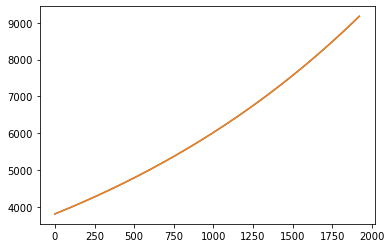

In [106]:
import matplotlib.pyplot as plt
plt.plot(X_train[50])

In [70]:

if __name__ == '__main__':
    import os

    gpu_use = 4
    print('GPU use: {}'.format(gpu_use))
    os.environ["KERAS_BACKEND"] = "tensorflow"
    os.environ["CUDA_VISIBLE_DEVICES"] = "{}".format(gpu_use)


# tf keras
from tensorflow.keras import backend as K
from classification_models.tfkeras import Classifiers as Classifiers_2D
from classification_models_1D.tfkeras import Classifiers as Classifiers_1D
from keras.applications.efficientnet import EfficientNetB0
from keras.applications.efficientnet import EfficientNetB1
from keras.applications.efficientnet import EfficientNetB2
from keras.applications.efficientnet import EfficientNetB3
from keras.applications.efficientnet import EfficientNetB4
from keras.applications.efficientnet import EfficientNetB5
from keras.applications.efficientnet import EfficientNetB6
from keras.applications.efficientnet import EfficientNetB7
from keras.applications.efficientnet_v2 import *

print('Use TF keras...')
import os
import glob
import hashlib
import numpy as np


MODELS_PATH = './'
OUTPUT_PATH_CONVERTER = MODELS_PATH + 'converter/'
if not os.path.isdir(OUTPUT_PATH_CONVERTER):
    os.mkdir(OUTPUT_PATH_CONVERTER)


def get_model_memory_usage(batch_size, model):
    import numpy as np

    shapes_mem_count = 0
    internal_model_mem_count = 0
    for l in model.layers:
        layer_type = l.__class__.__name__
        if layer_type == 'Model':
            internal_model_mem_count += get_model_memory_usage(batch_size, l)
        single_layer_mem = 1
        out_shape = l.output_shape
        if type(out_shape) is list:
            out_shape = out_shape[0]
        for s in out_shape:
            if s is None:
                continue
            single_layer_mem *= s
        shapes_mem_count += single_layer_mem

    trainable_count = np.sum([K.count_params(p) for p in model.trainable_weights])
    non_trainable_count = np.sum([K.count_params(p) for p in model.non_trainable_weights])

    number_size = 4.0
    if K.floatx() == 'float16':
        number_size = 2.0
    if K.floatx() == 'float64':
        number_size = 8.0

    total_memory = number_size * (batch_size * shapes_mem_count + trainable_count + non_trainable_count)
    gbytes = np.round(total_memory / (1024.0 ** 3), 3) + internal_model_mem_count
    return gbytes


def convert_weights(m2, m1, kernel_size, out_path):
    print('Start: {}'.format(m2.name))
    for i in range(len(m2.layers)):
        layer_2D = m2.layers[i]
        layer_1D = m1.layers[i]
        print('Extract for [{}]: {} {}'.format(i, layer_2D.__class__.__name__, layer_2D.name))
        print('Set for [{}]: {} {}'.format(i, layer_1D.__class__.__name__, layer_1D.name))

        if layer_2D.name != layer_1D.name:
            print('Warning: different names!')

        weights_2D = layer_2D.get_weights()
        weights_1D = layer_1D.get_weights()
        if layer_2D.__class__.__name__ == 'Conv2D' or \
                layer_2D.__class__.__name__ == 'DepthwiseConv2D':
            print(type(weights_2D), len(weights_2D), weights_2D[0].shape, weights_1D[0].shape)

            # Weights
            weights_1D[0][...] = 0
            for j in range(weights_1D[0].shape[-2]):
                if weights_2D[0].shape[0]*weights_2D[0].shape[1] == weights_1D[0].shape[0]:
                    # Case when we flatten weights (e.g. kernel size for 1D == 9)
                    part = weights_2D[0][:, :, j, :].reshape((weights_2D[0].shape[0]*weights_2D[0].shape[1], weights_2D[0].shape[-1]))
                else:
                    # Case when we use sum of weights (e.g. kernel size for 1D == 3)
                    part = weights_2D[0][:, :, j, :].sum(axis=1)

                part = (part * weights_2D[0].shape[-2]) / weights_1D[0].shape[-2]
                weights_1D[0][:, j, :] = part

            # Bias
            if len(weights_1D) > 1:
                print(weights_1D[1].shape, weights_2D[1].shape)
                weights_1D[1] = weights_2D[1][:weights_1D[1].shape[0]]

            m1.layers[i].set_weights(weights_1D)
        else:
            """
            Если первым слоем идёт BatchNormalization. Картинки подаются как есть 
            (справедливо для Resnet). Значит вход от 0 до 255. Звук на промежутке 
            от -1 до 1. Для преобразования нужно пересчитать 
            gamma1 = gamma2 * 127.5
            mean1 = (mean2 - 127.5) / 127.5
            """
            if layer_2D.__class__.__name__ == 'BatchNormalization' and i == 1:
                print('Convert first batchNorm layer!')
                if len(weights_2D) == 3:
                    beta2, run_mean2, run_std2 = weights_2D
                    gamma2 = np.ones(len(beta2), dtype=np.float32)
                else:
                    gamma2, beta2, run_mean2, run_std2 = weights_2D

                print(gamma2.shape, beta2.shape, run_mean2.shape, run_std2.shape)
                gamma2 = gamma2 * 127.5
                run_mean2 = (run_mean2 - 127.5) / 127.5
                conf = m1.layers[i].get_config()
                print(conf)
                conf = m1.layers[i].get_config()
                print(conf)
                if m1.layers[i].input.shape[-1] <= m2.layers[i].input.shape[-1]:
                    gamma2 = gamma2[:m1.layers[i].input.shape[-1]]
                    beta2 = beta2[:m1.layers[i].input.shape[-1]]
                    run_mean2 = run_mean2[:m1.layers[i].input.shape[-1]]
                    run_std2 = run_std2[:m1.layers[i].input.shape[-1]]
                m1.layers[i].set_weights([gamma2, beta2, run_mean2, run_std2])
            elif layer_2D.__class__.__name__ == 'Normalization' and i == 2:
                if len(weights_1D) > 0:
                    # EffNet v1
                    weights_1D[0] = weights_2D[0][:len(weights_1D[0])]
                    weights_1D[1] = weights_2D[1][:len(weights_1D[1])]
                    print(weights_2D)
                    print(weights_1D)
                    m1.layers[i].set_weights(weights_1D)
                else:
                    # Effnet v2 (it's in parameters)
                    pass
            else:
                m1.layers[i].set_weights(weights_2D)
    m1.save(out_path)


def convert_models():
    include_top = False
    shape_size_1D = (224 * 224, 2)
    shape_size_2D = (224, 224, 3)
    list_to_check = ['resnet18', 'resnet34', 'resnet50', 'resnet101', 'resnet152', 'seresnet18',
                      'seresnet34', 'seresnet50', 'seresnet101', 'seresnet152', 'seresnext50',
                      'seresnext101', 'senet154', 'resnext50', 'resnext101', 'vgg16', 'vgg19',
                      'densenet121', 'densenet169', 'densenet201', 'mobilenet', 'mobilenetv2',
                      'EfficientNetB0', 'EfficientNetB1', 'EfficientNetB2',
                      'EfficientNetB3', 'EfficientNetB4', 'EfficientNetB5', 'EfficientNetB6', 'EfficientNetB7',
                      'EfficientNetV2B0', 'EfficientNetV2B1', 'EfficientNetV2B2', 'EfficientNetV2B3',
                      'EfficientNetV2S', 'EfficientNetV2M', 'EfficientNetV2L']

    for kernel_size in [3, 9]:
        for t in list_to_check:
            out_path = MODELS_PATH + 'converter/{}_channel_{}_kernel_{}_top_{}.h5'.format(t, shape_size_1D[-1], kernel_size, include_top)
            if os.path.isfile(out_path):
                print('Already exists: {}!'.format(out_path))
                continue

            model1D, preprocess_input = Classifiers_1D.get(t)
            model1D = model1D(
                include_top=include_top,
                weights=None,
                input_shape=shape_size_1D,
                pooling='avg',
                kernel_size=kernel_size,
            )
            mem = get_model_memory_usage(1, model1D)
            print('Model 1D: {} Mem single: {:.2f}'.format(t, mem))

            if t in ['EfficientNetB0', 'EfficientNetB1', 'EfficientNetB2', 'EfficientNetB3',
                     'EfficientNetB4', 'EfficientNetB5', 'EfficientNetB6', 'EfficientNetB7']:

                func = {
                    'EfficientNetB0': EfficientNetB0,
                    'EfficientNetB1': EfficientNetB1,
                    'EfficientNetB2': EfficientNetB2,
                    'EfficientNetB3': EfficientNetB3,
                    'EfficientNetB4': EfficientNetB4,
                    'EfficientNetB5': EfficientNetB5,
                    'EfficientNetB6': EfficientNetB6,
                    'EfficientNetB7': EfficientNetB7,
                }

                model2D = func[t](
                    include_top=include_top,
                    weights='imagenet',
                    input_shape=shape_size_2D,
                    pooling='avg',
                )
            elif t in ['EfficientNetV2B0', 'EfficientNetV2B1', 'EfficientNetV2B2', 'EfficientNetV2B3',
                      'EfficientNetV2S', 'EfficientNetV2M', 'EfficientNetV2L']:

                func = {
                    'EfficientNetV2B0': EfficientNetV2B0,
                    'EfficientNetV2B1': EfficientNetV2B1,
                    'EfficientNetV2B2': EfficientNetV2B2,
                    'EfficientNetV2B3': EfficientNetV2B3,
                    'EfficientNetV2S': EfficientNetV2S,
                    'EfficientNetV2M': EfficientNetV2M,
                    'EfficientNetV2L': EfficientNetV2L,
                }

                model2D = func[t](
                    include_top=include_top,
                    weights='imagenet',
                    input_shape=shape_size_2D,
                    pooling='avg',
                )
            else:
                model2D, preprocess_input = Classifiers_2D.get(t)
                model2D = model2D(
                    include_top=include_top,
                    weights='imagenet',
                    input_shape=shape_size_2D,
                    pooling='avg',
                )
            mem = get_model_memory_usage(1, model2D)
            print('Model 2D: {} Mem single: {:.2f}'.format(t, mem))
            convert_weights(
                model2D,
                model1D,
                kernel_size,
                out_path,
            )
            K.clear_session()


def md5(fname):
    hash_md5 = hashlib.md5()
    with open(fname, "rb") as f:
        for chunk in iter(lambda: f.read(4096), b""):
            hash_md5.update(chunk)
    return hash_md5.hexdigest()


def gen_text_with_links():
    list_to_check = ['resnet18', 'resnet34', 'resnet50', 'resnet101', 'resnet152', 'seresnet18',
                      'seresnet34', 'seresnet50', 'seresnet101', 'seresnet152', 'seresnext50',
                      'seresnext101', 'senet154', 'resnext50', 'resnext101', 'vgg16', 'vgg19',
                      'densenet121', 'densenet169', 'densenet201', 'mobilenet', 'mobilenetv2',
                      'inceptionresnetv2', 'inceptionv3', 'EfficientNetB0', 'EfficientNetB1', 'EfficientNetB2',
                      'EfficientNetB3', 'EfficientNetB4', 'EfficientNetB5', 'EfficientNetB6', 'EfficientNetB7',
                      'EfficientNetV2B0', 'EfficientNetV2B1', 'EfficientNetV2B2', 'EfficientNetV2B3',
                      'EfficientNetV2S', 'EfficientNetV2M', 'EfficientNetV2L']
    for model_name in list_to_check:
        files = glob.glob('./converter/{}_*.h5'.format(model_name))
        for f in files:
            file_name = os.path.basename(f)
            arr = file_name[:-3].split('_')
            m5 = md5(f)

            print('# {}'.format(model_name))
            print('{')
            print('    \'model\': \'{}\','.format(model_name))
            print('    \'dataset\': \'imagenet\','.format(model_name))
            print('    \'classes\': 1000,'.format(model_name))
            print('    \'include_top\': {},'.format(arr[-1]))
            print('    \'kernel_size\': {},'.format(arr[-3]))
            print('    \'channel\': {},'.format(arr[-5]))
            print('    \'url\': \'https://github.com/ZFTurbo/classification_models_1D/releases/download/v1.0.0/{}\','.format(file_name))
            print('    \'name\': \'{}\','.format(file_name))
            print('    \'md5\': \'{}\','.format(m5))
            print('},')


if __name__ == '__main__':
    convert_models()
    gen_text_with_links()

GPU use: 4
Use TF keras...
Model 1D: resnet18 Mem single: 0.06
44920640/44920640 [==============================] - 8s 0us/step
Model 2D: resnet18 Mem single: 0.09
Start: model_1
Extract for [0]: InputLayer data
Set for [0]: InputLayer data
Extract for [1]: BatchNormalization bn_data
Set for [1]: BatchNormalization bn_data
Convert first batchNorm layer!
(3,) (3,) (3,) (3,)
{'name': 'bn_data', 'trainable': True, 'dtype': 'float32', 'axis': ListWrapper([2]), 'momentum': 0.99, 'epsilon': 2e-05, 'center': True, 'scale': True, 'beta_initializer': {'class_name': 'Zeros', 'config': {}}, 'gamma_initializer': {'class_name': 'Ones', 'config': {}}, 'moving_mean_initializer': {'class_name': 'Zeros', 'config': {}}, 'moving_variance_initializer': {'class_name': 'Ones', 'config': {}}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}
{'name': 'bn_data', 'trainable': True, 'dtype': 'float32', 'axis': ListWrapper([2]), 'momentum': 0.99, 'epsilon': 2

Extract for [83]: Add add_15
Set for [83]: Add add_7
Extract for [84]: BatchNormalization bn1
Set for [84]: BatchNormalization bn1
Extract for [85]: Activation relu1
Set for [85]: Activation relu1
Model 1D: resnet34 Mem single: 0.09
85521592/85521592 [==============================] - 20s 0us/step
Model 2D: resnet34 Mem single: 0.15
Start: model_1
Extract for [0]: InputLayer data
Set for [0]: InputLayer data
Extract for [1]: BatchNormalization bn_data
Set for [1]: BatchNormalization bn_data
Convert first batchNorm layer!
(3,) (3,) (3,) (3,)
{'name': 'bn_data', 'trainable': True, 'dtype': 'float32', 'axis': ListWrapper([2]), 'momentum': 0.99, 'epsilon': 2e-05, 'center': True, 'scale': True, 'beta_initializer': {'class_name': 'Zeros', 'config': {}}, 'gamma_initializer': {'class_name': 'Ones', 'config': {}}, 'moving_mean_initializer': {'class_name': 'Zeros', 'config': {}}, 'moving_variance_initializer': {'class_name': 'Ones', 'config': {}}, 'beta_regularizer': None, 'gamma_regularizer': N

Extract for [82]: Add add_23
Set for [82]: Add add_7
Extract for [83]: BatchNormalization stage3_unit2_bn1
Set for [83]: BatchNormalization stage3_unit2_bn1
Extract for [84]: Activation stage3_unit2_relu1
Set for [84]: Activation stage3_unit2_relu1
Extract for [85]: ZeroPadding2D zero_padding2d_18
Set for [85]: ZeroPadding1D zero_padding1d_18
Extract for [86]: Conv2D stage3_unit2_conv1
Set for [86]: Conv1D stage3_unit2_conv1
<class 'list'> 1 (3, 3, 256, 256) (3, 256, 256)
Extract for [87]: BatchNormalization stage3_unit2_bn2
Set for [87]: BatchNormalization stage3_unit2_bn2
Extract for [88]: Activation stage3_unit2_relu2
Set for [88]: Activation stage3_unit2_relu2
Extract for [89]: ZeroPadding2D zero_padding2d_19
Set for [89]: ZeroPadding1D zero_padding1d_19
Extract for [90]: Conv2D stage3_unit2_conv2
Set for [90]: Conv1D stage3_unit2_conv2
<class 'list'> 1 (3, 3, 256, 256) (3, 256, 256)
Extract for [91]: Add add_24
Set for [91]: Add add_8
Extract for [92]: BatchNormalization stage3_un

Model 1D: resnet50 Mem single: 0.21
94592056/94592056 [==============================] - 16s 0us/step
Model 2D: resnet50 Mem single: 0.24
Start: model_1
Extract for [0]: InputLayer data
Set for [0]: InputLayer data
Extract for [1]: BatchNormalization bn_data
Set for [1]: BatchNormalization bn_data
Convert first batchNorm layer!
(3,) (3,) (3,) (3,)
{'name': 'bn_data', 'trainable': True, 'dtype': 'float32', 'axis': ListWrapper([2]), 'momentum': 0.99, 'epsilon': 2e-05, 'center': True, 'scale': True, 'beta_initializer': {'class_name': 'Zeros', 'config': {}}, 'gamma_initializer': {'class_name': 'Ones', 'config': {}}, 'moving_mean_initializer': {'class_name': 'Zeros', 'config': {}}, 'moving_variance_initializer': {'class_name': 'Ones', 'config': {}}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}
{'name': 'bn_data', 'trainable': True, 'dtype': 'float32', 'axis': ListWrapper([2]), 'momentum': 0.99, 'epsilon': 2e-05, 'center': True, 'sca

Extract for [77]: Activation stage2_unit4_relu1
Set for [77]: Activation stage2_unit4_relu1
Extract for [78]: Conv2D stage2_unit4_conv1
Set for [78]: Conv1D stage2_unit4_conv1
<class 'list'> 1 (1, 1, 512, 128) (1, 512, 128)
Extract for [79]: BatchNormalization stage2_unit4_bn2
Set for [79]: BatchNormalization stage2_unit4_bn2
Extract for [80]: Activation stage2_unit4_relu2
Set for [80]: Activation stage2_unit4_relu2
Extract for [81]: ZeroPadding2D zero_padding2d_8
Set for [81]: ZeroPadding1D zero_padding1d_8
Extract for [82]: Conv2D stage2_unit4_conv2
Set for [82]: Conv1D stage2_unit4_conv2
<class 'list'> 1 (3, 3, 128, 128) (3, 128, 128)
Extract for [83]: BatchNormalization stage2_unit4_bn3
Set for [83]: BatchNormalization stage2_unit4_bn3
Extract for [84]: Activation stage2_unit4_relu3
Set for [84]: Activation stage2_unit4_relu3
Extract for [85]: Conv2D stage2_unit4_conv3
Set for [85]: Conv1D stage2_unit4_conv3
<class 'list'> 1 (1, 1, 128, 512) (1, 128, 512)
Extract for [86]: Add add_

Extract for [155]: Activation stage4_unit1_relu1
Set for [155]: Activation stage4_unit1_relu1
Extract for [156]: Conv2D stage4_unit1_conv1
Set for [156]: Conv1D stage4_unit1_conv1
<class 'list'> 1 (1, 1, 1024, 512) (1, 1024, 512)
Extract for [157]: BatchNormalization stage4_unit1_bn2
Set for [157]: BatchNormalization stage4_unit1_bn2
Extract for [158]: Activation stage4_unit1_relu2
Set for [158]: Activation stage4_unit1_relu2
Extract for [159]: ZeroPadding2D zero_padding2d_15
Set for [159]: ZeroPadding1D zero_padding1d_15
Extract for [160]: Conv2D stage4_unit1_conv2
Set for [160]: Conv1D stage4_unit1_conv2
<class 'list'> 1 (3, 3, 512, 512) (3, 512, 512)
Extract for [161]: BatchNormalization stage4_unit1_bn3
Set for [161]: BatchNormalization stage4_unit1_bn3
Extract for [162]: Activation stage4_unit1_relu3
Set for [162]: Activation stage4_unit1_relu3
Extract for [163]: Conv2D stage4_unit1_conv3
Set for [163]: Conv1D stage4_unit1_conv3
<class 'list'> 1 (1, 1, 512, 2048) (1, 512, 2048)
Ex

Extract for [53]: Add add_36
Set for [53]: Add add_3
Extract for [54]: BatchNormalization stage2_unit2_bn1
Set for [54]: BatchNormalization stage2_unit2_bn1
Extract for [55]: Activation stage2_unit2_relu1
Set for [55]: Activation stage2_unit2_relu1
Extract for [56]: Conv2D stage2_unit2_conv1
Set for [56]: Conv1D stage2_unit2_conv1
<class 'list'> 1 (1, 1, 512, 128) (1, 512, 128)
Extract for [57]: BatchNormalization stage2_unit2_bn2
Set for [57]: BatchNormalization stage2_unit2_bn2
Extract for [58]: Activation stage2_unit2_relu2
Set for [58]: Activation stage2_unit2_relu2
Extract for [59]: ZeroPadding2D zero_padding2d_6
Set for [59]: ZeroPadding1D zero_padding1d_6
Extract for [60]: Conv2D stage2_unit2_conv2
Set for [60]: Conv1D stage2_unit2_conv2
<class 'list'> 1 (3, 3, 128, 128) (3, 128, 128)
Extract for [61]: BatchNormalization stage2_unit2_bn3
Set for [61]: BatchNormalization stage2_unit2_bn3
Extract for [62]: Activation stage2_unit2_relu3
Set for [62]: Activation stage2_unit2_relu3
E

<class 'list'> 1 (1, 1, 256, 1024) (1, 256, 1024)
Extract for [153]: Add add_45
Set for [153]: Add add_12
Extract for [154]: BatchNormalization stage3_unit7_bn1
Set for [154]: BatchNormalization stage3_unit7_bn1
Extract for [155]: Activation stage3_unit7_relu1
Set for [155]: Activation stage3_unit7_relu1
Extract for [156]: Conv2D stage3_unit7_conv1
Set for [156]: Conv1D stage3_unit7_conv1
<class 'list'> 1 (1, 1, 1024, 256) (1, 1024, 256)
Extract for [157]: BatchNormalization stage3_unit7_bn2
Set for [157]: BatchNormalization stage3_unit7_bn2
Extract for [158]: Activation stage3_unit7_relu2
Set for [158]: Activation stage3_unit7_relu2
Extract for [159]: ZeroPadding2D zero_padding2d_15
Set for [159]: ZeroPadding1D zero_padding1d_15
Extract for [160]: Conv2D stage3_unit7_conv2
Set for [160]: Conv1D stage3_unit7_conv2
<class 'list'> 1 (3, 3, 256, 256) (3, 256, 256)
Extract for [161]: BatchNormalization stage3_unit7_bn3
Set for [161]: BatchNormalization stage3_unit7_bn3
Extract for [162]: A

Extract for [249]: BatchNormalization stage3_unit15_bn3
Set for [249]: BatchNormalization stage3_unit15_bn3
Extract for [250]: Activation stage3_unit15_relu3
Set for [250]: Activation stage3_unit15_relu3
Extract for [251]: Conv2D stage3_unit15_conv3
Set for [251]: Conv1D stage3_unit15_conv3
<class 'list'> 1 (1, 1, 256, 1024) (1, 256, 1024)
Extract for [252]: Add add_54
Set for [252]: Add add_21
Extract for [253]: BatchNormalization stage3_unit16_bn1
Set for [253]: BatchNormalization stage3_unit16_bn1
Extract for [254]: Activation stage3_unit16_relu1
Set for [254]: Activation stage3_unit16_relu1
Extract for [255]: Conv2D stage3_unit16_conv1
Set for [255]: Conv1D stage3_unit16_conv1
<class 'list'> 1 (1, 1, 1024, 256) (1, 1024, 256)
Extract for [256]: BatchNormalization stage3_unit16_bn2
Set for [256]: BatchNormalization stage3_unit16_bn2
Extract for [257]: Activation stage3_unit16_relu2
Set for [257]: Activation stage3_unit16_relu2
Extract for [258]: ZeroPadding2D zero_padding2d_24
Set f

Extract for [345]: Activation stage4_unit1_relu2
Set for [345]: Activation stage4_unit1_relu2
Extract for [346]: ZeroPadding2D zero_padding2d_32
Set for [346]: ZeroPadding1D zero_padding1d_32
Extract for [347]: Conv2D stage4_unit1_conv2
Set for [347]: Conv1D stage4_unit1_conv2
<class 'list'> 1 (3, 3, 512, 512) (3, 512, 512)
Extract for [348]: BatchNormalization stage4_unit1_bn3
Set for [348]: BatchNormalization stage4_unit1_bn3
Extract for [349]: Activation stage4_unit1_relu3
Set for [349]: Activation stage4_unit1_relu3
Extract for [350]: Conv2D stage4_unit1_conv3
Set for [350]: Conv1D stage4_unit1_conv3
<class 'list'> 1 (1, 1, 512, 2048) (1, 512, 2048)
Extract for [351]: Conv2D stage4_unit1_sc
Set for [351]: Conv1D stage4_unit1_sc
<class 'list'> 1 (1, 1, 1024, 2048) (1, 1024, 2048)
Extract for [352]: Add add_63
Set for [352]: Add add_30
Extract for [353]: BatchNormalization stage4_unit2_bn1
Set for [353]: BatchNormalization stage4_unit2_bn1
Extract for [354]: Activation stage4_unit2_r

Extract for [51]: Conv2D stage2_unit1_conv3
Set for [51]: Conv1D stage2_unit1_conv3
<class 'list'> 1 (1, 1, 128, 512) (1, 128, 512)
Extract for [52]: Conv2D stage2_unit1_sc
Set for [52]: Conv1D stage2_unit1_sc
<class 'list'> 1 (1, 1, 256, 512) (1, 256, 512)
Extract for [53]: Add add_53
Set for [53]: Add add_3
Extract for [54]: BatchNormalization stage2_unit2_bn1
Set for [54]: BatchNormalization stage2_unit2_bn1
Extract for [55]: Activation stage2_unit2_relu1
Set for [55]: Activation stage2_unit2_relu1
Extract for [56]: Conv2D stage2_unit2_conv1
Set for [56]: Conv1D stage2_unit2_conv1
<class 'list'> 1 (1, 1, 512, 128) (1, 512, 128)
Extract for [57]: BatchNormalization stage2_unit2_bn2
Set for [57]: BatchNormalization stage2_unit2_bn2
Extract for [58]: Activation stage2_unit2_relu2
Set for [58]: Activation stage2_unit2_relu2
Extract for [59]: ZeroPadding2D zero_padding2d_6
Set for [59]: ZeroPadding1D zero_padding1d_6
Extract for [60]: Conv2D stage2_unit2_conv2
Set for [60]: Conv1D stage2

Extract for [146]: BatchNormalization stage3_unit2_bn2
Set for [146]: BatchNormalization stage3_unit2_bn2
Extract for [147]: Activation stage3_unit2_relu2
Set for [147]: Activation stage3_unit2_relu2
Extract for [148]: ZeroPadding2D zero_padding2d_14
Set for [148]: ZeroPadding1D zero_padding1d_14
Extract for [149]: Conv2D stage3_unit2_conv2
Set for [149]: Conv1D stage3_unit2_conv2
<class 'list'> 1 (3, 3, 256, 256) (3, 256, 256)
Extract for [150]: BatchNormalization stage3_unit2_bn3
Set for [150]: BatchNormalization stage3_unit2_bn3
Extract for [151]: Activation stage3_unit2_relu3
Set for [151]: Activation stage3_unit2_relu3
Extract for [152]: Conv2D stage3_unit2_conv3
Set for [152]: Conv1D stage3_unit2_conv3
<class 'list'> 1 (1, 1, 256, 1024) (1, 256, 1024)
Extract for [153]: Add add_62
Set for [153]: Add add_12
Extract for [154]: BatchNormalization stage3_unit3_bn1
Set for [154]: BatchNormalization stage3_unit3_bn1
Extract for [155]: Activation stage3_unit3_relu1
Set for [155]: Activa

Extract for [240]: Conv2D stage3_unit10_conv3
Set for [240]: Conv1D stage3_unit10_conv3
<class 'list'> 1 (1, 1, 256, 1024) (1, 256, 1024)
Extract for [241]: Add add_70
Set for [241]: Add add_20
Extract for [242]: BatchNormalization stage3_unit11_bn1
Set for [242]: BatchNormalization stage3_unit11_bn1
Extract for [243]: Activation stage3_unit11_relu1
Set for [243]: Activation stage3_unit11_relu1
Extract for [244]: Conv2D stage3_unit11_conv1
Set for [244]: Conv1D stage3_unit11_conv1
<class 'list'> 1 (1, 1, 1024, 256) (1, 1024, 256)
Extract for [245]: BatchNormalization stage3_unit11_bn2
Set for [245]: BatchNormalization stage3_unit11_bn2
Extract for [246]: Activation stage3_unit11_relu2
Set for [246]: Activation stage3_unit11_relu2
Extract for [247]: ZeroPadding2D zero_padding2d_23
Set for [247]: ZeroPadding1D zero_padding1d_23
Extract for [248]: Conv2D stage3_unit11_conv2
Set for [248]: Conv1D stage3_unit11_conv2
<class 'list'> 1 (3, 3, 256, 256) (3, 256, 256)
Extract for [249]: BatchNo

Extract for [331]: Activation stage3_unit19_relu1
Set for [331]: Activation stage3_unit19_relu1
Extract for [332]: Conv2D stage3_unit19_conv1
Set for [332]: Conv1D stage3_unit19_conv1
<class 'list'> 1 (1, 1, 1024, 256) (1, 1024, 256)
Extract for [333]: BatchNormalization stage3_unit19_bn2
Set for [333]: BatchNormalization stage3_unit19_bn2
Extract for [334]: Activation stage3_unit19_relu2
Set for [334]: Activation stage3_unit19_relu2
Extract for [335]: ZeroPadding2D zero_padding2d_31
Set for [335]: ZeroPadding1D zero_padding1d_31
Extract for [336]: Conv2D stage3_unit19_conv2
Set for [336]: Conv1D stage3_unit19_conv2
<class 'list'> 1 (3, 3, 256, 256) (3, 256, 256)
Extract for [337]: BatchNormalization stage3_unit19_bn3
Set for [337]: BatchNormalization stage3_unit19_bn3
Extract for [338]: Activation stage3_unit19_relu3
Set for [338]: Activation stage3_unit19_relu3
Extract for [339]: Conv2D stage3_unit19_conv3
Set for [339]: Conv1D stage3_unit19_conv3
<class 'list'> 1 (1, 1, 256, 1024) (

Set for [423]: ZeroPadding1D zero_padding1d_39
Extract for [424]: Conv2D stage3_unit27_conv2
Set for [424]: Conv1D stage3_unit27_conv2
<class 'list'> 1 (3, 3, 256, 256) (3, 256, 256)
Extract for [425]: BatchNormalization stage3_unit27_bn3
Set for [425]: BatchNormalization stage3_unit27_bn3
Extract for [426]: Activation stage3_unit27_relu3
Set for [426]: Activation stage3_unit27_relu3
Extract for [427]: Conv2D stage3_unit27_conv3
Set for [427]: Conv1D stage3_unit27_conv3
<class 'list'> 1 (1, 1, 256, 1024) (1, 256, 1024)
Extract for [428]: Add add_87
Set for [428]: Add add_37
Extract for [429]: BatchNormalization stage3_unit28_bn1
Set for [429]: BatchNormalization stage3_unit28_bn1
Extract for [430]: Activation stage3_unit28_relu1
Set for [430]: Activation stage3_unit28_relu1
Extract for [431]: Conv2D stage3_unit28_conv1
Set for [431]: Conv1D stage3_unit28_conv1
<class 'list'> 1 (1, 1, 1024, 256) (1, 1024, 256)
Extract for [432]: BatchNormalization stage3_unit28_bn2
Set for [432]: BatchN

Extract for [513]: BatchNormalization stage3_unit35_bn3
Set for [513]: BatchNormalization stage3_unit35_bn3
Extract for [514]: Activation stage3_unit35_relu3
Set for [514]: Activation stage3_unit35_relu3
Extract for [515]: Conv2D stage3_unit35_conv3
Set for [515]: Conv1D stage3_unit35_conv3
<class 'list'> 1 (1, 1, 256, 1024) (1, 256, 1024)
Extract for [516]: Add add_95
Set for [516]: Add add_45
Extract for [517]: BatchNormalization stage3_unit36_bn1
Set for [517]: BatchNormalization stage3_unit36_bn1
Extract for [518]: Activation stage3_unit36_relu1
Set for [518]: Activation stage3_unit36_relu1
Extract for [519]: Conv2D stage3_unit36_conv1
Set for [519]: Conv1D stage3_unit36_conv1
<class 'list'> 1 (1, 1, 1024, 256) (1, 1024, 256)
Extract for [520]: BatchNormalization stage3_unit36_bn2
Set for [520]: BatchNormalization stage3_unit36_bn2
Extract for [521]: Activation stage3_unit36_relu2
Set for [521]: Activation stage3_unit36_relu2
Extract for [522]: ZeroPadding2D zero_padding2d_48
Set f

<class 'list'> 1 (3, 3, 64, 64) (3, 64, 64)
Extract for [29]: BatchNormalization stage1_unit2_bn2
Set for [29]: BatchNormalization stage1_unit2_bn2
Extract for [30]: Activation stage1_unit2_relu2
Set for [30]: Activation stage1_unit2_relu2
Extract for [31]: ZeroPadding2D zero_padding2d_5
Set for [31]: ZeroPadding1D zero_padding1d_5
Extract for [32]: Conv2D stage1_unit2_conv2
Set for [32]: Conv1D stage1_unit2_conv2
<class 'list'> 1 (3, 3, 64, 64) (3, 64, 64)
Extract for [33]: GlobalAveragePooling2D global_average_pooling2d_1
Set for [33]: GlobalAveragePooling1D global_average_pooling1d_1
Extract for [34]: Lambda lambda_9
Set for [34]: Lambda lambda_1
Extract for [35]: Conv2D conv2d_2
Set for [35]: Conv1D conv1d_2
<class 'list'> 2 (1, 1, 64, 4) (1, 64, 4)
(4,) (4,)
Extract for [36]: Activation activation_18
Set for [36]: Activation activation_2
Extract for [37]: Conv2D conv2d_3
Set for [37]: Conv1D conv1d_3
<class 'list'> 2 (1, 1, 4, 64) (1, 4, 64)
(64,) (64,)
Extract for [38]: Activatio

Extract for [112]: Activation stage4_unit1_relu2
Set for [112]: Activation stage4_unit1_relu2
Extract for [113]: ZeroPadding2D zero_padding2d_15
Set for [113]: ZeroPadding1D zero_padding1d_15
Extract for [114]: Conv2D stage4_unit1_conv2
Set for [114]: Conv1D stage4_unit1_conv2
<class 'list'> 1 (3, 3, 512, 512) (3, 512, 512)
Extract for [115]: GlobalAveragePooling2D global_average_pooling2d_6
Set for [115]: GlobalAveragePooling1D global_average_pooling1d_6
Extract for [116]: Lambda lambda_14
Set for [116]: Lambda lambda_6
Extract for [117]: Conv2D conv2d_12
Set for [117]: Conv1D conv1d_12
<class 'list'> 2 (1, 1, 512, 32) (1, 512, 32)
(32,) (32,)
Extract for [118]: Activation activation_28
Set for [118]: Activation activation_12
Extract for [119]: Conv2D conv2d_13
Set for [119]: Conv1D conv1d_13
<class 'list'> 2 (1, 1, 32, 512) (1, 32, 512)
(512,) (512,)
Extract for [120]: Activation activation_29
Set for [120]: Activation activation_13
Extract for [121]: Multiply multiply_14
Set for [12

Extract for [48]: Conv2D stage1_unit3_conv2
Set for [48]: Conv1D stage1_unit3_conv2
<class 'list'> 1 (3, 3, 64, 64) (3, 64, 64)
Extract for [49]: GlobalAveragePooling2D global_average_pooling2d_2
Set for [49]: GlobalAveragePooling1D global_average_pooling1d_2
Extract for [50]: Lambda lambda_18
Set for [50]: Lambda lambda_2
Extract for [51]: Conv2D conv2d_4
Set for [51]: Conv1D conv1d_4
<class 'list'> 2 (1, 1, 64, 4) (1, 64, 4)
(4,) (4,)
Extract for [52]: Activation activation_36
Set for [52]: Activation activation_4
Extract for [53]: Conv2D conv2d_5
Set for [53]: Conv1D conv1d_5
<class 'list'> 2 (1, 1, 4, 64) (1, 4, 64)
(64,) (64,)
Extract for [54]: Activation activation_37
Set for [54]: Activation activation_5
Extract for [55]: Multiply multiply_18
Set for [55]: Multiply multiply_2
Extract for [56]: Add add_18
Set for [56]: Add add_2
Extract for [57]: BatchNormalization stage2_unit1_bn1
Set for [57]: BatchNormalization stage2_unit1_bn1
Extract for [58]: Activation stage2_unit1_relu1
S

<class 'list'> 2 (1, 1, 8, 128) (1, 8, 128)
(128,) (128,)
Extract for [119]: Activation activation_45
Set for [119]: Activation activation_13
Extract for [120]: Multiply multiply_22
Set for [120]: Multiply multiply_6
Extract for [121]: Add add_22
Set for [121]: Add add_6
Extract for [122]: BatchNormalization stage3_unit1_bn1
Set for [122]: BatchNormalization stage3_unit1_bn1
Extract for [123]: Activation stage3_unit1_relu1
Set for [123]: Activation stage3_unit1_relu1
Extract for [124]: ZeroPadding2D zero_padding2d_16
Set for [124]: ZeroPadding1D zero_padding1d_16
Extract for [125]: Conv2D stage3_unit1_conv1
Set for [125]: Conv1D stage3_unit1_conv1
<class 'list'> 1 (3, 3, 128, 256) (3, 128, 256)
Extract for [126]: BatchNormalization stage3_unit1_bn2
Set for [126]: BatchNormalization stage3_unit1_bn2
Extract for [127]: Activation stage3_unit1_relu2
Set for [127]: Activation stage3_unit1_relu2
Extract for [128]: ZeroPadding2D zero_padding2d_17
Set for [128]: ZeroPadding1D zero_padding1d_1

Extract for [214]: Activation activation_56
Set for [214]: Activation activation_24
Extract for [215]: Conv2D conv2d_25
Set for [215]: Conv1D conv1d_25
<class 'list'> 2 (1, 1, 16, 256) (1, 16, 256)
(256,) (256,)
Extract for [216]: Activation activation_57
Set for [216]: Activation activation_25
Extract for [217]: Multiply multiply_28
Set for [217]: Multiply multiply_12
Extract for [218]: Add add_28
Set for [218]: Add add_12
Extract for [219]: BatchNormalization stage4_unit1_bn1
Set for [219]: BatchNormalization stage4_unit1_bn1
Extract for [220]: Activation stage4_unit1_relu1
Set for [220]: Activation stage4_unit1_relu1
Extract for [221]: ZeroPadding2D zero_padding2d_28
Set for [221]: ZeroPadding1D zero_padding1d_28
Extract for [222]: Conv2D stage4_unit1_conv1
Set for [222]: Conv1D stage4_unit1_conv1
<class 'list'> 1 (3, 3, 256, 512) (3, 256, 512)
Extract for [223]: BatchNormalization stage4_unit1_bn2
Set for [223]: BatchNormalization stage4_unit1_bn2
Extract for [224]: Activation stag

ValueError: Incomplete or corrupted file detected. The md5 file hash does not match the provided value of 043777781b0d5ca756474d60bf115ef1.

In [ ]:
from classification_models_1D.tfkeras import Classifiers

ResNet18, preprocess_input = Classifiers.get('resnet18')
model = ResNet18(input_shape=(3841, 2), weights='imagenet')